<a href="https://colab.research.google.com/github/jpantojaj/DIP-CS_AI/blob/main/Credit_Scoring_Development_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desarrollo de un Modelo de Credit Scoring**

## **1. Carga Inicial de Librerías**

In [254]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## **2. Entendimiento y Analisis Exploratorio de datos**

#### **Datos generales**

In [255]:
df_clase = pd.read_csv('Base_SolicitudesCreditoEfectivo_201307_201505.csv', sep = ";")
df_clase.head()

CODMES  CODSOLICITUD         DEUDA  PLAZO_CREDITO  FLG_GARANTIA  \
0  201402             1   7116.681318             48             0   
1  201404             2   1616.555000             60             0   
2  201403             3   8082.775000             48             0   
3  201307             4  10186.990760             48             0   
4  201401             5  10777.033330             48             0   

   MIN_MES_DE_DEFAULT  FLG_DEFAULT_12M           SEGMENTOCLIENTE  \
0                 NaN                0              CLIENTES ORO   
1                 NaN                0              CLIENTES ORO   
2                 NaN                0              CLIENTES ORO   
3            201403.0                1              CLIENTES ORO   
4                 NaN                0  CLIENTES PLATINUM SEGM 2   

   TARJETA_RELACIONADA  VEHICULAR_RELACIONADA  ...  INGRESO_CLIENTE  \
0                    1                      0  ...      2526.246600   
1                    1                      0  ...      2895.761372   
2                    1                      0  ...      1474.419056   
3                    0                      0  ...      1992.756892   
4                    1                      0  ...      1680.938223   

                 PROFESION  ZONA_DEL_DESEMBOLSO  ESTADO_CIVIL  EDAD_T  \
0                INGENIERO              UCAYALI           SOL    26.0   
1                  TECNICO             AREQUIPA           CAS    49.0   
2       INGENIERO DE MINAS                 PUNO           SOL    33.0   
3                  TECNICO                CUZCO           SOL    25.0   
4  TEC MECANICO AUTOMOTRIZ            LIMA_ESTE           CAS    57.0   

        CUOTA  LINEA_DE_TC  MONTO_TC_MEMBRESIA  FLG_TC_VISA  FLG_TC_MC  
0  236.983971       5600.0               170.0          0.0        0.0  
1   62.089650      19250.0               170.0          0.0        0.0  
2   22.894893      10900.0                80.0          0.0        0.0  
3  244.267800      10900.0                80.0          0.0        0.0  
4   17.430000      16300.0               170.0          0.0        0.0  

[5 rows x 31 columns]

In [256]:
df_clase.shape

(31944, 31)

In [257]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODMES                   31944 non-null  int64  
 1   CODSOLICITUD             31944 non-null  int64  
 2   DEUDA                    31944 non-null  float64
 3   PLAZO_CREDITO            31944 non-null  int64  
 4   FLG_GARANTIA             31944 non-null  int64  
 5   MIN_MES_DE_DEFAULT       3449 non-null   float64
 6   FLG_DEFAULT_12M          31944 non-null  int64  
 7   SEGMENTOCLIENTE          31944 non-null  object 
 8   TARJETA_RELACIONADA      31944 non-null  int64  
 9   VEHICULAR_RELACIONADA    31944 non-null  int64  
 10  HIPOTECARIO_RELACIONADA  31944 non-null  int64  
 11  ATRASO_MAXIMO_ULT_6M     31944 non-null  int64  
 12  ATRASO_MAXIMO_ULT_12M    31941 non-null  float64
 13  ATRASO_MAXIMO_ULT_24M    31937 non-null  float64
 14  MESES_AHORROS_ULT_6M  

In [258]:
df_clase['CODMES']=df_clase['CODMES'].astype(str)
df_clase['CODSOLICITUD']=df_clase['CODSOLICITUD'].astype(str)
#df_clase['MIN_MES_DE_DEFAULT']=df_clase['MIN_MES_DE_DEFAULT'].astype(str)
df_clase['FLG_GARANTIA']=df_clase['FLG_GARANTIA'].astype(str)
df_clase['TARJETA_RELACIONADA']=df_clase['TARJETA_RELACIONADA'].astype(str)
df_clase['VEHICULAR_RELACIONADA']=df_clase['VEHICULAR_RELACIONADA'].astype(str)
df_clase['HIPOTECARIO_RELACIONADA']=df_clase['HIPOTECARIO_RELACIONADA'].astype(str)
df_clase['CLASIF_SISTEMA_ULT_12M']=df_clase['CLASIF_SISTEMA_ULT_12M'].astype(str)
df_clase['FLG_PDH']=df_clase['FLG_PDH'].astype(str)
df_clase['FLG_TC_VISA']=df_clase['FLG_TC_VISA'].astype(str)
df_clase['FLG_TC_MC']=df_clase['FLG_TC_MC'].astype(str)

In [259]:
df_clase.drop('MIN_MES_DE_DEFAULT', axis=1, inplace=True)

In [260]:
df_clase.head()

CODMES CODSOLICITUD         DEUDA  PLAZO_CREDITO FLG_GARANTIA  \
0  201402            1   7116.681318             48            0   
1  201404            2   1616.555000             60            0   
2  201403            3   8082.775000             48            0   
3  201307            4  10186.990760             48            0   
4  201401            5  10777.033330             48            0   

   FLG_DEFAULT_12M           SEGMENTOCLIENTE TARJETA_RELACIONADA  \
0                0              CLIENTES ORO                   1   
1                0              CLIENTES ORO                   1   
2                0              CLIENTES ORO                   1   
3                1              CLIENTES ORO                   0   
4                0  CLIENTES PLATINUM SEGM 2                   1   

  VEHICULAR_RELACIONADA HIPOTECARIO_RELACIONADA  ...  INGRESO_CLIENTE  \
0                     0                       0  ...      2526.246600   
1                     0                       0  ...      2895.761372   
2                     0                       0  ...      1474.419056   
3                     0                       0  ...      1992.756892   
4                     0                       0  ...      1680.938223   

                 PROFESION  ZONA_DEL_DESEMBOLSO  ESTADO_CIVIL  EDAD_T  \
0                INGENIERO              UCAYALI           SOL    26.0   
1                  TECNICO             AREQUIPA           CAS    49.0   
2       INGENIERO DE MINAS                 PUNO           SOL    33.0   
3                  TECNICO                CUZCO           SOL    25.0   
4  TEC MECANICO AUTOMOTRIZ            LIMA_ESTE           CAS    57.0   

        CUOTA LINEA_DE_TC MONTO_TC_MEMBRESIA  FLG_TC_VISA  FLG_TC_MC  
0  236.983971      5600.0              170.0          0.0        0.0  
1   62.089650     19250.0              170.0          0.0        0.0  
2   22.894893     10900.0               80.0          0.0        0.0  
3  244.267800     10900.0               80.0          0.0        0.0  
4   17.430000     16300.0              170.0          0.0        0.0  

[5 rows x 30 columns]

In [261]:
df_clase=df_clase.drop_duplicates()
df_clase.reset_index()
df_clase.shape

(31944, 30)

In [262]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODMES                   31944 non-null  object 
 1   CODSOLICITUD             31944 non-null  object 
 2   DEUDA                    31944 non-null  float64
 3   PLAZO_CREDITO            31944 non-null  int64  
 4   FLG_GARANTIA             31944 non-null  object 
 5   FLG_DEFAULT_12M          31944 non-null  int64  
 6   SEGMENTOCLIENTE          31944 non-null  object 
 7   TARJETA_RELACIONADA      31944 non-null  object 
 8   VEHICULAR_RELACIONADA    31944 non-null  object 
 9   HIPOTECARIO_RELACIONADA  31944 non-null  object 
 10  ATRASO_MAXIMO_ULT_6M     31944 non-null  int64  
 11  ATRASO_MAXIMO_ULT_12M    31941 non-null  float64
 12  ATRASO_MAXIMO_ULT_24M    31937 non-null  float64
 13  MESES_AHORROS_ULT_6M     31266 non-null  float64
 14  MEDIANA_AHORROS_ULT_6M

#### **Tasa de Default o Malos**

In [263]:
target_count = df_clase['FLG_DEFAULT_12M'].value_counts()
target_count

FLG_DEFAULT_12M
0    29920
1     2024
Name: count, dtype: int64

# Buen_Pagador: 29920
# 1 Mora_12M: 2024
Bad rate: 0.06336088154269973


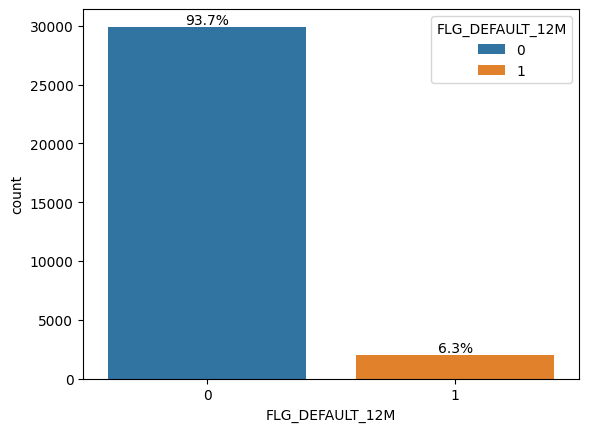

In [264]:
ax = sns.countplot(data = df_clase, x = "FLG_DEFAULT_12M", hue="FLG_DEFAULT_12M")
target_count = df_clase.FLG_DEFAULT_12M.value_counts()
print('# Buen_Pagador:', target_count[0])
print('# 1 Mora_12M:', target_count[1])
print('Bad rate:', target_count[1]/(target_count[0]+target_count[1]))

total = len(df_clase)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.1f}%'.format(100 * height/total)
        x = p.get_x() + p.get_width() / 2
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

#### **Analicemos volumetria y tasa de malos/default**

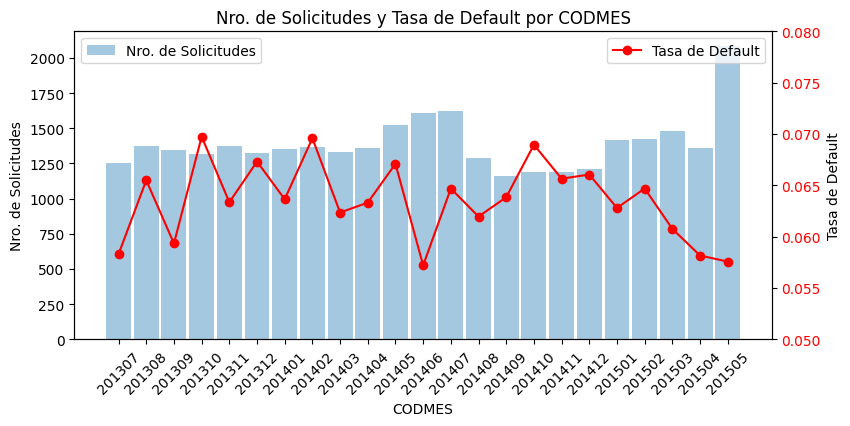

In [265]:
fig, ax1 = plt.subplots(figsize=(9, 4))

a1=df_clase.pivot_table(values="CODSOLICITUD", index="CODMES", aggfunc="count", sort=True)
a2=df_clase.pivot_table(values="FLG_DEFAULT_12M", index="CODMES", aggfunc="mean", sort=True)

ax1.bar(a1.index, a1['CODSOLICITUD'], alpha=0.4, width=0.9, label='Nro. de Solicitudes')
ax1.set_xlabel('CODMES')
ax1.set_ylabel('Nro. de Solicitudes')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

ax2.plot(a2.index, a2['FLG_DEFAULT_12M'], color='red', marker='o', label='Tasa de Default')
ax2.set_ylabel('Tasa de Default')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')
ax2.set_ylim(0.05, 0.08)

plt.title('Nro. de Solicitudes y Tasa de Default por CODMES')
plt.show()

#### **Hagamos el Análisis Univariado**

##### **Revisemos sus estadísticos básicos**

In [266]:
df_clase.select_dtypes(include=['number']).describe().T

count          mean           std         min  \
DEUDA                   31944.0   5769.284906   5848.504517    8.791365   
PLAZO_CREDITO           31944.0     39.996588     15.623734    6.000000   
FLG_DEFAULT_12M         31944.0      0.063361      0.243615    0.000000   
ATRASO_MAXIMO_ULT_6M    31944.0      0.254070      3.028339    0.000000   
ATRASO_MAXIMO_ULT_12M   31941.0      1.074168     38.857057    0.000000   
ATRASO_MAXIMO_ULT_24M   31937.0      2.107931     47.275929    0.000000   
MESES_AHORROS_ULT_6M    31266.0      5.157935      1.449751    1.000000   
MEDIANA_AHORROS_ULT_6M  31942.0   7161.642671   8621.384272    0.000000   
DEUDA_TOTAL_SISTEMA     28763.0  24409.216018  58799.081039    0.000000   
NUMERO_DE_PAGOS_PDH     31944.0     16.291948      9.419303    0.000000   
MONTO_TC_SISTEMA        31944.0   5577.705221  14303.455224    0.000000   
INGRESO_CLIENTE         31166.0   3247.384821   2584.502250  465.839706   
EDAD_T                  30954.0     36.855689      9.915298   20.000000   
CUOTA                   31294.0    687.000303   1223.568638    0.000000   
LINEA_DE_TC             31294.0  12531.112226  12179.848525    4.000000   
MONTO_TC_MEMBRESIA      31294.0    124.256758     75.954899   60.000000   

                                25%          50%           75%           max  
DEUDA                   1602.717111  3768.298333   7786.406583  2.054835e+05  
PLAZO_CREDITO             24.000000    48.000000     48.000000  6.000000e+01  
FLG_DEFAULT_12M            0.000000     0.000000      0.000000  1.000000e+00  
ATRASO_MAXIMO_ULT_6M       0.000000     0.000000      0.000000  2.310000e+02  
ATRASO_MAXIMO_ULT_12M      0.000000     0.000000      0.000000  5.647000e+03  
ATRASO_MAXIMO_ULT_24M      0.000000     0.000000      0.000000  5.647000e+03  
MESES_AHORROS_ULT_6M       5.000000     6.000000      6.000000  6.000000e+00  
MEDIANA_AHORROS_ULT_6M  1703.222083  4325.187267   9396.200433  8.185772e+05  
DEUDA_TOTAL_SISTEMA     1505.645000  6745.890000  20973.860000  1.458561e+06  
NUMERO_DE_PAGOS_PDH        7.000000    24.000000     24.000000  2.400000e+01  
MONTO_TC_SISTEMA           0.000000   470.910000   4093.860000  2.393316e+05  
INGRESO_CLIENTE         1671.818517  2260.061985   3715.128475  2.550329e+04  
EDAD_T                    29.000000    35.000000     42.000000  7.200000e+01  
CUOTA                     41.640160   233.620086    769.646152  2.184978e+04  
LINEA_DE_TC             4200.000000  9560.500000  17267.000000  1.544000e+05  
MONTO_TC_MEMBRESIA        64.000000   100.000000    170.000000  5.000000e+02

In [267]:
df_clase.select_dtypes(include=['object']).drop(columns=['CODMES', 'CODSOLICITUD']).describe().T

count unique           top   freq
FLG_GARANTIA             31944      2             0  30605
SEGMENTOCLIENTE          31944      7  CLIENTES ORO  22101
TARJETA_RELACIONADA      31944      2             1  19914
VEHICULAR_RELACIONADA    31944      2             0  31612
HIPOTECARIO_RELACIONADA  31944      2             0  31212
CLASIF_SISTEMA_ULT_12M   31944      6           0.0  23640
FLG_PDH                  31944      2             1  26825
PROFESION                31604    175       TECNICO  10980
ZONA_DEL_DESEMBOLSO      30954     30      AREQUIPA   3664
ESTADO_CIVIL             30954      6           SOL  21258
FLG_TC_VISA              31944      3           0.0  19462
FLG_TC_MC                31944      3           0.0  19235

##### **Revisemos las variable numéricas**

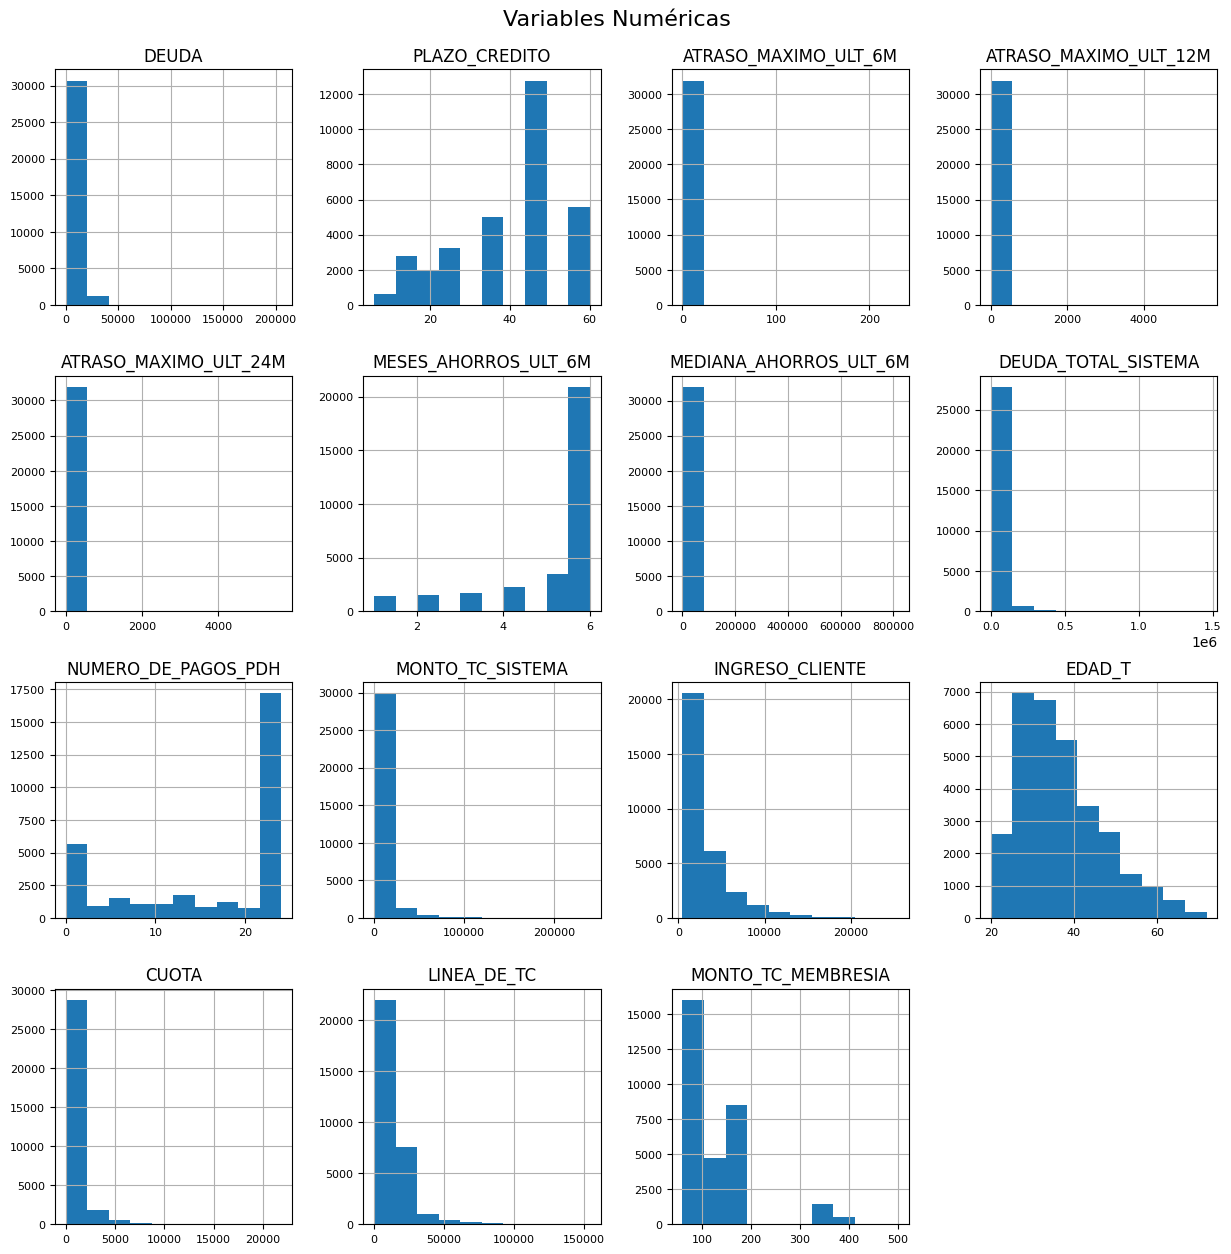

In [268]:
df_clase.drop(columns = ['FLG_DEFAULT_12M']).hist(figsize = (15, 15), xlabelsize=8, ylabelsize=8)
plt.suptitle('Variables Numéricas', y=0.92, fontsize=16)
plt.show()

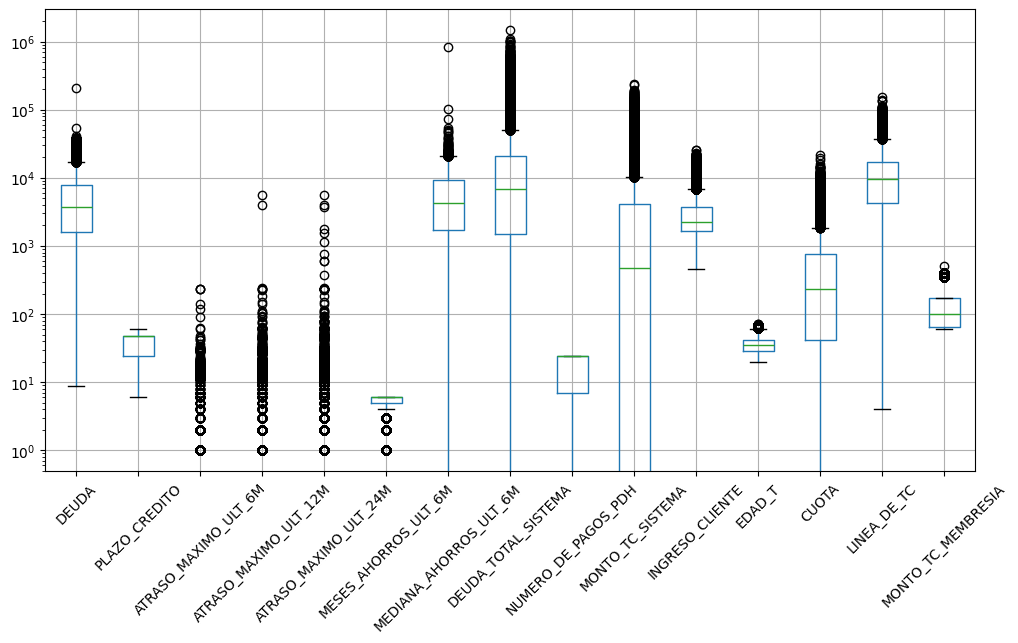

In [269]:
df_clase.drop(columns = ['FLG_DEFAULT_12M']).boxplot(figsize = (12, 6))
plt.yscale('log')
plt.xticks(rotation = 45)
plt.show()

##### **Revisemos las variables categóricas**

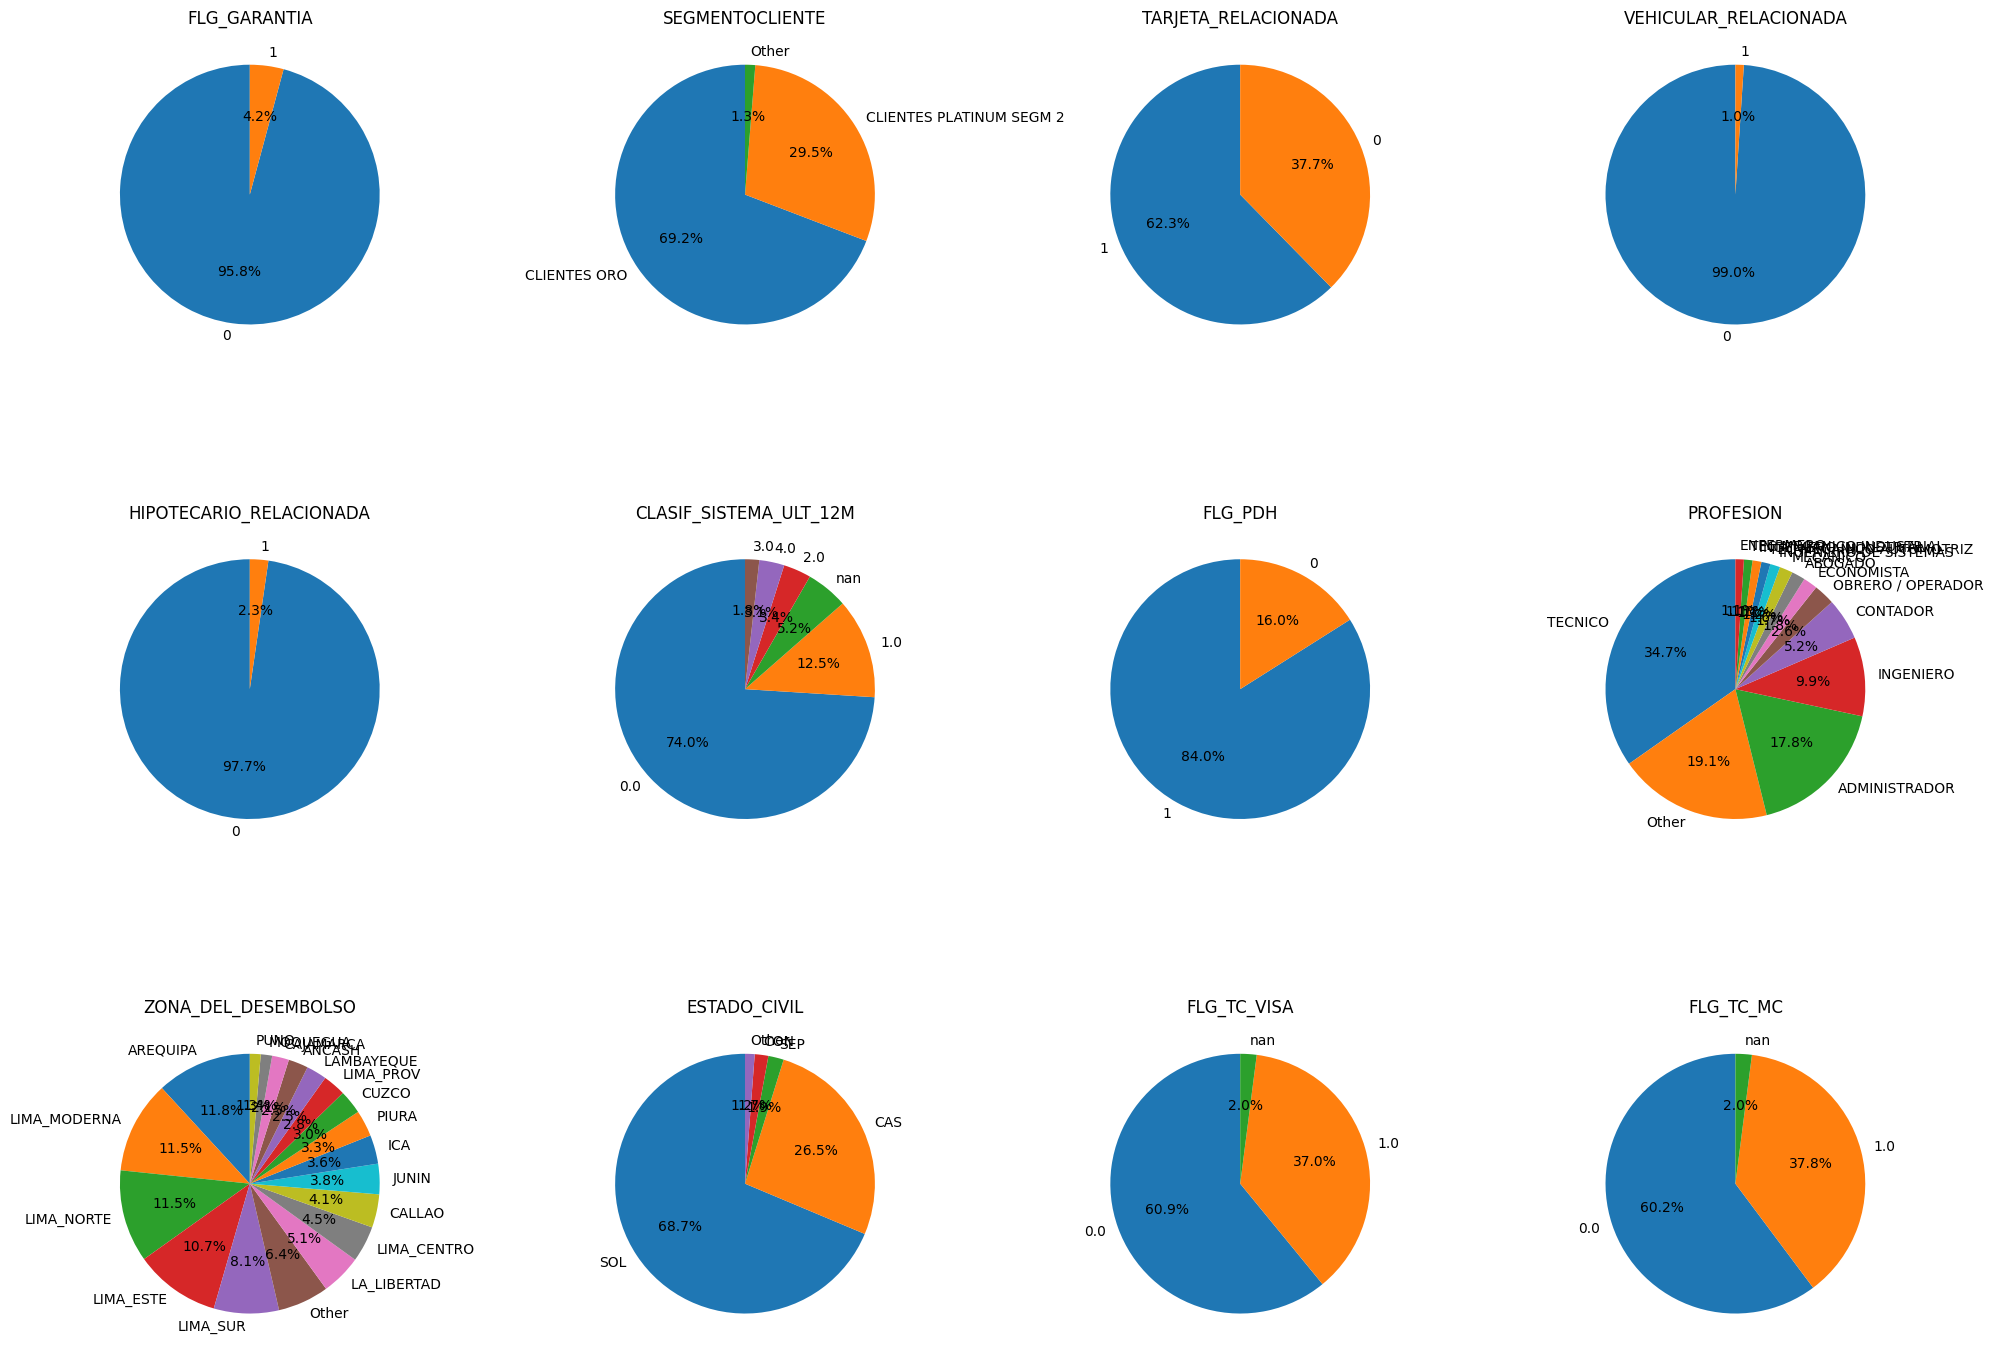

In [270]:
cat_cols = df_clase.select_dtypes(include='object').columns.tolist()
cat_cols_to_plot = [col for col in cat_cols if col not in ['CODSOLICITUD', 'CODMES', 'MIN_MES_DE_DEFAULT']]

n_cols = 4
n_rows = (len(cat_cols_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(cat_cols_to_plot):
    ax = axes[i]

    value_counts = df_clase[col].value_counts(normalize=True)
    less_than_1_percent = value_counts[value_counts < 0.01].index
    df_plot = df_clase[col].replace(less_than_1_percent, 'Other').value_counts()

    df_plot.plot.pie(ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{col}')
    ax.set_ylabel('')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

##### **Revisemos la cantidad de nulos y sus proporciones por variable**

In [271]:
null_values = pd.concat([df_clase.isnull().sum(), df_clase.isnull().sum() / len(df_clase)], axis = 1)
null_values.rename(columns = {0: 'number_null_values',1: 'ratio_null_values'}, inplace = True)
null_values[null_values['ratio_null_values'] > 0]

number_null_values  ratio_null_values
ATRASO_MAXIMO_ULT_12M                    3           0.000094
ATRASO_MAXIMO_ULT_24M                    7           0.000219
MESES_AHORROS_ULT_6M                   678           0.021225
MEDIANA_AHORROS_ULT_6M                   2           0.000063
DEUDA_TOTAL_SISTEMA                   3181           0.099581
INGRESO_CLIENTE                        778           0.024355
PROFESION                              340           0.010644
ZONA_DEL_DESEMBOLSO                    990           0.030992
ESTADO_CIVIL                           990           0.030992
EDAD_T                                 990           0.030992
CUOTA                                  650           0.020348
LINEA_DE_TC                            650           0.020348
MONTO_TC_MEMBRESIA                     650           0.020348

###### Identificar variables con más del 1% de valores perdidos

In [272]:
variables_with_high_missing = null_values[null_values['ratio_null_values'] > 0.01].index.tolist()
print("Variables con más del 1% de valores perdidos:")
print(variables_with_high_missing)

Variables con más del 1% de valores perdidos:
['MESES_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA', 'INGRESO_CLIENTE', 'PROFESION', 'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'EDAD_T', 'CUOTA', 'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA']


###### Visualizar patrones de valores perdidos

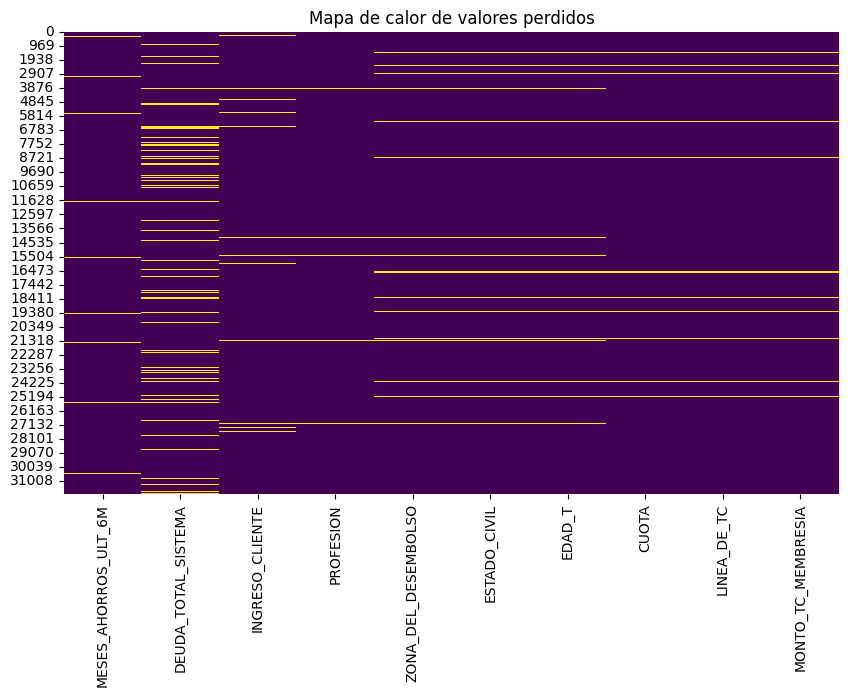

In [273]:
df_high_missing = df_clase[variables_with_high_missing]
plt.figure(figsize=(10, 6))
sns.heatmap(df_high_missing.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores perdidos')
plt.show()

###### Probar si existe aleatoriedad en los valores perdidos o no

In [274]:
from scipy import stats
for missing_var in variables_with_high_missing:
    print(f"\n--- Analyzing missingness in '{missing_var}' ---")

    #Separar en grupos con y sin valores perdidos apra cada variable
    df_missing = df_clase[df_clase[missing_var].isnull()]
    df_not_missing = df_clase[df_clase[missing_var].notnull()]

    print(f"Number of rows with missing '{missing_var}': {len(df_missing)}")
    print(f"Number of rows without missing '{missing_var}': {len(df_not_missing)}")

    # Analizar las otras variables respecto a el missing o no
    print("\nComparing distributions of other variables:")
    other_vars_to_compare = [col for col in df_clase.columns if col not in variables_with_high_missing + [missing_var, 'CODMES', 'CODSOLICITUD', 'MIN_MES_DE_DEFAULT']]
    numerical_vars_to_compare = df_clase[other_vars_to_compare].select_dtypes(include=np.number).columns.tolist()
    categorical_vars_to_compare = df_clase[other_vars_to_compare].select_dtypes(include='object').columns.tolist()

    # Comparar variables numéricas usando test t
    print("\nComparing numerical variables (t-tests):")
    for other_var in numerical_vars_to_compare:
        if len(df_missing) > 1 and len(df_not_missing) > 1 and df_missing[other_var].nunique() > 1 and df_not_missing[other_var].nunique() > 1:
            try:
                ttest_result = stats.ttest_ind(df_missing[other_var].dropna(), df_not_missing[other_var].dropna())
                print(f"  - {other_var}: p-value = {ttest_result.pvalue:.4f}")
                if ttest_result.pvalue < 0.05:
                    print("    (Distributions are significantly different - suggests not MCAR)")
                else:
                    print("    (Distributions are not significantly different - consistent with MCAR)")
            except Exception as e:
                print(f"  - {other_var}: Could not perform t-test ({e})")
        else:
             print(f"  - {other_var}: Not enough data or variance to perform t-test")

    # Comparar variables categóricas usando test chi cuadrado
    print("\nComparing categorical variables (Chi-squared tests):")
    for other_var in categorical_vars_to_compare:
        if len(df_missing) > 0 and len(df_not_missing) > 0 and df_missing[other_var].nunique() > 1 and df_not_missing[other_var].nunique() > 1:
            try:
                contingency_table = pd.crosstab(df_clase[other_var], df_clase[missing_var].isnull())
                chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
                print(f"  - {other_var}: p-value = {p_value:.4f}")
                if p_value < 0.05:
                    print("    (Distributions are significantly different - suggests not MCAR)")
                else:
                    print("    (Distributions are not significantly different - consistent with MCAR)")
            except Exception as e:
                print(f"  - {other_var}: Could not perform Chi-squared test ({e})")
        else:
            print(f"  - {other_var}: Not enough data or variance to perform Chi-squared test")


--- Analyzing missingness in 'MESES_AHORROS_ULT_6M' ---
Number of rows with missing 'MESES_AHORROS_ULT_6M': 678
Number of rows without missing 'MESES_AHORROS_ULT_6M': 31266

Comparing distributions of other variables:

Comparing numerical variables (t-tests):
  - DEUDA: p-value = 0.0000
    (Distributions are significantly different - suggests not MCAR)
  - PLAZO_CREDITO: p-value = 0.0000
    (Distributions are significantly different - suggests not MCAR)
  - FLG_DEFAULT_12M: p-value = 0.0000
    (Distributions are significantly different - suggests not MCAR)
  - ATRASO_MAXIMO_ULT_6M: p-value = 0.0227
    (Distributions are significantly different - suggests not MCAR)
  - ATRASO_MAXIMO_ULT_12M: p-value = 0.8270
    (Distributions are not significantly different - consistent with MCAR)
  - ATRASO_MAXIMO_ULT_24M: p-value = 0.8279
    (Distributions are not significantly different - consistent with MCAR)
  - MEDIANA_AHORROS_ULT_6M: p-value = 0.0000
    (Distributions are significantly di

###### **Conclusión sobre la tipología de los datos faltantes:**

##### En general, dado que para la mayoría de las variables con valores faltantes encontramos que las distribuciones de otras variables difieren significativamente entre los casos con y sin missing, es poco probable que los datos sean **MCAR (Missing Completely At Random).**
##### Por ende, eliminar las filas con valores faltantes podría introducir sesgos.

##### **Revisemos los valores atípicos**

###### Basado en rangos intercuartílicos

In [275]:
def outliers_col(df):
    outlier_data = []
    for columna in df.select_dtypes(include=np.number).columns:
        q1 = stats.scoreatpercentile(df[columna], 25)
        q3 = stats.scoreatpercentile(df[columna], 75)
        iqr = q3 - q1
        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr
        n_outliers_inf = len(df[(df[columna] < lim_inf)])
        n_outliers_sup = len(df[(df[columna] > lim_sup)])
        total_count = len(df[columna])
        pct_outliers_inf = (n_outliers_inf / total_count) * 100
        pct_outliers_sup = (n_outliers_sup / total_count) * 100

        outlier_data.append({
            'Variable': columna,
            'Outliers < Lim Inf': n_outliers_inf,
            'Pct < Lim Inf': f'{pct_outliers_inf:.2f}%',
            'Outliers > Lim Sup': n_outliers_sup,
            'Pct > Lim Sup': f'{pct_outliers_sup:.2f}%'
        })

    outlier_df = pd.DataFrame(outlier_data)
    return outlier_df

In [276]:
outlier_df = outliers_col(df_clase)
outlier_df['Pct < Lim Inf Numeric'] = outlier_df['Pct < Lim Inf'].str.replace('%', '').astype(float)
outlier_df['Pct > Lim Sup Numeric'] = outlier_df['Pct > Lim Sup'].str.replace('%', '').astype(float)
filtered_outliers = outlier_df[(outlier_df['Pct < Lim Inf Numeric'] > 0) | (outlier_df['Pct > Lim Sup Numeric'] > 0)]
display(filtered_outliers.drop(columns=['Pct < Lim Inf Numeric', 'Pct > Lim Sup Numeric']))

Variable  Outliers < Lim Inf Pct < Lim Inf  \
0                    DEUDA                   0         0.00%   
2          FLG_DEFAULT_12M                   0         0.00%   
3     ATRASO_MAXIMO_ULT_6M                   0         0.00%   
4    ATRASO_MAXIMO_ULT_12M                   0         0.00%   
5    ATRASO_MAXIMO_ULT_24M                   0         0.00%   
6     MESES_AHORROS_ULT_6M                4635        14.51%   
7   MEDIANA_AHORROS_ULT_6M                   0         0.00%   
8      DEUDA_TOTAL_SISTEMA                   0         0.00%   
10        MONTO_TC_SISTEMA                   0         0.00%   
11         INGRESO_CLIENTE                   0         0.00%   
12                  EDAD_T                   0         0.00%   
13                   CUOTA                   0         0.00%   
14             LINEA_DE_TC                   0         0.00%   
15      MONTO_TC_MEMBRESIA                   0         0.00%   

    Outliers > Lim Sup Pct > Lim Sup  
0                 2126         6.66%  
2                 2024         6.34%  
3                 2005         6.28%  
4                 4154        13.00%  
5                 6634        20.77%  
6                    0         0.00%  
7                 3318        10.39%  
8                 1880         5.89%  
10                4470        13.99%  
11                2512         7.86%  
12                 350         1.10%  
13                2867         8.98%  
14                1200         3.76%  
15                2015         6.31%

###### Basado en Modelos Isolation Forest (Multivariado)

In [277]:
from sklearn.ensemble import IsolationForest

# Seleccioanr variables numéricas
numerical_cols_for_if = df_clase.select_dtypes(include=np.number).columns.tolist()
df_numerical_if = df_clase[numerical_cols_for_if].dropna()

# Inicializar el modelo Isolation Forest
iso_forest = IsolationForest(random_state=42, contamination='auto')
iso_forest.fit(df_numerical_if)

# Predecir outliers
outlier_labels = iso_forest.predict(df_numerical_if)
anomaly_scores = iso_forest.decision_function(df_numerical_if)

# Conteo de outliers
n_outliers = list(outlier_labels).count(-1)
total_samples = len(df_numerical_if)
pct_outliers = (n_outliers / total_samples) * 100

print(f"--- Outlier Analysis using Isolation Forest ---")
print(f"Total samples analyzed: {total_samples}")
print(f"Number of outliers detected: {n_outliers}")
print(f"Percentage of outliers: {pct_outliers:.2f}%")

--- Outlier Analysis using Isolation Forest ---
Total samples analyzed: 26952
Number of outliers detected: 3325
Percentage of outliers: 12.34%


In [278]:
#plt.figure(figsize=(10, 6))
#sns.histplot(anomaly_scores, bins=50, kde=True)
#plt.title('Distribución de Scores de Anomalías (Isolation Forest)')
#plt.xlabel('Score de Anomalías')
#plt.ylabel('Frecuencia')
#plt.show()

In [279]:
#df_numerical_if['outlier'] = outlier_labels
#display(df_numerical_if.groupby('outlier').describe().T)

###### Comparación entre outliers IQR y Isolation Forest

In [280]:
df_compare_outliers = df_clase.copy()

In [281]:
import re

def add_iqr_outlier_flags_to_df(df_input):
    modified_df = df_input.copy()
    numerical_cols = modified_df.select_dtypes(include=np.number).columns

    for col in numerical_cols:
        Q1 = modified_df[col].quantile(0.25)
        Q3 = modified_df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        modified_df[f'is_outlier_iqr_{col}'] = (
            (modified_df[col] < lower_bound) | (modified_df[col] > upper_bound)
        )
    return modified_df

df_compare_outliers = add_iqr_outlier_flags_to_df(df_compare_outliers)
outlier_iqr_cols_temp = [col for col in df_compare_outliers.columns if re.match(r'is_outlier_iqr_.*', col)]
df_compare_outliers['is_outlier_iqr_any'] = df_compare_outliers[outlier_iqr_cols_temp].any(axis=1)
print("--- IQR Outlier Flagging on Copy Complete ---")
display(df_compare_outliers[['is_outlier_iqr_any'] + outlier_iqr_cols_temp].head())

--- IQR Outlier Flagging on Copy Complete ---


is_outlier_iqr_any  is_outlier_iqr_DEUDA  is_outlier_iqr_PLAZO_CREDITO  \
0               False                 False                         False   
1               False                 False                         False   
2               False                 False                         False   
3                True                 False                         False   
4               False                 False                         False   

   is_outlier_iqr_FLG_DEFAULT_12M  is_outlier_iqr_ATRASO_MAXIMO_ULT_6M  \
0                           False                                False   
1                           False                                False   
2                           False                                False   
3                            True                                False   
4                           False                                False   

   is_outlier_iqr_ATRASO_MAXIMO_ULT_12M  is_outlier_iqr_ATRASO_MAXIMO_ULT_24M  \
0                                 False                                 False   
1                                 False                                 False   
2                                 False                                 False   
3                                 False                                 False   
4                                 False                                 False   

   is_outlier_iqr_MESES_AHORROS_ULT_6M  is_outlier_iqr_MEDIANA_AHORROS_ULT_6M  \
0                                False                                  False   
1                                False                                  False   
2                                False                                  False   
3                                False                                  False   
4                                False                                  False   

   is_outlier_iqr_DEUDA_TOTAL_SISTEMA  is_outlier_iqr_NUMERO_DE_PAGOS_PDH  \
0                               False                               False   
1                               False                               False   
2                               False                               False   
3                               False                               False   
4                               False                               False   

   is_outlier_iqr_MONTO_TC_SISTEMA  is_outlier_iqr_INGRESO_CLIENTE  \
0                            False                           False   
1                            False                           False   
2                            False                           False   
3                            False                           False   
4                            False                           False   

   is_outlier_iqr_EDAD_T  is_outlier_iqr_CUOTA  is_outlier_iqr_LINEA_DE_TC  \
0                  False                 False                       False   
1                  False                 False                       False   
2                  False                 False                       False   
3                  False                 False                       False   
4                  False                 False                       False   

   is_outlier_iqr_MONTO_TC_MEMBRESIA  
0                              False  
1                              False  
2                              False  
3                              False  
4                              False

In [282]:
numerical_cols_for_if_model_temp = df_compare_outliers.select_dtypes(include=np.number).columns.tolist()
numerical_cols_for_if_model_temp = [col for col in numerical_cols_for_if_model_temp if not (col.startswith('is_outlier_iqr_') or col == 'is_outlier_iqr_any')]
df_numerical_for_if_temp = df_compare_outliers[numerical_cols_for_if_model_temp].dropna()
iso_forest_temp = IsolationForest(random_state=42, contamination='auto')
iso_forest_temp.fit(df_numerical_for_if_temp)
anomaly_labels_temp = iso_forest_temp.predict(df_numerical_for_if_temp)
is_outlier_if_temp = pd.Series(False, index=df_compare_outliers.index, name='is_outlier_if')
is_outlier_if_temp.loc[df_numerical_for_if_temp.index] = (anomaly_labels_temp == -1)
df_compare_outliers['is_outlier_if'] = is_outlier_if_temp

print("\n--- Isolation Forest Outlier Flagging on Copy Complete ---")
display(df_compare_outliers['is_outlier_if'].value_counts())


--- Isolation Forest Outlier Flagging on Copy Complete ---


is_outlier_if
False    28619
True      3325
Name: count, dtype: int64

In [283]:
print("\n--- Comparación de Outliers (IQR vs. Isolation Forest) ---")
contingency_table = pd.crosstab(df_compare_outliers['is_outlier_iqr_any'], df_compare_outliers['is_outlier_if'], margins=True)
print("\nContingency Table (IQR vs. Isolation Forest Outliers):\n")
display(contingency_table)


--- Comparación de Outliers (IQR vs. Isolation Forest) ---

Contingency Table (IQR vs. Isolation Forest Outliers):



is_outlier_if       False  True    All
is_outlier_iqr_any                    
False               14374     0  14374
True                14245  3325  17570
All                 28619  3325  31944

In [284]:
total_samples = contingency_table.loc['All', 'All']

agreement_both_inlier = contingency_table.loc[False, False]
agreement_both_outlier = 0 # Default to 0 if True, True cell doesn't exist
if True in contingency_table.index and True in contingency_table.columns:
    agreement_both_outlier = contingency_table.loc[True, True]
overall_agreement_pct = ((agreement_both_inlier + agreement_both_outlier) / total_samples) * 100
overlap_outlier_pct = (agreement_both_outlier / total_samples) * 100
iqr_only_outlier_pct = 0 # Default to 0
if True in contingency_table.index and False in contingency_table.columns:
    iqr_only_outlier_pct = (contingency_table.loc[True, False] / total_samples) * 100

if_only_outlier_pct = 0 # Default to 0
if False in contingency_table.index and True in contingency_table.columns:
    if_only_outlier_pct = (contingency_table.loc[False, True] / total_samples) * 100

print(f"\nPorcentaje de Coincidencia Global: {overall_agreement_pct:.2f}%")
print(f"Porcentaje donde ambos coinciden: {overlap_outlier_pct:.2f}%")
print(f"Porcentaje Oultiers solo por IQR: {iqr_only_outlier_pct:.2f}%")
print(f"Porcentaje Ouliers solo por IF: {if_only_outlier_pct:.2f}%")


Porcentaje de Coincidencia Global: 55.41%
Porcentaje donde ambos coinciden: 10.41%
Porcentaje Oultiers solo por IQR: 44.59%
Porcentaje Ouliers solo por IF: 0.00%


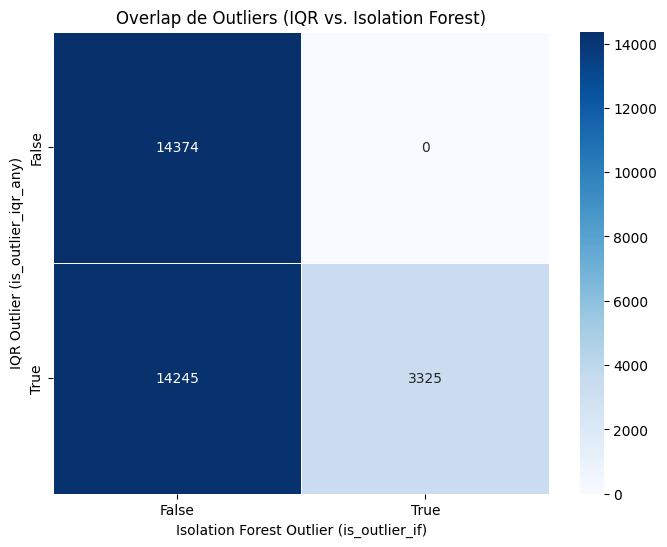

In [285]:
plt.figure(figsize=(8, 6))
plot_table_values = pd.DataFrame(0, index=[False, True], columns=[False, True])
for idx in [False, True]:
    for col_val in [False, True]:
        if idx in contingency_table.index and col_val in contingency_table.columns:
            plot_table_values.loc[idx, col_val] = contingency_table.loc[idx, col_val]

sns.heatmap(plot_table_values, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Overlap de Outliers (IQR vs. Isolation Forest)')
plt.xlabel('Isolation Forest Outlier (is_outlier_if)')
plt.ylabel('IQR Outlier (is_outlier_iqr_any)')
plt.show()

##### **Revisemos las correlaciones / asociaciones**

DEUDA  PLAZO_CREDITO  ATRASO_MAXIMO_ULT_6M  \
DEUDA                   1.000000       0.563483              0.011512   
PLAZO_CREDITO           0.563483       1.000000              0.022457   
ATRASO_MAXIMO_ULT_6M    0.011512       0.022457              1.000000   
ATRASO_MAXIMO_ULT_12M  -0.003455      -0.003804              0.083028   
ATRASO_MAXIMO_ULT_24M  -0.003098       0.000413              0.078199   
MESES_AHORROS_ULT_6M    0.133302       0.048946             -0.040203   
MEDIANA_AHORROS_ULT_6M  0.284829       0.149256             -0.004495   
DEUDA_TOTAL_SISTEMA     0.347254       0.225000              0.030198   
NUMERO_DE_PAGOS_PDH    -0.109651      -0.034037             -0.017221   
MONTO_TC_SISTEMA        0.388112       0.239272              0.014766   
INGRESO_CLIENTE         0.452504       0.244348              0.004088   
EDAD_T                  0.147920       0.045946              0.010250   
CUOTA                   0.473427       0.321024              0.027450   
LINEA_DE_TC             0.266316       0.124693             -0.011218   
MONTO_TC_MEMBRESIA      0.326340       0.151804              0.001030   

                        ATRASO_MAXIMO_ULT_12M  ATRASO_MAXIMO_ULT_24M  \
DEUDA                               -0.003455              -0.003098   
PLAZO_CREDITO                       -0.003804               0.000413   
ATRASO_MAXIMO_ULT_6M                 0.083028               0.078199   
ATRASO_MAXIMO_ULT_12M                1.000000               0.822126   
ATRASO_MAXIMO_ULT_24M                0.822126               1.000000   
MESES_AHORROS_ULT_6M                -0.023398              -0.024684   
MEDIANA_AHORROS_ULT_6M              -0.001436              -0.007211   
DEUDA_TOTAL_SISTEMA                  0.000114              -0.002469   
NUMERO_DE_PAGOS_PDH                 -0.002735              -0.009444   
MONTO_TC_SISTEMA                    -0.002195              -0.003688   
INGRESO_CLIENTE                     -0.006061              -0.010092   
EDAD_T                              -0.001312               0.006465   
CUOTA                               -0.000237              -0.001355   
LINEA_DE_TC                         -0.004734              -0.008129   
MONTO_TC_MEMBRESIA                  -0.002998              -0.008661   

                        MESES_AHORROS_ULT_6M  MEDIANA_AHORROS_ULT_6M  \
DEUDA                               0.133302                0.284829   
PLAZO_CREDITO                       0.048946                0.149256   
ATRASO_MAXIMO_ULT_6M               -0.040203               -0.004495   
ATRASO_MAXIMO_ULT_12M              -0.023398               -0.001436   
ATRASO_MAXIMO_ULT_24M              -0.024684               -0.007211   
MESES_AHORROS_ULT_6M                1.000000                0.227005   
MEDIANA_AHORROS_ULT_6M              0.227005                1.000000   
DEUDA_TOTAL_SISTEMA                 0.074298                0.205670   
NUMERO_DE_PAGOS_PDH                 0.072479                0.104674   
MONTO_TC_SISTEMA                    0.045134                0.126633   
INGRESO_CLIENTE                     0.284736                0.545248   
EDAD_T                             -0.011234                0.191158   
CUOTA                               0.085142                0.210583   
LINEA_DE_TC                         0.151250                0.272078   
MONTO_TC_MEMBRESIA                  0.141160                0.262680   

                        DEUDA_TOTAL_SISTEMA  NUMERO_DE_PAGOS_PDH  \
DEUDA                              0.347254            -0.109651   
PLAZO_CREDITO                      0.225000            -0.034037   
ATRASO_MAXIMO_ULT_6M               0.030198            -0.017221   
ATRASO_MAXIMO_ULT_12M              0.000114            -0.002735   
ATRASO_MAXIMO_ULT_24M             -0.002469            -0.009444   
MESES_AHORROS_ULT_6M               0.074298             0.072479   
MEDIANA_AHORROS_ULT_6M             0.205670             0.104674   
DEUDA_TO

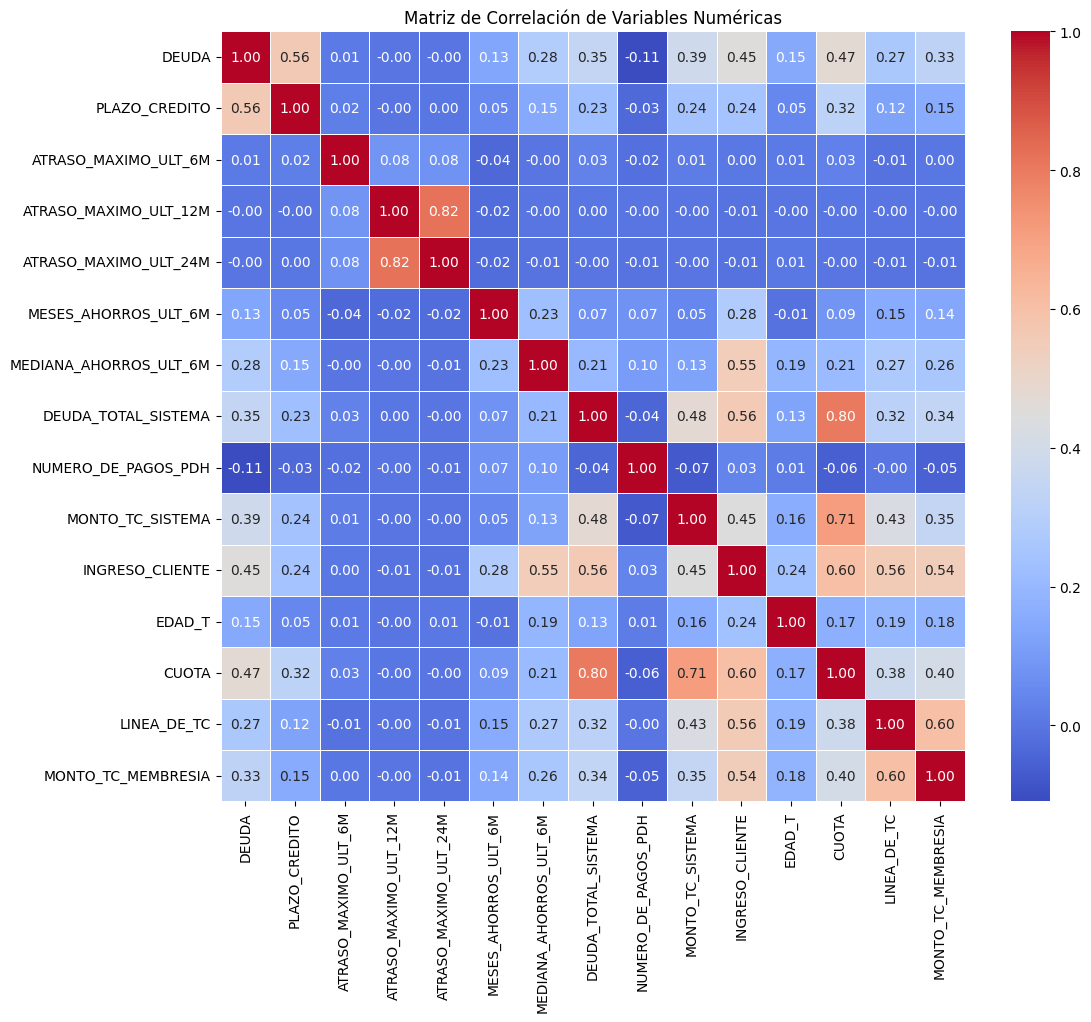

In [286]:
df_numerical = df_clase.select_dtypes(include=np.number).drop(columns = ['FLG_DEFAULT_12M'])
correlation_matrix = df_numerical.corr()
display(correlation_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

In [287]:
import scipy.stats as stats

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

FLG_GARANTIA SEGMENTOCLIENTE TARJETA_RELACIONADA  \
FLG_GARANTIA                     1.0        0.260842            0.054121   
SEGMENTOCLIENTE             0.260842             1.0            0.118394   
TARJETA_RELACIONADA         0.054121        0.118394                 1.0   
VEHICULAR_RELACIONADA       0.444479        0.118984            0.030407   
HIPOTECARIO_RELACIONADA     0.613645        0.205859            0.034598   
CLASIF_SISTEMA_ULT_12M      0.053931         0.05158            0.219446   
FLG_PDH                     0.057612        0.146931            0.064448   
PROFESION                   0.280583        0.149028            0.132365   
ZONA_DEL_DESEMBOLSO         0.172486        0.113278            0.122434   
ESTADO_CIVIL                0.132809        0.096301            0.057724   
FLG_TC_VISA                 0.056902        0.082162            0.986192   
FLG_TC_MC                   0.059413        0.085176            0.971012   

                        VEHICULAR_RELACIONADA HIPOTECARIO_RELACIONADA  \
FLG_GARANTIA                         0.444479                0.613645   
SEGMENTOCLIENTE                      0.118984                0.205859   
TARJETA_RELACIONADA                  0.030407                0.034598   
VEHICULAR_RELACIONADA                     1.0                0.065553   
HIPOTECARIO_RELACIONADA              0.065553                     1.0   
CLASIF_SISTEMA_ULT_12M               0.028395                0.042198   
FLG_PDH                               0.01252                0.034451   
PROFESION                            0.270059                0.173874   
ZONA_DEL_DESEMBOLSO                  0.099357                0.126447   
ESTADO_CIVIL                         0.034425                   0.123   
FLG_TC_VISA                          0.031455                0.036818   
FLG_TC_MC                            0.032846                0.038915   

                        CLASIF_SISTEMA_ULT_12M   FLG_PDH PROFESION  \
FLG_GARANTIA                          0.053931  0.057612  0.280583   
SEGMENTOCLIENTE                        0.05158  0.146931  0.149028   
TARJETA_RELACIONADA                   0.219446  0.064448  0.132365   
VEHICULAR_RELACIONADA                 0.028395   0.01252  0.270059   
HIPOTECARIO_RELACIONADA               0.042198  0.034451  0.173874   
CLASIF_SISTEMA_ULT_12M                     1.0  0.041214  0.063383   
FLG_PDH                               0.041214       1.0  0.153746   
PROFESION                             0.063383  0.153746       1.0   
ZONA_DEL_DESEMBOLSO                   0.046001  0.110013  0.112668   
ESTADO_CIVIL                           0.02759  0.043326  0.093342   
FLG_TC_VISA                           0.153317  0.062718   0.71091   
FLG_TC_MC                             0.149788   0.06559  0.711174   

                        ZONA_DEL_DESEMBOLSO ESTADO_CIVIL FLG_TC_VISA FLG_TC_MC  
FLG_GARANTIA                       0.172486     0.132809    0.056902  0.059413  
SEGMENTOCLIENTE                    0.113278     0.096301    0.082162  0.085176  
TARJETA_RELACIONADA                0.122434     0.057724    0.986192  0.971012  
VEHICULAR_RELACIONADA              0.099357     0.034425    0.031455  0.032846  
HIPOTECARIO_RELACIONADA            0.126447        0.123    0.036818  0.038915  
CLASIF_SISTEMA_ULT_12M             0.046001      0.02759    0.153317  0.149788  
FLG_PDH                            0.110013     0.043326    0.062718   0.06559  
PROFESION                          0.112668     0.093342     0.71091  0.711174  
ZONA_DEL_DESEMBOLSO                     1.0     0.075394    0.122548  0.124144  
ESTADO_CIVIL                       0.075394          1.0    0.057311  0.051523  
FLG_TC_VISA                        0.122548     0.057311         1.0  0.988983  
FLG_TC_MC                          0.124144     0.051523    0.988983       1.0

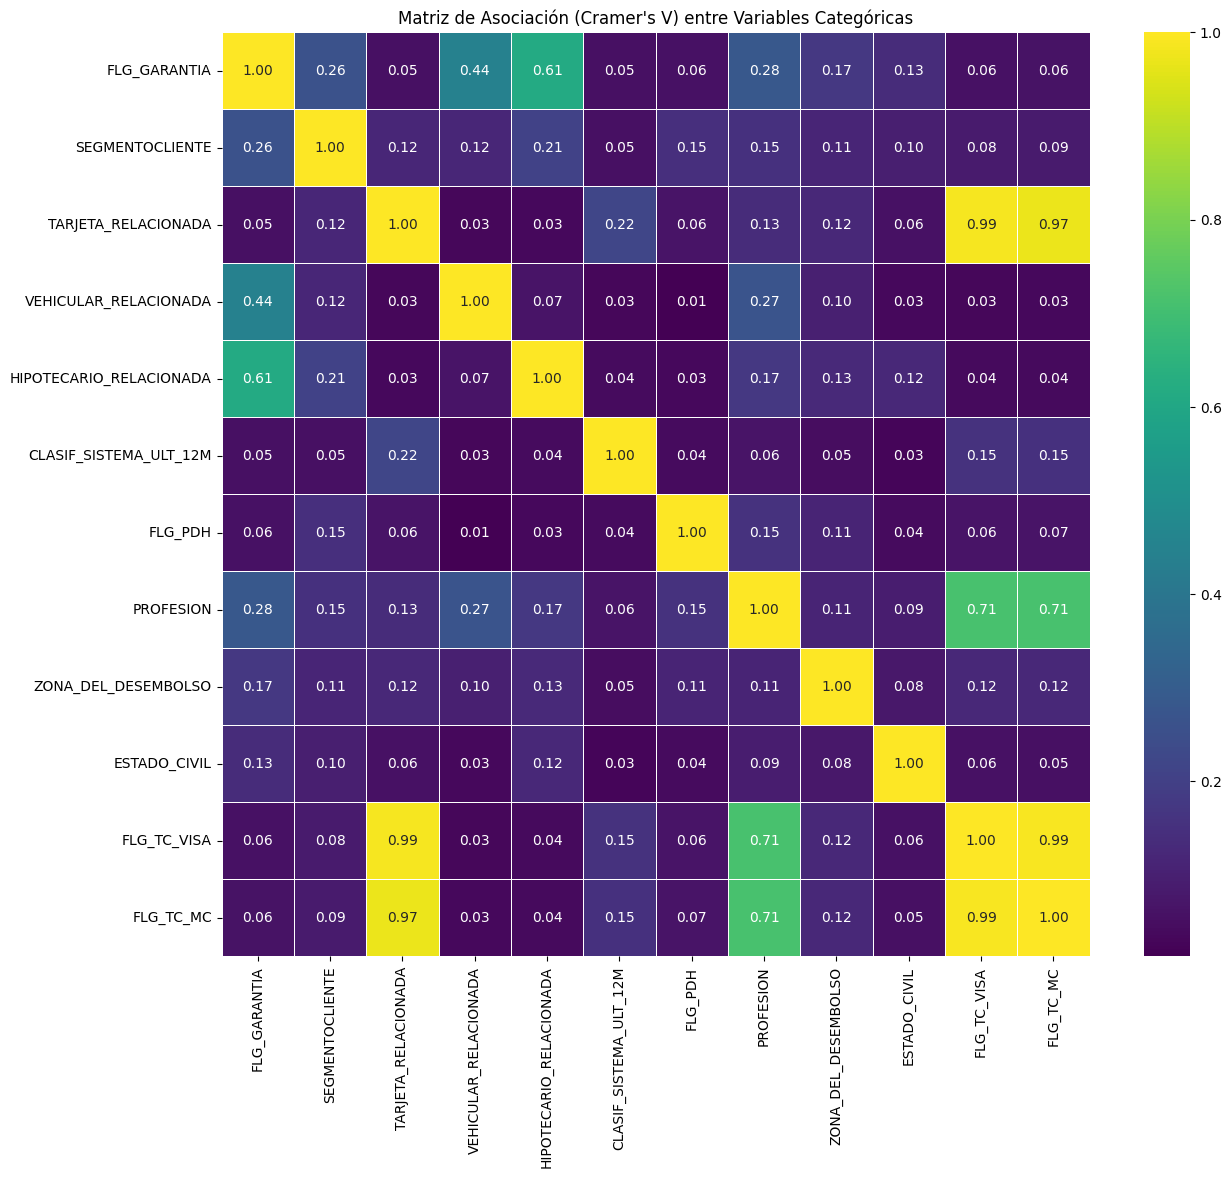

In [288]:
categorical_cols = df_clase.select_dtypes(include='object').columns.tolist()
categorical_cols_filtered = [col for col in categorical_cols if col not in ['CODMES', 'CODSOLICITUD', 'MIN_MES_DE_DEFAULT']]

cramer_matrix = pd.DataFrame(index=categorical_cols_filtered, columns=categorical_cols_filtered)

for col1 in categorical_cols_filtered:
    for col2 in categorical_cols_filtered:
        if col1 == col2:
            cramer_matrix.loc[col1, col2] = 1.0
        else:
            temp_df = df_clase[[col1, col2]].dropna()
            if len(temp_df) > 0:
                try:
                    cramer_matrix.loc[col1, col2] = cramers_v(temp_df[col1], temp_df[col2])
                except ValueError:
                    cramer_matrix.loc[col1, col2] = np.nan # If calculation fails due to insufficient data/variance
            else:
                cramer_matrix.loc[col1, col2] = np.nan

display(cramer_matrix)

plt.figure(figsize=(14, 12))
sns.heatmap(cramer_matrix.astype(float), annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Matriz de Asociación (Cramer\'s V) entre Variables Categóricas')
plt.show()

## **3. Feature Engineering**

##### **Paso previo**

In [289]:
# Parche para que se deje en nulo los registros donde tenemos nan
for col in df_clase.select_dtypes(include='object').columns:
    df_clase[col] = df_clase[col].replace('nan', np.nan)

##### **Partición Train y test (considerando estratificación de la Y)**

In [290]:
# Para partir las bases
from sklearn.model_selection import train_test_split

In [291]:
X_train, X_test, y_train, y_test = train_test_split(
    df_clase.drop("FLG_DEFAULT_12M", axis=1),
    df_clase["FLG_DEFAULT_12M"],
    test_size=0.3,
    random_state=0,
    stratify=df_clase["FLG_DEFAULT_12M"] #este punto es importante para asegurar un adecuado muestreo de la variable objetivo
)

X_train.shape, X_test.shape

((22360, 29), (9584, 29))

In [292]:
# Comprobación de la proporción de Y en train
print(f"{y_train.mean():.5f}")

0.06337


In [293]:
# Comprobación de la proporción de Y en test
print(f"{y_test.mean():.5f}")

0.06333


### **3.1 Tratamiento de Missing:**
###### Según el caso, si se tiene conocimiento de la razón de los valores perdidos, elegiremos rellenar estos casos con un valor usualmente conocido. De no ser el caso, imputaremos con un criterio que no agregue sesgo a los datos, sea univariado o multivariado.

##### **Primeros pasos, carga de librerias y vistas generales**

In [294]:
!pip install feature_engine

In [295]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

In [296]:
# Revisión de la proporción de nulos por variable
null_values = pd.concat([X_train.isnull().sum(), X_train.isnull().sum() / len(X_train)], axis = 1)
null_values.rename(columns = {0: 'number_null_values',1: 'ratio_null_values'}, inplace = True)
null_values[null_values['ratio_null_values'] > 0]

number_null_values  ratio_null_values
ATRASO_MAXIMO_ULT_12M                    1           0.000045
ATRASO_MAXIMO_ULT_24M                    4           0.000179
MESES_AHORROS_ULT_6M                   449           0.020081
MEDIANA_AHORROS_ULT_6M                   2           0.000089
DEUDA_TOTAL_SISTEMA                   2239           0.100134
CLASIF_SISTEMA_ULT_12M                1175           0.052549
INGRESO_CLIENTE                        542           0.024240
PROFESION                              230           0.010286
ZONA_DEL_DESEMBOLSO                    679           0.030367
ESTADO_CIVIL                           679           0.030367
EDAD_T                                 679           0.030367
CUOTA                                  449           0.020081
LINEA_DE_TC                            449           0.020081
MONTO_TC_MEMBRESIA                     449           0.020081
FLG_TC_VISA                            449           0.020081
FLG_TC_MC                              449           0.020081

Visualizar los porcentajes de valores perdidos por variable


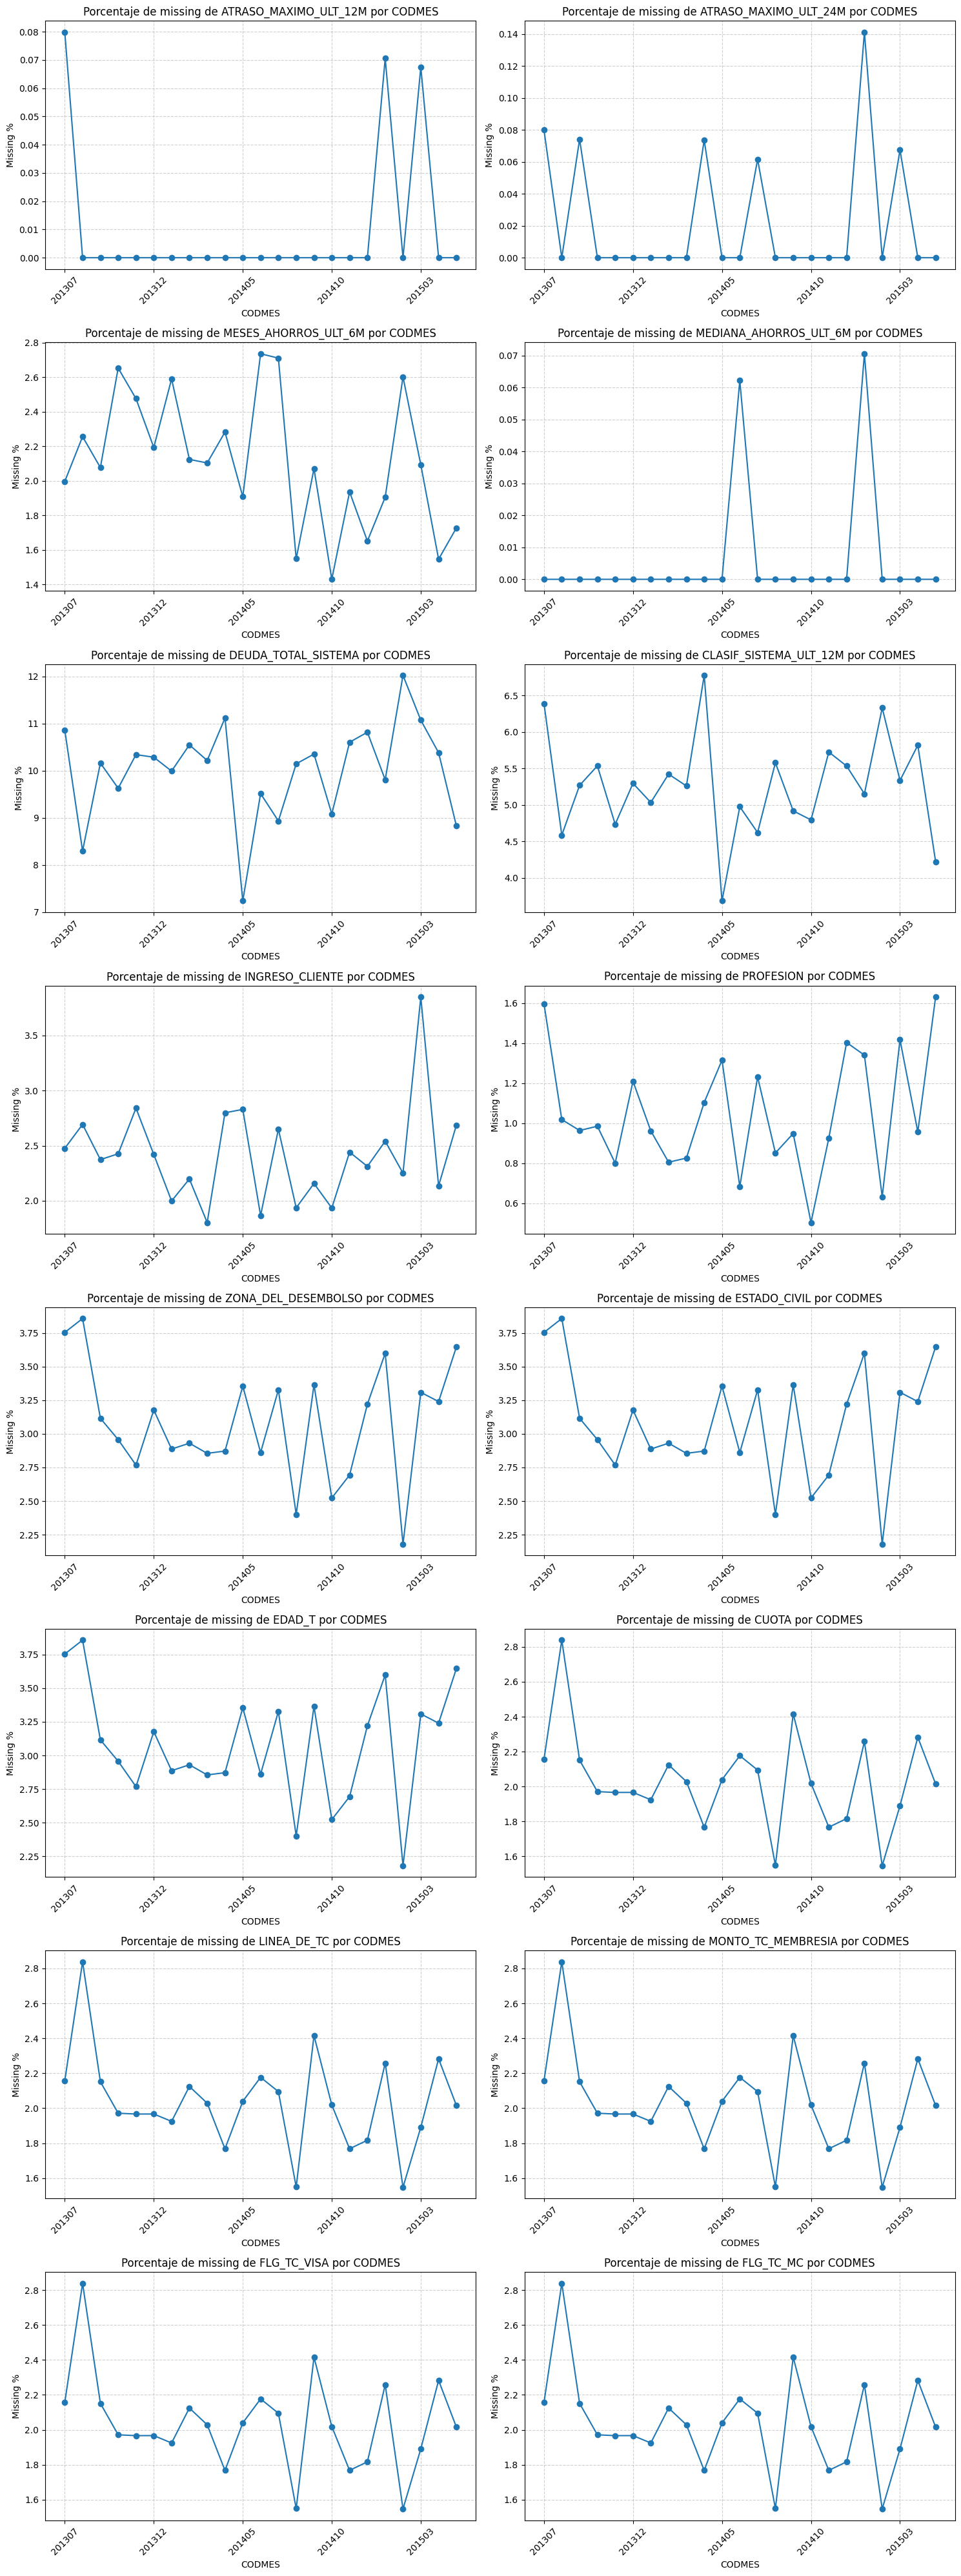

In [297]:
missing_cols = null_values[null_values['ratio_null_values'] > 0].index.tolist()
if not missing_cols:
    print("Sin variables para el gráfico")
else:
    print("Visualizar los porcentajes de valores perdidos por variable")
    missing_over_time = df_clase.groupby('CODMES')[missing_cols].apply(lambda x: x.isnull().sum() / len(x) * 100)
    n_cols = 2
    n_rows = (len(missing_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5), squeeze=False)
    axes = axes.flatten()

    for i, col in enumerate(missing_cols):
        ax = axes[i]
        missing_over_time[col].plot(ax=ax, marker='o', linestyle='-')
        ax.set_title(f'Porcentaje de missing de {col} por CODMES')
        ax.set_xlabel('CODMES')
        ax.set_ylabel('Missing %')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, linestyle='--', alpha=0.6)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [298]:
#var_num = X_train.select_dtypes(include = ["number"])
#var_cat = X_train.select_dtypes(exclude = ["number"])

##### **Declarar imputadores y probarlos**

In [299]:
num_cols_for_imputation=['ATRASO_MAXIMO_ULT_12M','ATRASO_MAXIMO_ULT_24M',
                          'MESES_AHORROS_ULT_6M','MEDIANA_AHORROS_ULT_6M',
                          'DEUDA_TOTAL_SISTEMA','INGRESO_CLIENTE','EDAD_T',
                          'CUOTA','LINEA_DE_TC','MONTO_TC_MEMBRESIA']

In [300]:
num_cols_for_imputation_no_arb=['INGRESO_CLIENTE','EDAD_T','LINEA_DE_TC']

In [301]:
num_cols_for_imputation_arb=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M',
                             'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M',
                             'ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']

In [302]:
cat_cols_for_imputation=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','FLG_TC_VISA',
                         'FLG_TC_MC','CLASIF_SISTEMA_ULT_12M']

In [303]:
imputer_num_1 = ColumnTransformer(
    transformers=[
        ('num_imputer', SimpleImputer(strategy='median'), num_cols_for_imputation)
    ],
    remainder='drop',
    verbose_feature_names_out=False
).set_output(transform="pandas")

In [304]:
imputer_num_2 = ColumnTransformer(
    transformers=[
        ('num_knn_imputer', KNNImputer(n_neighbors=5), num_cols_for_imputation)
    ],
    remainder='drop',
    verbose_feature_names_out=False
).set_output(transform="pandas")

In [305]:
imputer_num_3 = ColumnTransformer(
    transformers=[
        ('num_imputer_no_arb', SimpleImputer(strategy='median'), num_cols_for_imputation_no_arb),
        ('num_imputer_arb', SimpleImputer(strategy='constant',fill_value=0), num_cols_for_imputation_arb)
    ],
    remainder='drop',
    verbose_feature_names_out=False
).set_output(transform="pandas")

In [306]:
#imputer_num_4 = IterativeImputer(
#    estimator=RandomForestRegressor(random_state=42),
#    max_iter=10,
#    random_state=42,
#    n_nearest_features=5
#)
#imputer_num_4.fit(X_train[num_cols_for_imputation])
#X_train_imputed_num_4= imputer_num_4.transform(X_train[num_cols_for_imputation])
#X_test_imputed_num_4 = imputer_num_4.transform(X_test[num_cols_for_imputation])

In [307]:
imputer_cat = ColumnTransformer(
    transformers=[
        ('cat_mode_imputer', SimpleImputer(strategy='most_frequent'), cat_cols_for_imputation)
    ],
    remainder='drop',
    verbose_feature_names_out=False
).set_output(transform="pandas")

In [308]:
#imputer_cat_2 = Pipeline([
#    ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
#    ('cat_imputer_rf', IterativeImputer(
#        estimator=RandomForestClassifier(random_state=42),
#        max_iter=10,
#        random_state=42,
#        add_indicator=False
#    ))
#]).set_output(transform="pandas")

In [309]:
#from sklearn.base import BaseEstimator, TransformerMixin
# Define a custom transformer that wraps the OrdinalEncoder, IterativeImputer, and then inverse_transform
class CategoricalImputerWithDecoding(BaseEstimator, TransformerMixin):
    def __init__(self, random_state=42, max_iter=10, n_nearest_features=None):
        self.ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        self.imputer = IterativeImputer(
            estimator=RandomForestClassifier(random_state=random_state),
            max_iter=max_iter,
            random_state=random_state,
            add_indicator=False
          )
        self.columns_ = None

    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        self.columns_ = X.columns.tolist()
        X_encoded = self.ordinal_encoder.fit_transform(X)
        self.imputer.fit(X_encoded)
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.columns_)
        X_encoded = self.ordinal_encoder.transform(X)
        X_imputed_encoded = self.imputer.transform(X_encoded)
        X_imputed_decoded = self.ordinal_encoder.inverse_transform(X_imputed_encoded)
        return pd.DataFrame(X_imputed_decoded, columns=self.columns_, index=X.index)

imputer_cat_2 = CategoricalImputerWithDecoding(random_state=42, max_iter=10)

In [310]:
imputer_num_1.fit(X_train)
X_train_imputed_num_1=imputer_num_1.transform(X_train)
X_test_imputed_num_1=imputer_num_1.transform(X_test)

In [311]:
imputer_num_1_values = imputer_num_1.named_transformers_['num_imputer'].statistics_
imputer_num_1_cols = imputer_num_1.named_transformers_['num_imputer'].get_feature_names_out(num_cols_for_imputation)
imputer_num_1_df = pd.DataFrame({'Variable': imputer_num_1_cols, 'Imputed Value': imputer_num_1_values})
print("Valores del Imputador 1:")
display(imputer_num_1_df)

Valores del Imputador 1:


Variable  Imputed Value
0   ATRASO_MAXIMO_ULT_12M       0.000000
1   ATRASO_MAXIMO_ULT_24M       0.000000
2    MESES_AHORROS_ULT_6M       6.000000
3  MEDIANA_AHORROS_ULT_6M    4363.024166
4     DEUDA_TOTAL_SISTEMA    6793.220000
5         INGRESO_CLIENTE    2271.177355
6                  EDAD_T      35.000000
7                   CUOTA     235.118688
8             LINEA_DE_TC    9609.000000
9      MONTO_TC_MEMBRESIA     100.000000

In [312]:
imputer_num_2.fit(X_train)
X_train_imputed_num_2=imputer_num_2.transform(X_train)
X_test_imputed_num_2=imputer_num_2.transform(X_test)

In [313]:
rows_with_missing_num = X_train[X_train[num_cols_for_imputation].isnull().any(axis=1)]

if not rows_with_missing_num.empty:

    sample_size = min(5, len(rows_with_missing_num))
    sample_rows_original = rows_with_missing_num.sample(sample_size, random_state=42)
    sample_rows_original_display = sample_rows_original[num_cols_for_imputation]

    imputer_num_2.fit(X_train)
    sample_rows_imputed_num = imputer_num_2.transform(sample_rows_original)

    print("\nOriginal Sample Rows with Missing Numerical Values:")
    display(sample_rows_original_display)

    #print("\nImputed Sample Rows (Numerical Columns by KNN):")
    #passthrough_cols = [col for col in X_train.columns if col not in num_cols_for_imputation]
    #sample_rows_imputed_full = pd.concat([
    #    sample_rows_imputed_num.set_index(sample_rows_original.index),
    #    sample_rows_original[passthrough_cols]
    #], axis=1).loc[sample_rows_original.index]
    #display(sample_rows_imputed_full[num_cols_for_imputation])

    print("\nHighlighted Changes (Original vs. KNN Imputed - Numerical columns only):")
    def highlight_diff(data, data_original):
        attr = 'background-color: yellow'
        temp_data = data.copy()

        for col in num_cols_for_imputation:

            is_nan_in_original = data_original[col].isna()
            is_different = (data[col] != data_original[col])

            temp_data[col] = np.where(is_nan_in_original & is_different, attr, '')
        return pd.DataFrame(temp_data, index=data.index, columns=data.columns)

    display(sample_rows_imputed_num[num_cols_for_imputation].style.apply(lambda x: highlight_diff(x, sample_rows_original_display), axis=None))

else:
    print("No rows with missing numerical values found in the training data for demonstration.")


Original Sample Rows with Missing Numerical Values:


ATRASO_MAXIMO_ULT_12M  ATRASO_MAXIMO_ULT_24M  MESES_AHORROS_ULT_6M  \
29738                    0.0                    0.0                   6.0   
17062                    0.0                    0.0                   6.0   
19529                    0.0                    0.0                   4.0   
27305                    0.0                    0.0                   6.0   
11700                    0.0                    0.0                   NaN   

       MEDIANA_AHORROS_ULT_6M  DEUDA_TOTAL_SISTEMA  INGRESO_CLIENTE  EDAD_T  \
29738            12736.976670             11450.24              NaN     NaN   
17062             7526.641667                  NaN      1736.439695    25.0   
19529             2439.883333              3002.42              NaN    21.0   
27305             4782.465000                  NaN      1539.065962    24.0   
11700             3296.183333                  NaN      1313.387657    40.0   

            CUOTA  LINEA_DE_TC  MONTO_TC_MEMBRESIA  
29738  482.507172       6000.0               170.0  
17062    0.000000      17186.0                60.0  
19529  127.017870       3600.0                60.0  
27305    0.000000       3900.0                60.0  
11700    0.000000      22095.0               152.0


Highlighted Changes (Original vs. KNN Imputed - Numerical columns only):


###### Es importante recordar que este método de imputación se basa en los vecinos más cercanos, y no arroja valores que luego puedan ser usados tal cual en una nueva base, sino que en una nueva base se deben recalcular

In [314]:
imputer_num_3.fit(X_train)
X_train_imputed_num_3=imputer_num_3.transform(X_train)
X_test_imputed_num_3=imputer_num_3.transform(X_test)

In [315]:
imputer_no_arb = imputer_num_3.named_transformers_['num_imputer_no_arb']
values_no_arb = imputer_no_arb.statistics_
cols_no_arb = imputer_no_arb.get_feature_names_out(num_cols_for_imputation_no_arb)
df_no_arb = pd.DataFrame({
    'Variable': cols_no_arb,
    'Imputed Value': values_no_arb,
    'Strategy': 'Median'
})
imputer_arb = imputer_num_3.named_transformers_['num_imputer_arb']
values_arb = imputer_arb.statistics_
cols_arb = imputer_arb.get_feature_names_out(num_cols_for_imputation_arb)
df_arb = pd.DataFrame({
    'Variable': cols_arb,
    'Imputed Value': values_arb,
    'Strategy': 'Constant (0)'
})
imputer_num_3_df = pd.concat([df_no_arb, df_arb], ignore_index=True)
print("Valores de imputación para imputer_num_3:")
display(imputer_num_3_df)

Valores de imputación para imputer_num_3:


Variable  Imputed Value      Strategy
0         INGRESO_CLIENTE    2271.177355        Median
1                  EDAD_T      35.000000        Median
2             LINEA_DE_TC    9609.000000        Median
3                   CUOTA       0.000000  Constant (0)
4     DEUDA_TOTAL_SISTEMA       0.000000  Constant (0)
5  MEDIANA_AHORROS_ULT_6M       0.000000  Constant (0)
6    MESES_AHORROS_ULT_6M       0.000000  Constant (0)
7   ATRASO_MAXIMO_ULT_24M       0.000000  Constant (0)
8   ATRASO_MAXIMO_ULT_12M       0.000000  Constant (0)
9      MONTO_TC_MEMBRESIA       0.000000  Constant (0)

In [316]:
imputer_cat.fit(X_train)
X_train_imputed_cat=imputer_cat.transform(X_train)
X_test_imputed_cat=imputer_cat.transform(X_test)

In [317]:
imputer_cat_values = imputer_cat.named_transformers_['cat_mode_imputer'].statistics_
imputer_cat_cols = imputer_cat.named_transformers_['cat_mode_imputer'].get_feature_names_out(cat_cols_for_imputation)
imputer_cat_df = pd.DataFrame({'Variable': imputer_cat_cols, 'Imputed Value': imputer_cat_values})
print("Valores del Imputador Categoricas:")
display(imputer_cat_df)

Valores del Imputador Categoricas:


Variable Imputed Value
0               PROFESION       TECNICO
1     ZONA_DEL_DESEMBOLSO      AREQUIPA
2            ESTADO_CIVIL           SOL
3             FLG_TC_VISA           0.0
4               FLG_TC_MC           0.0
5  CLASIF_SISTEMA_ULT_12M           0.0

In [318]:
imputer_cat_2.fit(X_train[cat_cols_for_imputation])
X_train_imputed_cat_2=imputer_cat_2.transform(X_train[cat_cols_for_imputation])
X_test_imputed_cat_2=imputer_cat_2.transform(X_test[cat_cols_for_imputation])

In [319]:
#X_train_imputed_cat_2_encoded_df = imputer_cat_2.transform(X_train[cat_cols_for_imputation])
#X_train_imputed_cat_2 = pd.DataFrame(
#    imputer_cat_2.named_steps['ordinal_encoder'].inverse_transform(X_train_imputed_cat_2_encoded_df.values),
#    columns=cat_cols_for_imputation,
#    index=X_train.index)
#X_test_imputed_cat_2_encoded_df = imputer_cat_2.transform(X_test[cat_cols_for_imputation])
#X_test_imputed_cat_2 = pd.DataFrame(
#    imputer_cat_2.named_steps['ordinal_encoder'].inverse_transform(X_test_imputed_cat_2_encoded_df.values),
#    columns=cat_cols_for_imputation,
#    index=X_test.index)

In [320]:
print("\n--- Categories Learned by OrdinalEncoder (within imputer_cat_2) ---")
#ordinal_encoder = imputer_cat_2.ordinal_encoder
#for i, col in enumerate(cat_cols_for_imputation):
#    print(f"Variable '{col}':")
#    print(f"  Encoded values map to: {ordinal_encoder.categories_[i]}")
#
#print("\n--- Example of Imputed Categorical Values ---")
rows_with_missing_cat_indices = X_train[X_train[cat_cols_for_imputation].isnull().any(axis=1)].index

if not rows_with_missing_cat_indices.empty:
    sample_indices = rows_with_missing_cat_indices[:5]
    original_cat_sample = X_train.loc[sample_indices, cat_cols_for_imputation]
    original_X_train_indices = X_train.index.tolist()
    integer_positions = [original_X_train_indices.index(idx) for idx in sample_indices]
    df_imputed_display = X_train_imputed_cat_2.iloc[integer_positions].copy()
    df_imputed_display.index = sample_indices # Ensure index matches original for comparison

    print("Original values with NaNs (sample):")
    display(original_cat_sample)
    print("\nImputed categorical values (sample):")
    display(df_imputed_display)
else:
    print("No rows with missing categorical values found in the training data for demonstration.")


--- Categories Learned by OrdinalEncoder (within imputer_cat_2) ---
Original values with NaNs (sample):


PROFESION ZONA_DEL_DESEMBOLSO ESTADO_CIVIL FLG_TC_VISA  \
25767                NaN                 NaN          NaN         0.0   
1151           TOPOGRAFO                 NaN          NaN         NaN   
5300   OBRERO / OPERADOR                 ICA          CAS         0.0   
4086    ASISTENTE SOCIAL           LIMA_ESTE          SOL         1.0   
29454            ABOGADO           LIMA_ESTE          SOL         1.0   

      FLG_TC_MC CLASIF_SISTEMA_ULT_12M  
25767       0.0                    0.0  
1151        NaN                    0.0  
5300        0.0                    NaN  
4086        1.0                    NaN  
29454       1.0                    NaN


Imputed categorical values (sample):


PROFESION ZONA_DEL_DESEMBOLSO ESTADO_CIVIL FLG_TC_VISA  \
25767            TECNICO            AREQUIPA          SOL         0.0   
1151           TOPOGRAFO         LIMA_CENTRO          CAS         0.0   
5300   OBRERO / OPERADOR                 ICA          CAS         0.0   
4086    ASISTENTE SOCIAL           LIMA_ESTE          SOL         1.0   
29454            ABOGADO           LIMA_ESTE          SOL         1.0   

      FLG_TC_MC CLASIF_SISTEMA_ULT_12M  
25767       0.0                    0.0  
1151        0.0                    0.0  
5300        0.0                    0.0  
4086        1.0                    0.0  
29454       1.0                    1.0

In [321]:
#X_train_imputed.info()
#num_imputer_cols = [col for col in X_train_imputed.columns if col.startswith('num_imputer__')]
#num_imputer_knn_cols = [col for col in X_train_imputed.columns if col.startswith('num_knn_imputer')]
#X_train_imputed_num = X_train_imputed[num_imputer_cols]
#X_train_imputed_num.columns = X_train_imputed_num.columns.str.replace('num_imputer__', '')
#X_train_imputed_num_knn = X_train_imputed[num_imputer_knn_cols]
#X_train_imputed_num_knn.columns = X_train_imputed_num_knn.columns.str.replace('num_knn_imputer__', '')

##### **Qué podemos decir de las diferentes opciones de imputación?, cuál sería la más apropiada? cómom compararlas?**

In [322]:
from scipy.stats import kstest
import matplotlib.pyplot as plt
import seaborn as sns

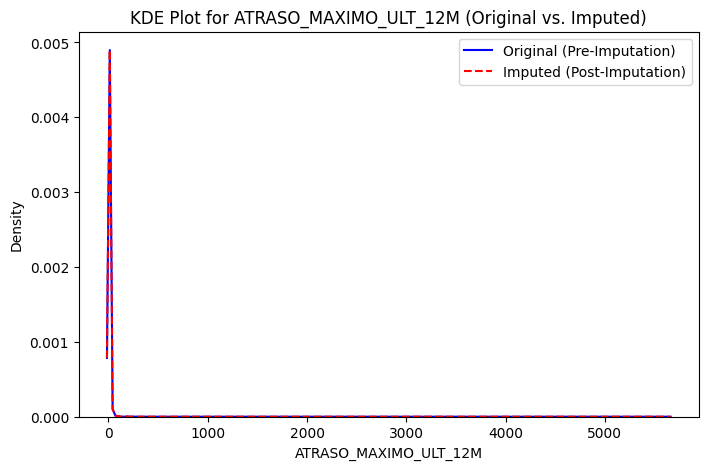

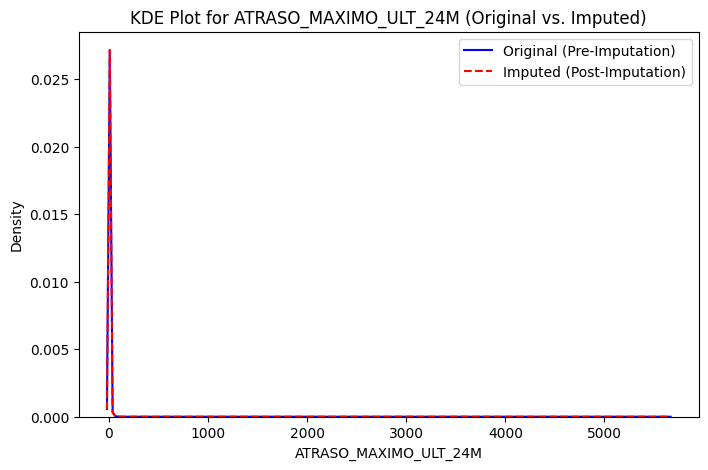

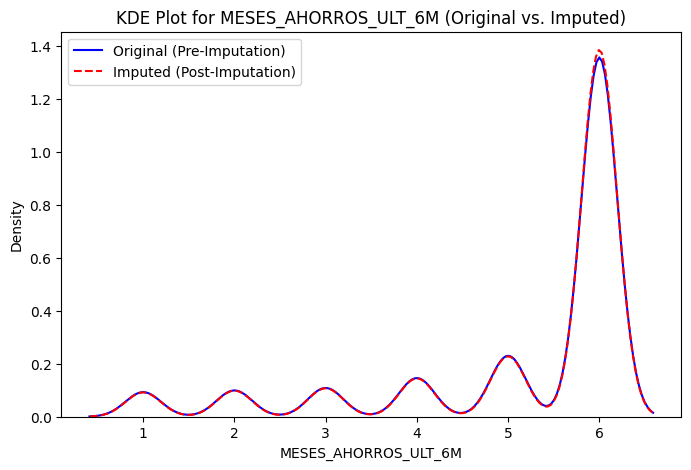

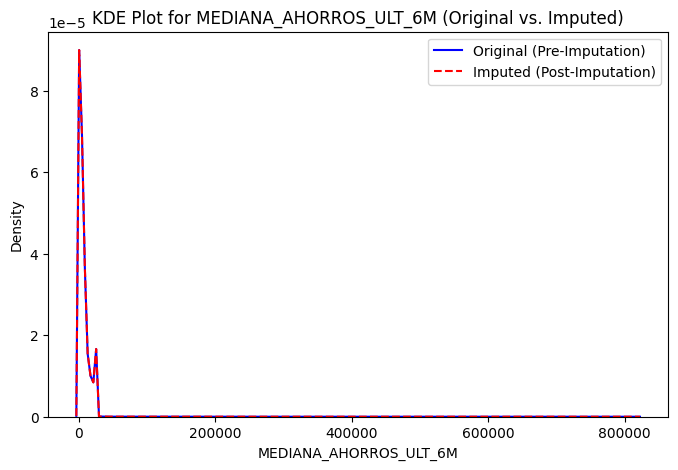

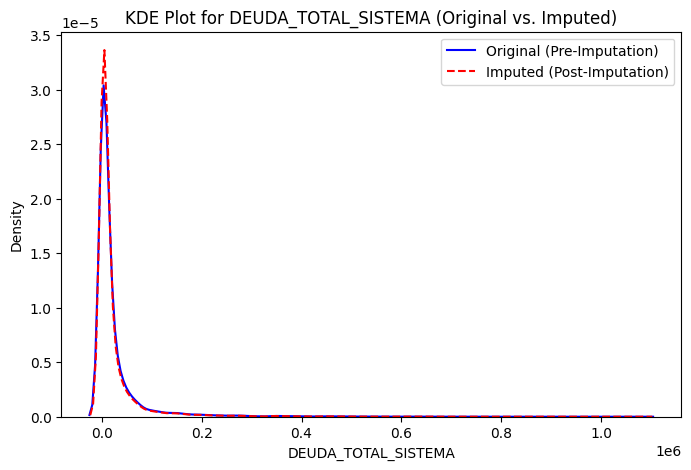

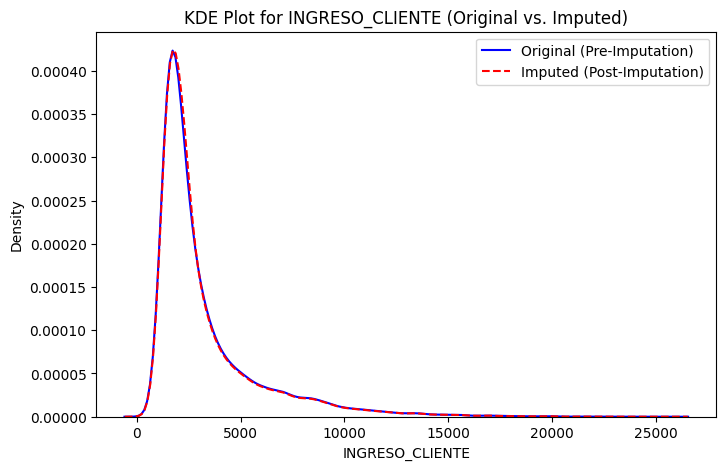

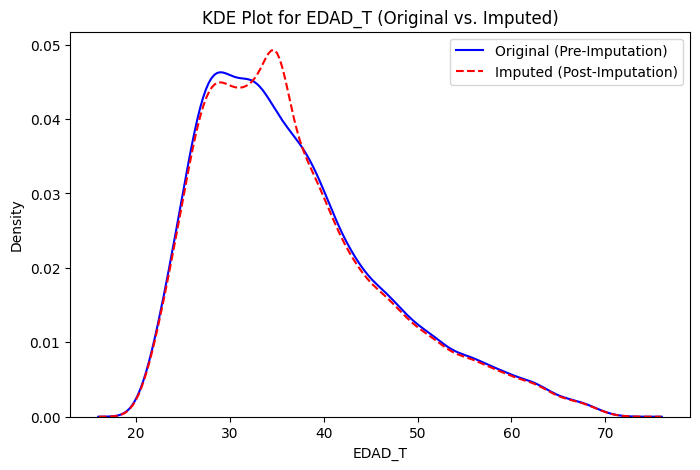

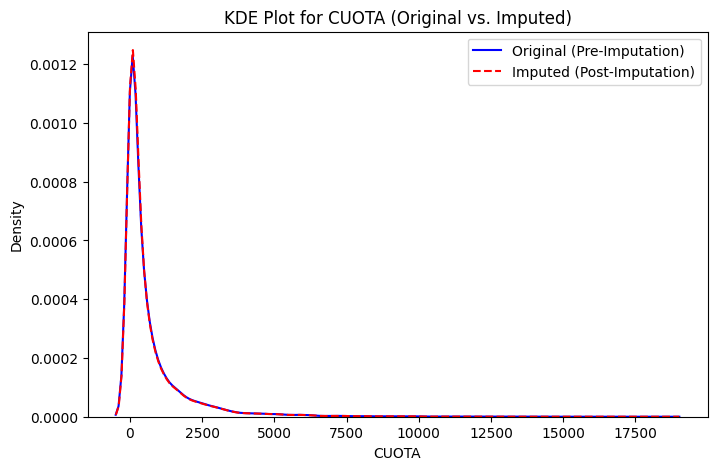

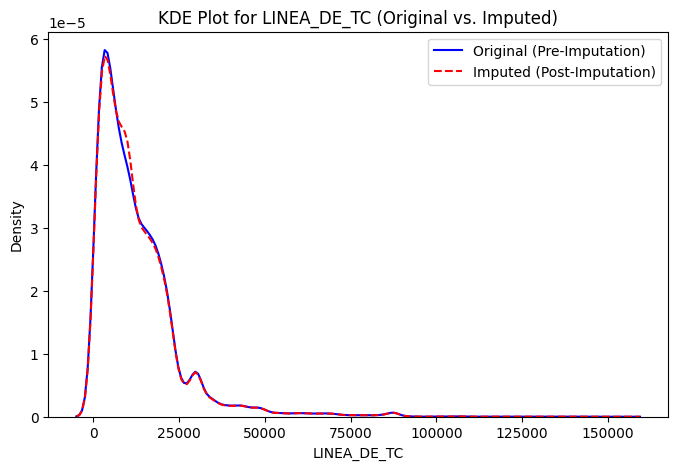

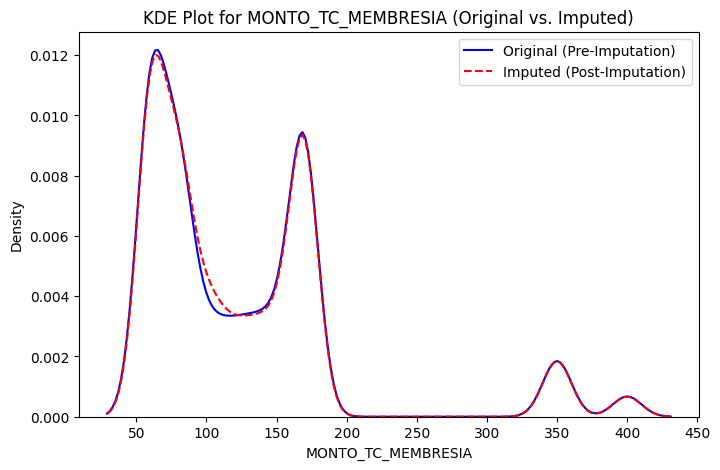

In [323]:
comparison_results_1 = []

for col in num_cols_for_imputation:
     original_dist = X_train[col].dropna()
     imputed_dist = X_train_imputed_num_1[col]

     if len(original_dist) > 1 and len(imputed_dist) > 1:

         ks_statistic, p_value = kstest(original_dist, imputed_dist)

         comparison_results_1.append({
             'Variable': col,
             'KS Statistic': ks_statistic,
             'P-value': p_value,
             'Interpretation': 'Distributions are significantly different (p < 0.05)' if p_value < 0.05 else 'Distributions are not significantly different (p >= 0.05)'
         })

         plt.figure(figsize=(8, 5))
         sns.kdeplot(original_dist, label='Original (Pre-Imputation)', color='blue')
         sns.kdeplot(imputed_dist, label='Imputed (Post-Imputation)', color='red', linestyle='--')
         plt.title(f'KDE Plot for {col} (Original vs. Imputed)')
         plt.xlabel(col)
         plt.ylabel('Density')
         plt.legend()
         plt.show()
     else:
         comparison_results_1.append({
             'Variable': col,
             'KS Statistic': 'N/A',
             'P-value': 'N/A',
             'Interpretation': 'Not enough data for comparison'
         })


In [324]:
comparison_df_1 = pd.DataFrame(comparison_results_1)
print("\n--- Resumen (KS Test) ---")
display(comparison_df_1)


--- Resumen (KS Test) ---


Variable  KS Statistic       P-value  \
0   ATRASO_MAXIMO_ULT_12M      0.000006  1.000000e+00   
1   ATRASO_MAXIMO_ULT_24M      0.000037  1.000000e+00   
2    MESES_AHORROS_ULT_6M      0.006684  7.033917e-01   
3  MEDIANA_AHORROS_ULT_6M      0.000045  1.000000e+00   
4     DEUDA_TOTAL_SISTEMA      0.050065  1.646728e-23   
5         INGRESO_CLIENTE      0.012120  7.736162e-02   
6                  EDAD_T      0.014775  1.619584e-02   
7                   CUOTA      0.010040  2.131378e-01   
8             LINEA_DE_TC      0.010040  2.131378e-01   
9      MONTO_TC_MEMBRESIA      0.010029  2.141793e-01   

                                      Interpretation  
0  Distributions are not significantly different ...  
1  Distributions are not significantly different ...  
2  Distributions are not significantly different ...  
3  Distributions are not significantly different ...  
4  Distributions are significantly different (p <...  
5  Distributions are not significantly different ...  
6  Distributions are significantly different (p <...  
7  Distributions are not significantly different ...  
8  Distributions are not significantly different ...  
9  Distributions are not significantly different ...

###### Con el primer imputador de todas las variables numéricas, no se sesgan la mayoria de las variables, siendo solo DEUDA_TOTAL_SISTEMA y EDAD_T las que tienen sesgo

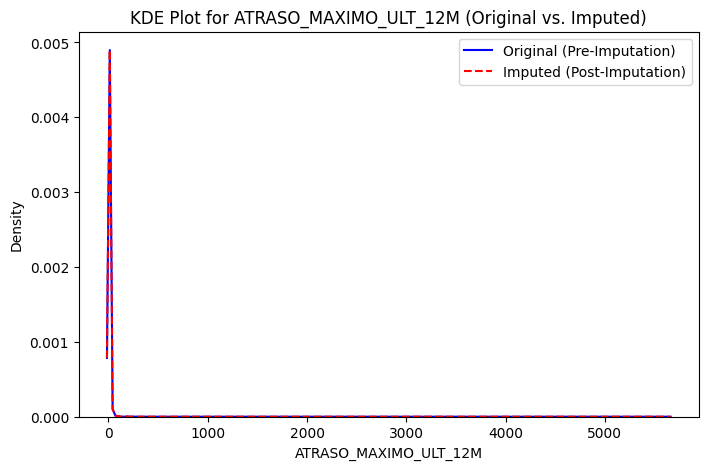

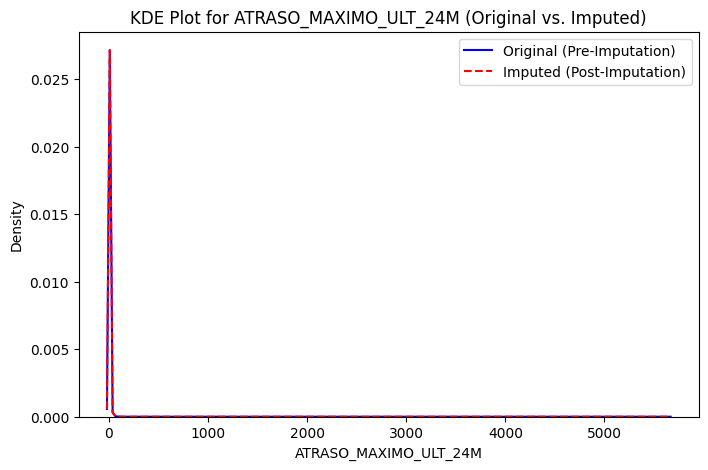

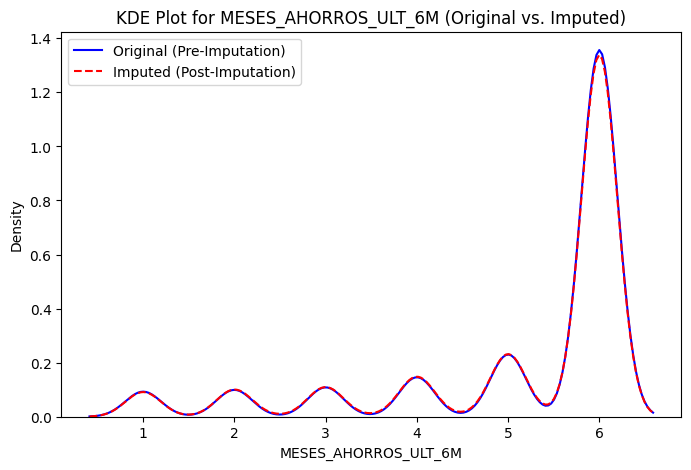

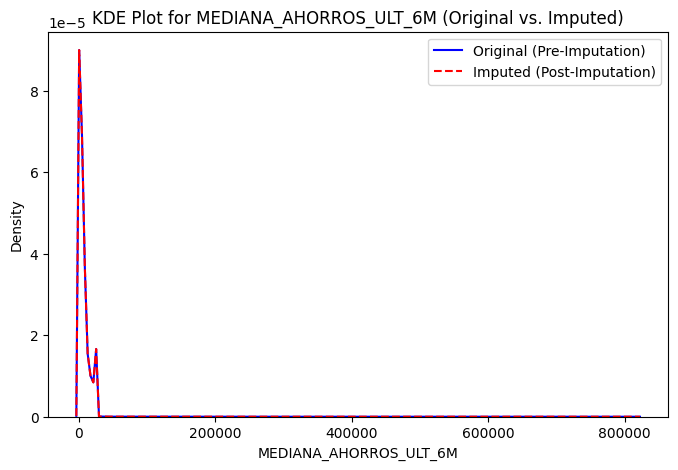

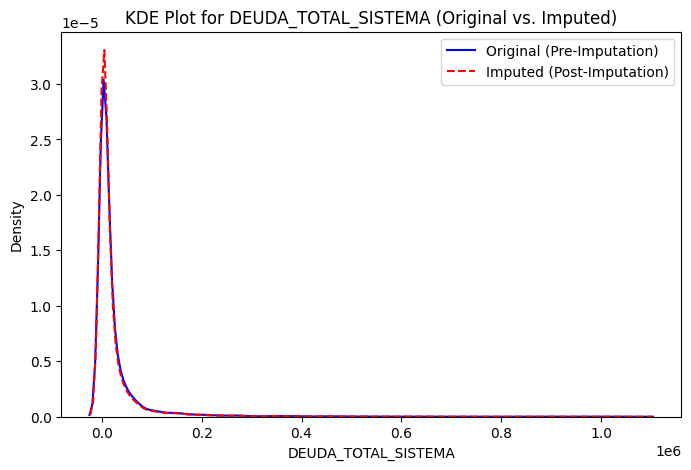

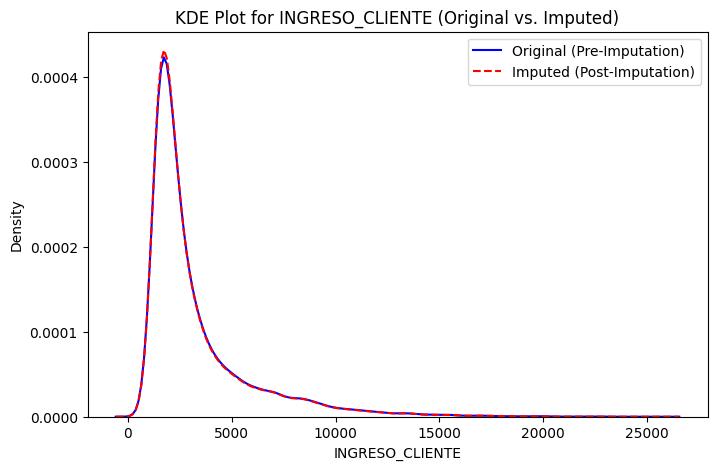

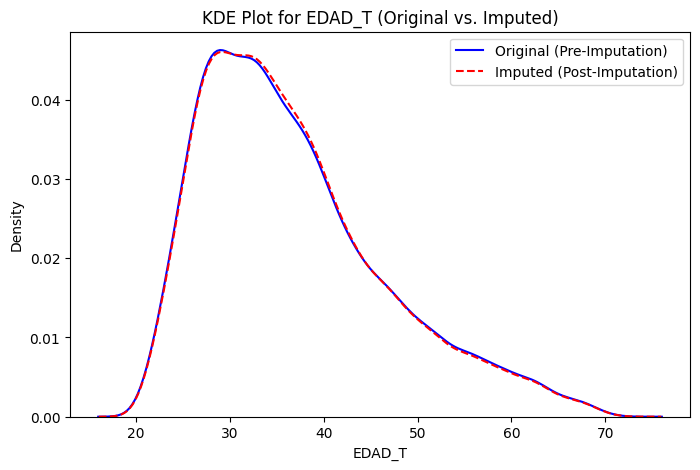

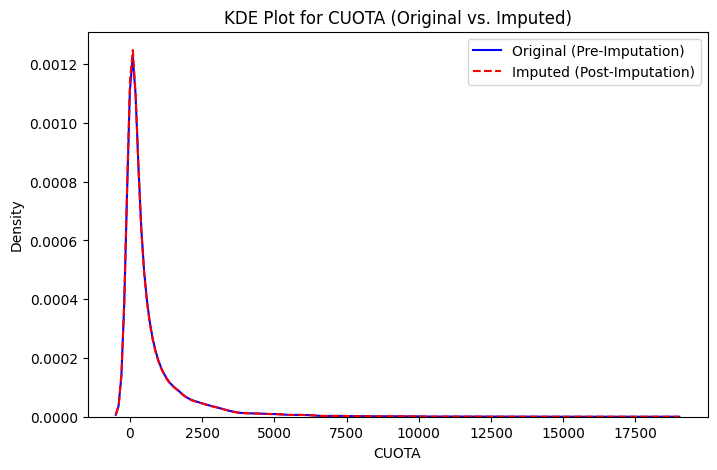

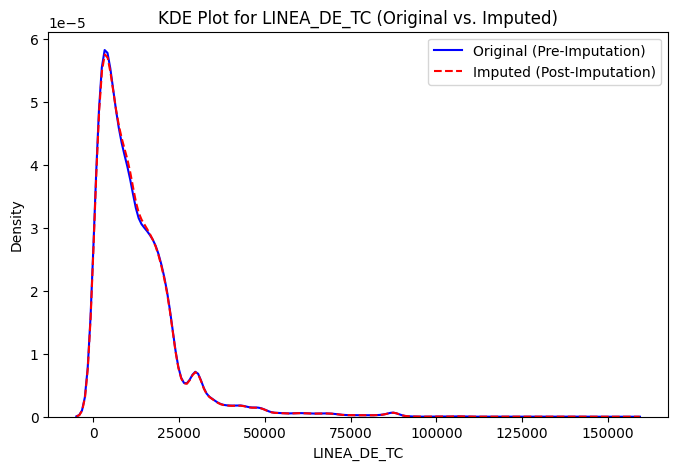

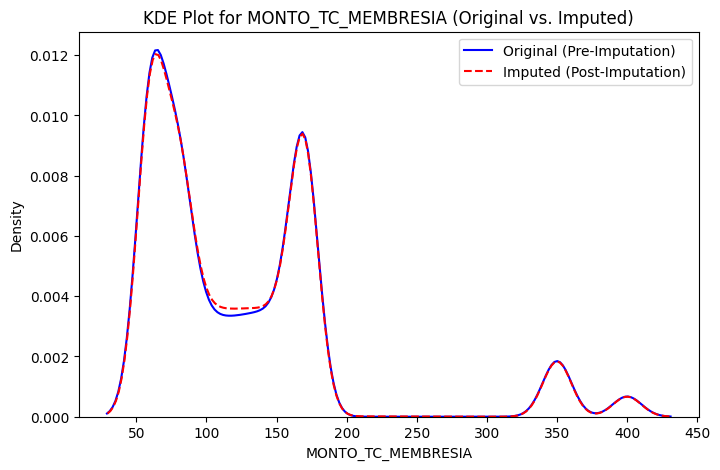

In [325]:
comparison_results_2 = []

for col in num_cols_for_imputation:
     original_dist = X_train[col].dropna()
     imputed_dist = X_train_imputed_num_2[col]

     if len(original_dist) > 1 and len(imputed_dist) > 1:

         ks_statistic, p_value = kstest(original_dist, imputed_dist)

         comparison_results_2.append({
             'Variable': col,
             'KS Statistic': ks_statistic,
             'P-value': p_value,
             'Interpretation': 'Distributions are significantly different (p < 0.05)' if p_value < 0.05 else 'Distributions are not significantly different (p >= 0.05)'
         })

         plt.figure(figsize=(8, 5))
         sns.kdeplot(original_dist, label='Original (Pre-Imputation)', color='blue')
         sns.kdeplot(imputed_dist, label='Imputed (Post-Imputation)', color='red', linestyle='--')
         plt.title(f'KDE Plot for {col} (Original vs. Imputed)')
         plt.xlabel(col)
         plt.ylabel('Density')
         plt.legend()
         plt.show()
     else:
         comparison_results_2.append({
             'Variable': col,
             'KS Statistic': 'N/A',
             'P-value': 'N/A',
             'Interpretation': 'Not enough data for comparison'
         })


In [326]:
comparison_df_2 = pd.DataFrame(comparison_results_2)
print("\n--- Resumen (KS Test) ---")
display(comparison_df_2)


--- Resumen (KS Test) ---


Variable  KS Statistic       P-value  \
0   ATRASO_MAXIMO_ULT_12M      0.000006  1.000000e+00   
1   ATRASO_MAXIMO_ULT_24M      0.000097  1.000000e+00   
2    MESES_AHORROS_ULT_6M      0.011071  1.316599e-01   
3  MEDIANA_AHORROS_ULT_6M      0.000044  1.000000e+00   
4     DEUDA_TOTAL_SISTEMA      0.032135  6.164734e-10   
5         INGRESO_CLIENTE      0.006734  6.957528e-01   
6                  EDAD_T      0.004375  9.837702e-01   
7                   CUOTA      0.008885  3.445809e-01   
8             LINEA_DE_TC      0.005788  8.500947e-01   
9      MONTO_TC_MEMBRESIA      0.007827  5.040105e-01   

                                      Interpretation  
0  Distributions are not significantly different ...  
1  Distributions are not significantly different ...  
2  Distributions are not significantly different ...  
3  Distributions are not significantly different ...  
4  Distributions are significantly different (p <...  
5  Distributions are not significantly different ...  
6  Distributions are not significantly different ...  
7  Distributions are not significantly different ...  
8  Distributions are not significantly different ...  
9  Distributions are not significantly different ...

###### Con el segundo imputador de todas las variables numéricas, no se sesgan la mayoria de las variables, siendo solo DEUDA_TOTAL_SISTEMA la que tienen sesgo

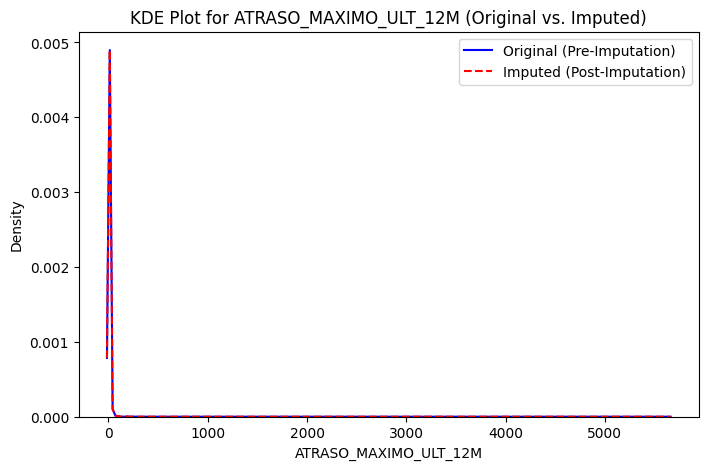

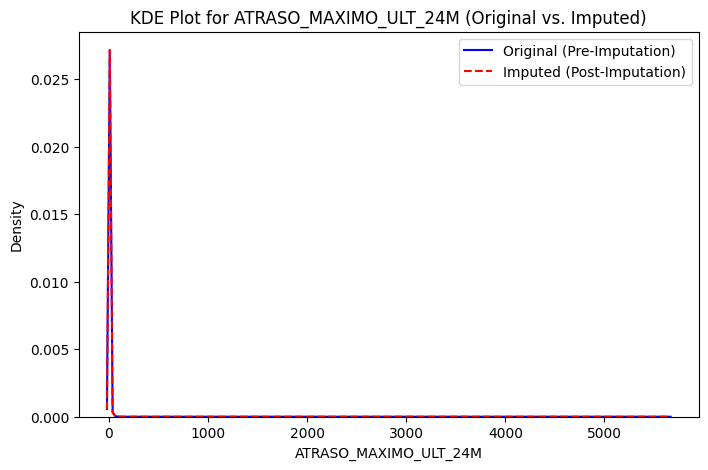

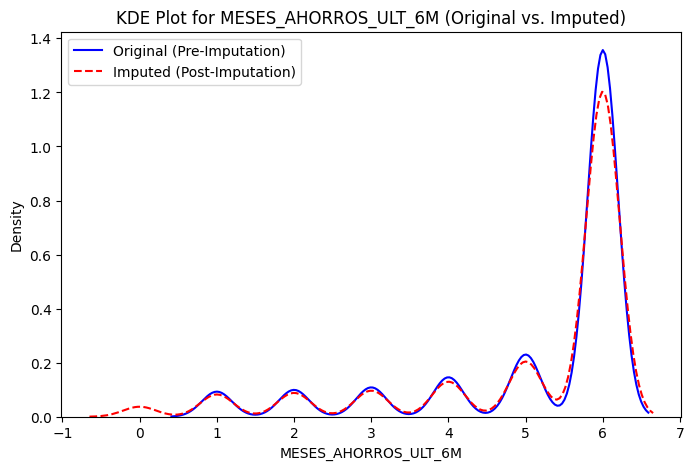

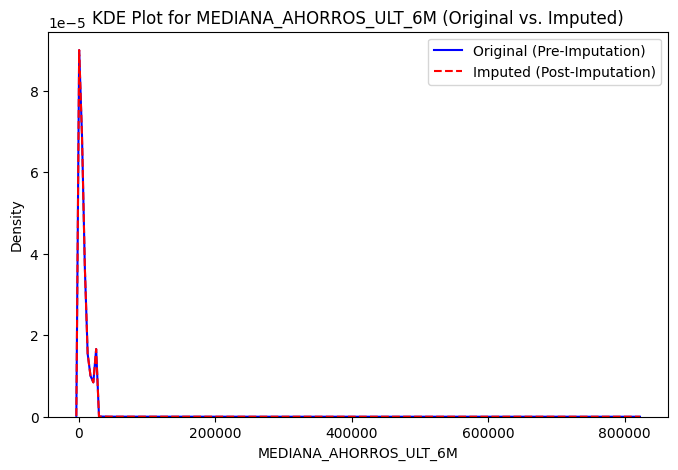

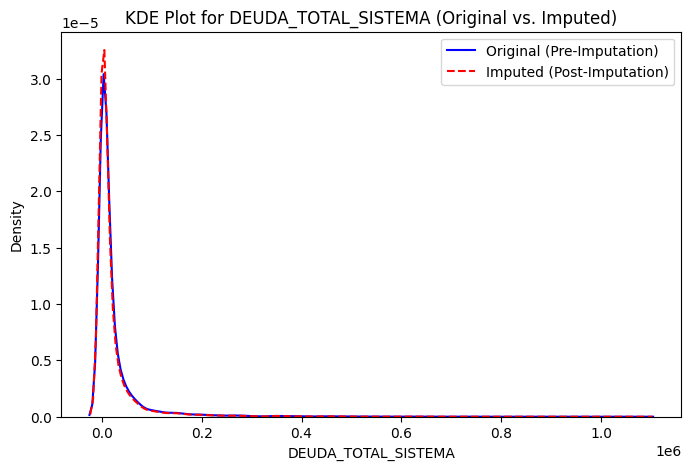

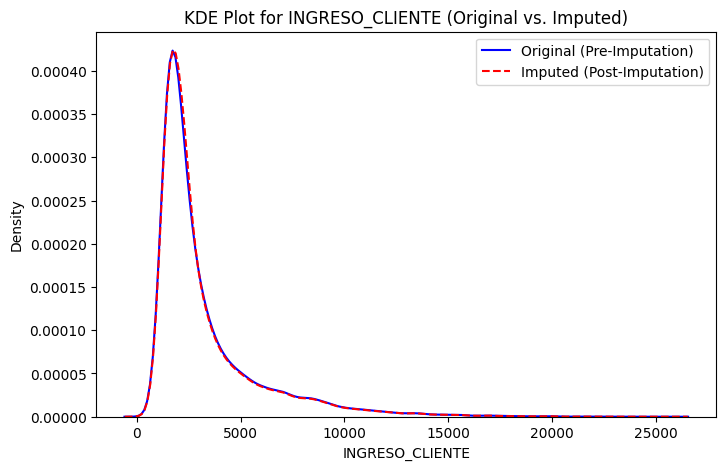

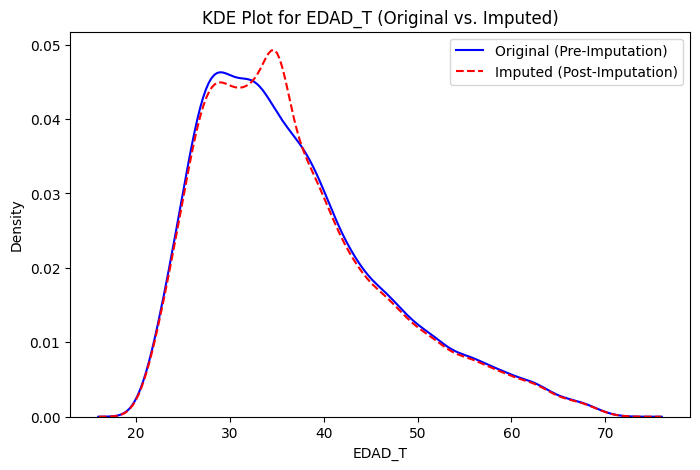

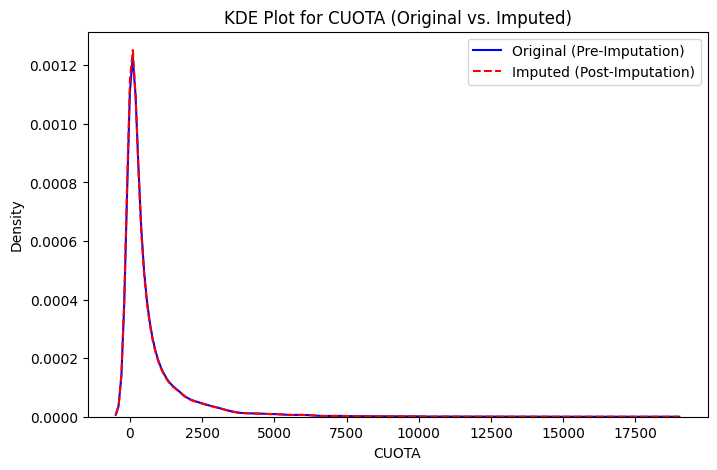

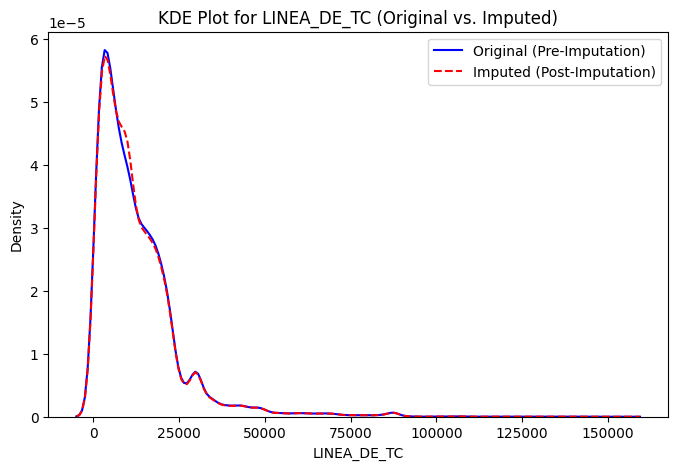

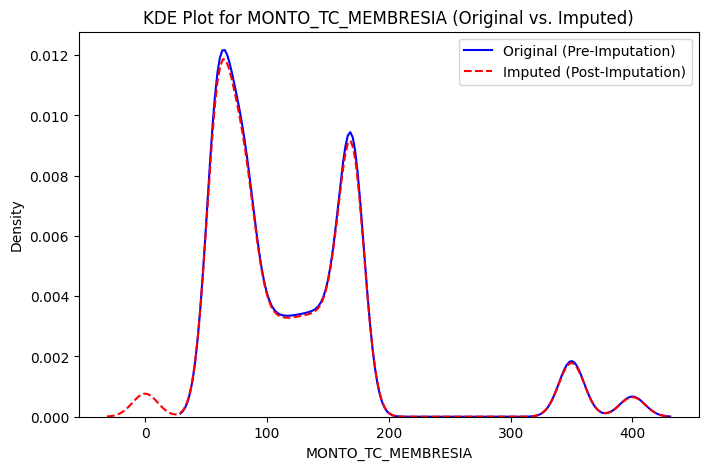

In [327]:
comparison_results_3 = []

for col in num_cols_for_imputation:
     original_dist = X_train[col].dropna()
     imputed_dist = X_train_imputed_num_3[col]

     if len(original_dist) > 1 and len(imputed_dist) > 1:

         ks_statistic, p_value = kstest(original_dist, imputed_dist)

         comparison_results_3.append({
             'Variable': col,
             'KS Statistic': ks_statistic,
             'P-value': p_value,
             'Interpretation': 'Distributions are significantly different (p < 0.05)' if p_value < 0.05 else 'Distributions are not significantly different (p >= 0.05)'
         })

         plt.figure(figsize=(8, 5))
         sns.kdeplot(original_dist, label='Original (Pre-Imputation)', color='blue')
         sns.kdeplot(imputed_dist, label='Imputed (Post-Imputation)', color='red', linestyle='--')
         plt.title(f'KDE Plot for {col} (Original vs. Imputed)')
         plt.xlabel(col)
         plt.ylabel('Density')
         plt.legend()
         plt.show()
     else:
         comparison_results_3.append({
             'Variable': col,
             'KS Statistic': 'N/A',
             'P-value': 'N/A',
             'Interpretation': 'Not enough data for comparison'
         })


In [328]:
comparison_df_3 = pd.DataFrame(comparison_results_3)
print("\n--- Resumen (KS Test) ---")
display(comparison_df_3)


--- Resumen (KS Test) ---


Variable  KS Statistic       P-value  \
0   ATRASO_MAXIMO_ULT_12M      0.000006  1.000000e+00   
1   ATRASO_MAXIMO_ULT_24M      0.000037  1.000000e+00   
2    MESES_AHORROS_ULT_6M      0.020081  2.623377e-04   
3  MEDIANA_AHORROS_ULT_6M      0.000089  1.000000e+00   
4     DEUDA_TOTAL_SISTEMA      0.090126  2.618728e-75   
5         INGRESO_CLIENTE      0.012120  7.736162e-02   
6                  EDAD_T      0.014775  1.619584e-02   
7                   CUOTA      0.018037  1.473634e-03   
8             LINEA_DE_TC      0.010040  2.131378e-01   
9      MONTO_TC_MEMBRESIA      0.020081  2.623377e-04   

                                      Interpretation  
0  Distributions are not significantly different ...  
1  Distributions are not significantly different ...  
2  Distributions are significantly different (p <...  
3  Distributions are not significantly different ...  
4  Distributions are significantly different (p <...  
5  Distributions are not significantly different ...  
6  Distributions are significantly different (p <...  
7  Distributions are significantly different (p <...  
8  Distributions are not significantly different ...  
9  Distributions are significantly different (p <...

###### Con el tercer imputador de todas las variables numéricas, no se sesgan la mayoria de las variables, aunque mas que las anteriores imputadores, ya que  las variables MESES_AHORROS_ULT_6M, DEUDA_TOTAL_SISTEMA, EDAD_T, CUOTA, MONTO_TC_MEMBRESIA las que tienen sesgo

In [329]:
comparison_df_1_renamed = comparison_df_1[['Variable', 'Interpretation']].rename(columns={'Interpretation': 'Interpretation_Imputer_1'})
comparison_df_2_renamed = comparison_df_2[['Variable', 'Interpretation']].rename(columns={'Interpretation': 'Interpretation_Imputer_2'})
comparison_df_3_renamed = comparison_df_3[['Variable', 'Interpretation']].rename(columns={'Interpretation': 'Interpretation_Imputer_3'})
combined_interpretations = pd.merge(comparison_df_1_renamed, comparison_df_2_renamed, on='Variable', how='outer')
combined_interpretations = pd.merge(combined_interpretations, comparison_df_3_renamed, on='Variable', how='outer')
print("Tabla combinada de interpretaciones:")
display(combined_interpretations)

Tabla combinada de interpretaciones:


Variable                           Interpretation_Imputer_1  \
0   ATRASO_MAXIMO_ULT_12M  Distributions are not significantly different ...   
1   ATRASO_MAXIMO_ULT_24M  Distributions are not significantly different ...   
2                   CUOTA  Distributions are not significantly different ...   
3     DEUDA_TOTAL_SISTEMA  Distributions are significantly different (p <...   
4                  EDAD_T  Distributions are significantly different (p <...   
5         INGRESO_CLIENTE  Distributions are not significantly different ...   
6             LINEA_DE_TC  Distributions are not significantly different ...   
7  MEDIANA_AHORROS_ULT_6M  Distributions are not significantly different ...   
8    MESES_AHORROS_ULT_6M  Distributions are not significantly different ...   
9      MONTO_TC_MEMBRESIA  Distributions are not significantly different ...   

                            Interpretation_Imputer_2  \
0  Distributions are not significantly different ...   
1  Distributions are not significantly different ...   
2  Distributions are not significantly different ...   
3  Distributions are significantly different (p <...   
4  Distributions are not significantly different ...   
5  Distributions are not significantly different ...   
6  Distributions are not significantly different ...   
7  Distributions are not significantly different ...   
8  Distributions are not significantly different ...   
9  Distributions are not significantly different ...   

                            Interpretation_Imputer_3  
0  Distributions are not significantly different ...  
1  Distributions are not significantly different ...  
2  Distributions are significantly different (p <...  
3  Distributions are significantly different (p <...  
4  Distributions are significantly different (p <...  
5  Distributions are not significantly different ...  
6  Distributions are not significantly different ...  
7  Distributions are not significantly different ...  
8  Distributions are significantly different (p <...  
9  Distributions are significantly different (p <...

###### Con ello podemos decidir mantenernos con una imputación simple como es la mediana para todas las variables, excepto en EDAD_T, donde podemos optar por un KNN. La variable DEUDA_TOTAL_SISTEMA es la que se mantiene con problemas, además de ser la variable con mayor porcentaje de valores perdidos (cercano al 10%). Optaremos por usar el método multivariado para esta variable

In [330]:
original_categorical_data = X_train[cat_cols_for_imputation].copy()
processed_categorical_data = X_train_imputed_cat.copy()
comparison_results_cat = []


--- Comparando 'PROFESION' ---
  Chi-squared Statistic: 2.2138
  P-value: 1.0000
  Interpretation: Distributions are not significantly different (p >= 0.05)


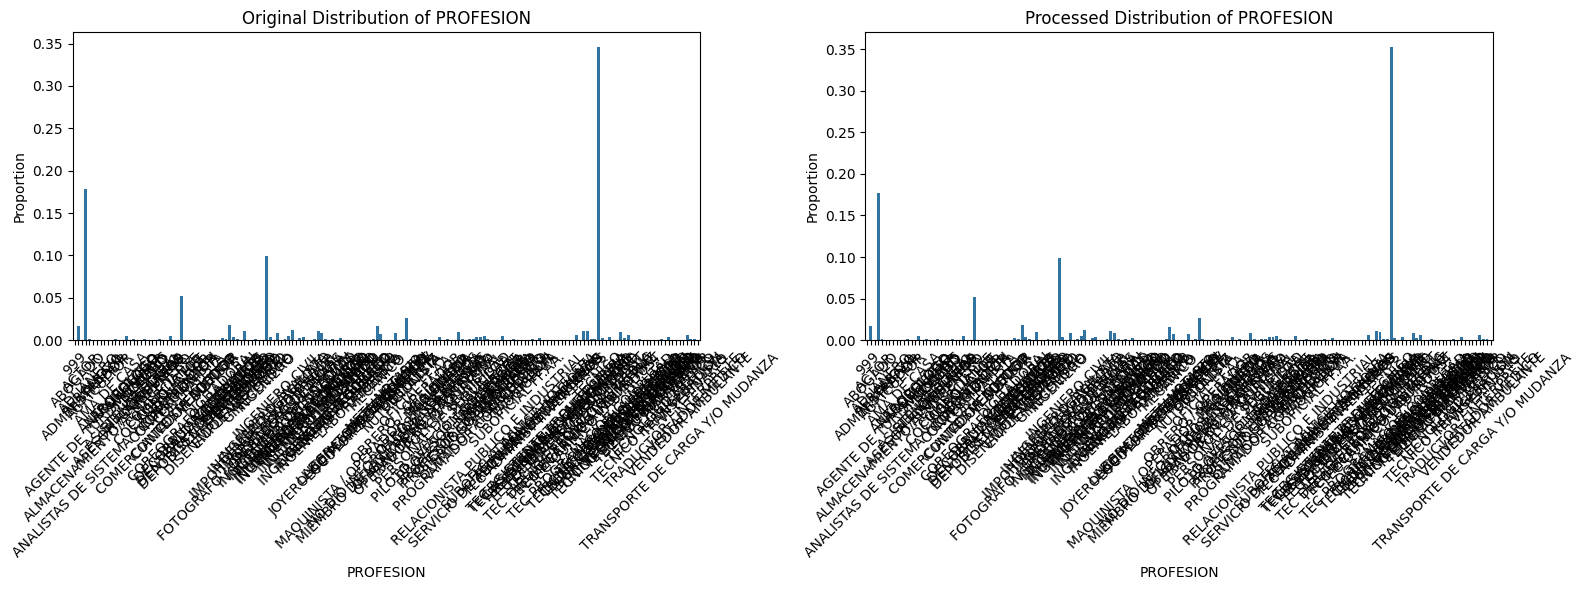


--- Comparando 'ZONA_DEL_DESEMBOLSO' ---
  Chi-squared Statistic: 68.8054
  P-value: 0.0000
  Interpretation: Distributions are significantly different (p < 0.05)


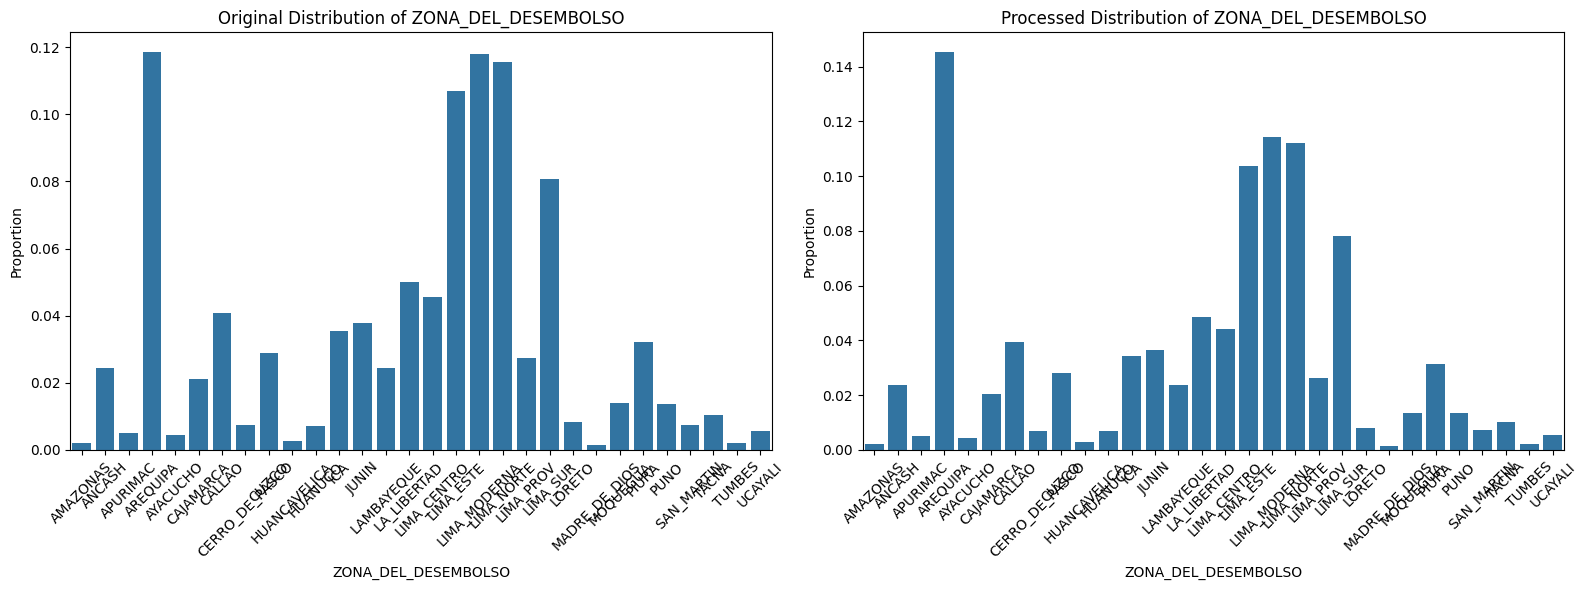


--- Comparando 'ESTADO_CIVIL' ---
  Chi-squared Statistic: 4.7030
  P-value: 0.4532
  Interpretation: Distributions are not significantly different (p >= 0.05)


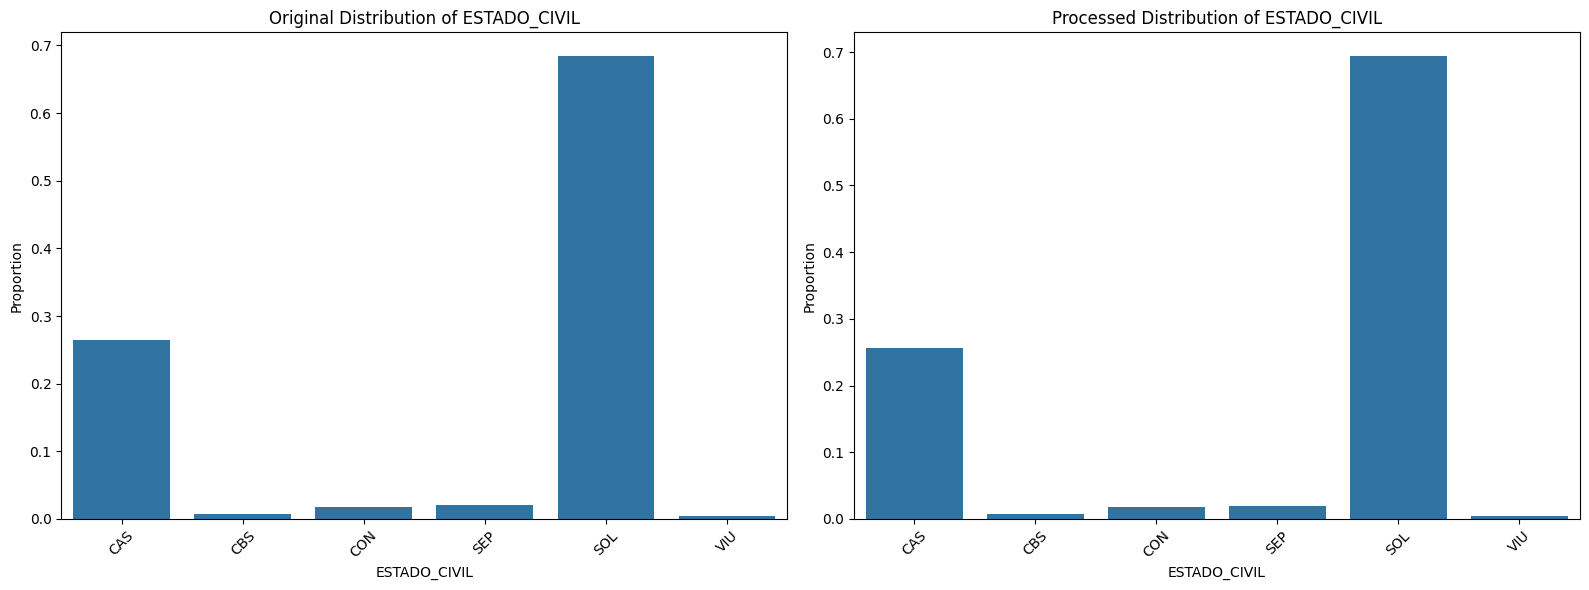


--- Comparando 'FLG_TC_VISA' ---
  Chi-squared Statistic: 2.6607
  P-value: 0.1029
  Interpretation: Distributions are not significantly different (p >= 0.05)


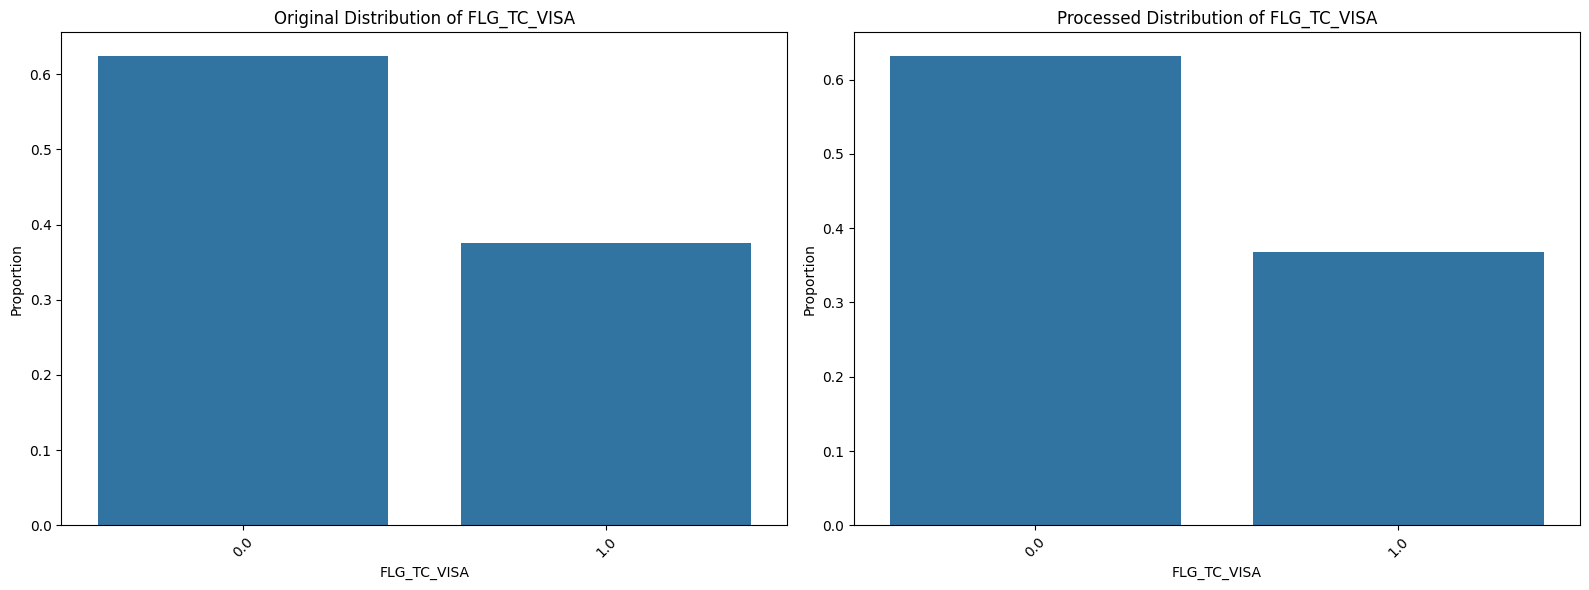


--- Comparando 'FLG_TC_MC' ---
  Chi-squared Statistic: 2.7441
  P-value: 0.0976
  Interpretation: Distributions are not significantly different (p >= 0.05)


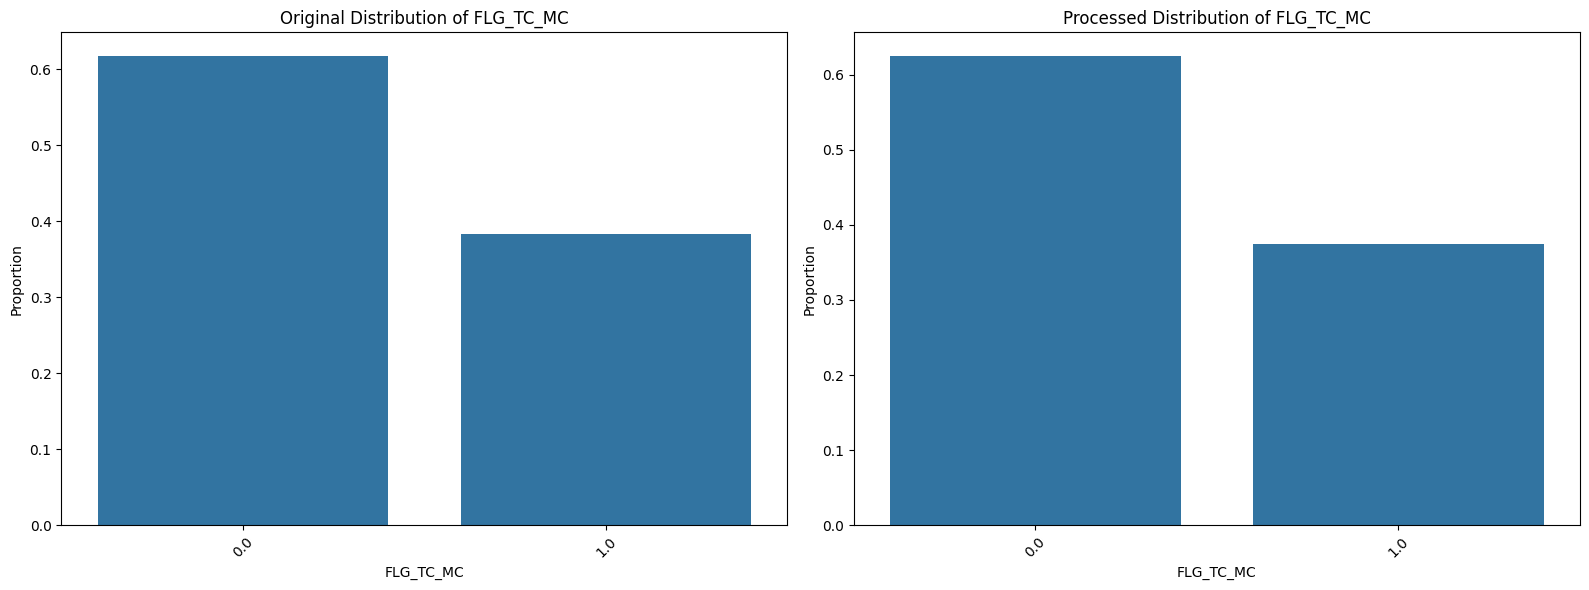


--- Comparando 'CLASIF_SISTEMA_ULT_12M' ---
  Chi-squared Statistic: 8.5837
  P-value: 0.0724
  Interpretation: Distributions are not significantly different (p >= 0.05)


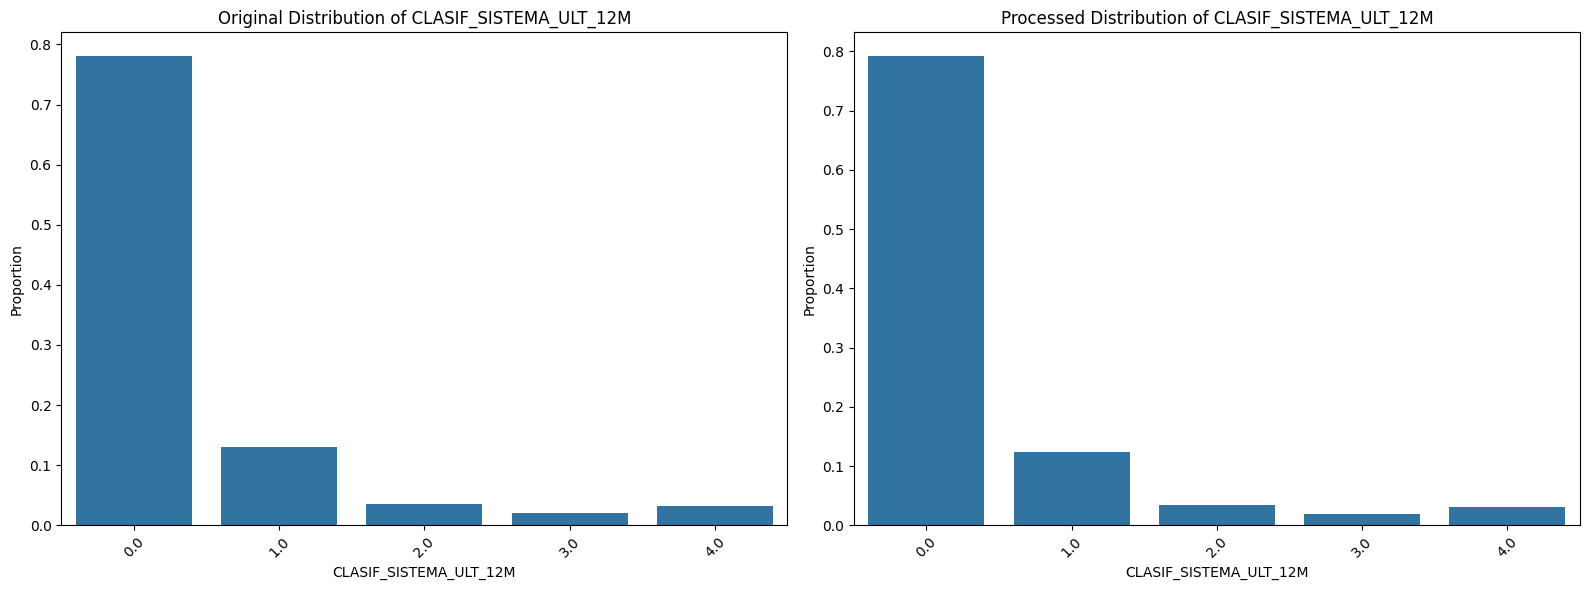


--- Summary of Categorical Comparison (Chi-squared Test) ---


Variable         Test  Statistic   P-value  \
0               PROFESION  Chi-squared   2.213833  1.000000   
1     ZONA_DEL_DESEMBOLSO  Chi-squared  68.805426  0.000044   
2            ESTADO_CIVIL  Chi-squared   4.702982  0.453193   
3             FLG_TC_VISA  Chi-squared   2.660660  0.102858   
4               FLG_TC_MC  Chi-squared   2.744079  0.097615   
5  CLASIF_SISTEMA_ULT_12M  Chi-squared   8.583711  0.072390   

                                      Interpretation  
0  Distributions are not significantly different ...  
1  Distributions are significantly different (p <...  
2  Distributions are not significantly different ...  
3  Distributions are not significantly different ...  
4  Distributions are not significantly different ...  
5  Distributions are not significantly different ...

In [331]:
comparison_results_cat = []
for col in cat_cols_for_imputation:
     print(f"\n--- Comparando '{col}' ---")
     original_counts = original_categorical_data[col].value_counts().sort_index()
     processed_counts = processed_categorical_data[col].value_counts().sort_index()
     all_indices = original_counts.index.union(processed_counts.index)
     original_counts_aligned = original_counts.reindex(all_indices, fill_value=0)
     processed_counts_aligned = processed_counts.reindex(all_indices, fill_value=0)
     contingency_table = pd.DataFrame({
         'Original': original_counts_aligned,
         'Processed': processed_counts_aligned
     })
     contingency_table = contingency_table[(contingency_table['Original'] > 0) | (contingency_table['Processed'] > 0)]
     if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1 and (contingency_table.sum(axis=1) > 0).all():
         try:
             chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
             print(f"  Chi-squared Statistic: {chi2_stat:.4f}")
             print(f"  P-value: {p_value:.4f}")
             interpretation = 'Distributions are significantly different (p < 0.05)' if p_value < 0.05 else 'Distributions are not significantly different (p >= 0.05)'
             print(f"  Interpretation: {interpretation}")
             comparison_results_cat.append({
                 'Variable': col,
                 'Test': 'Chi-squared',
                 'Statistic': chi2_stat,
                 'P-value': p_value,
                 'Interpretation': interpretation
             })
         except ValueError as e:
             print(f"  Could not perform Chi-squared test due to: {e}")
             comparison_results_cat.append({
                 'Variable': col,
                 'Test': 'Chi-squared',
                 'Statistic': 'N/A',
                 'P-value': 'N/A',
                 'Interpretation': f"Could not perform test: {e}"
             })
     else:
         print("  Not enough valid data in contingency table for Chi-squared test.")
         comparison_results_cat.append({
             'Variable': col,
             'Test': 'Chi-squared',
             'Statistic': 'N/A',
             'P-value': 'N/A',
             'Interpretation': 'Not enough valid data for Chi-squared test'
         })

     fig, axes = plt.subplots(1, 2, figsize=(16, 6))

     original_plot_data = original_categorical_data[col].value_counts(normalize=True).sort_index()
     sns.barplot(x=original_plot_data.index, y=original_plot_data.values, ax=axes[0])
     axes[0].set_title(f'Original Distribution of {col}')
     axes[0].set_xlabel(col)
     axes[0].set_ylabel('Proportion')
     axes[0].tick_params(axis='x', rotation=45)

     processed_plot_data = processed_categorical_data[col].value_counts(normalize=True).sort_index()
     sns.barplot(x=processed_plot_data.index, y=processed_plot_data.values, ax=axes[1])
     axes[1].set_title(f'Processed Distribution of {col}')
     axes[1].set_xlabel(col)
     axes[1].set_ylabel('Proportion')
     axes[1].tick_params(axis='x', rotation=45)
     plt.tight_layout()
     plt.show()

print("\n--- Summary of Categorical Comparison (Chi-squared Test) ---")
comparison_df_cat = pd.DataFrame(comparison_results_cat)
display(comparison_df_cat)

In [332]:
processed_categorical_data = X_train_imputed_cat_2.copy()
comparison_results_cat_2 = []


--- Comparando 'PROFESION' ---
  Chi-squared Statistic: 1.5690
  P-value: 1.0000
  Interpretation: Distributions are not significantly different (p >= 0.05)


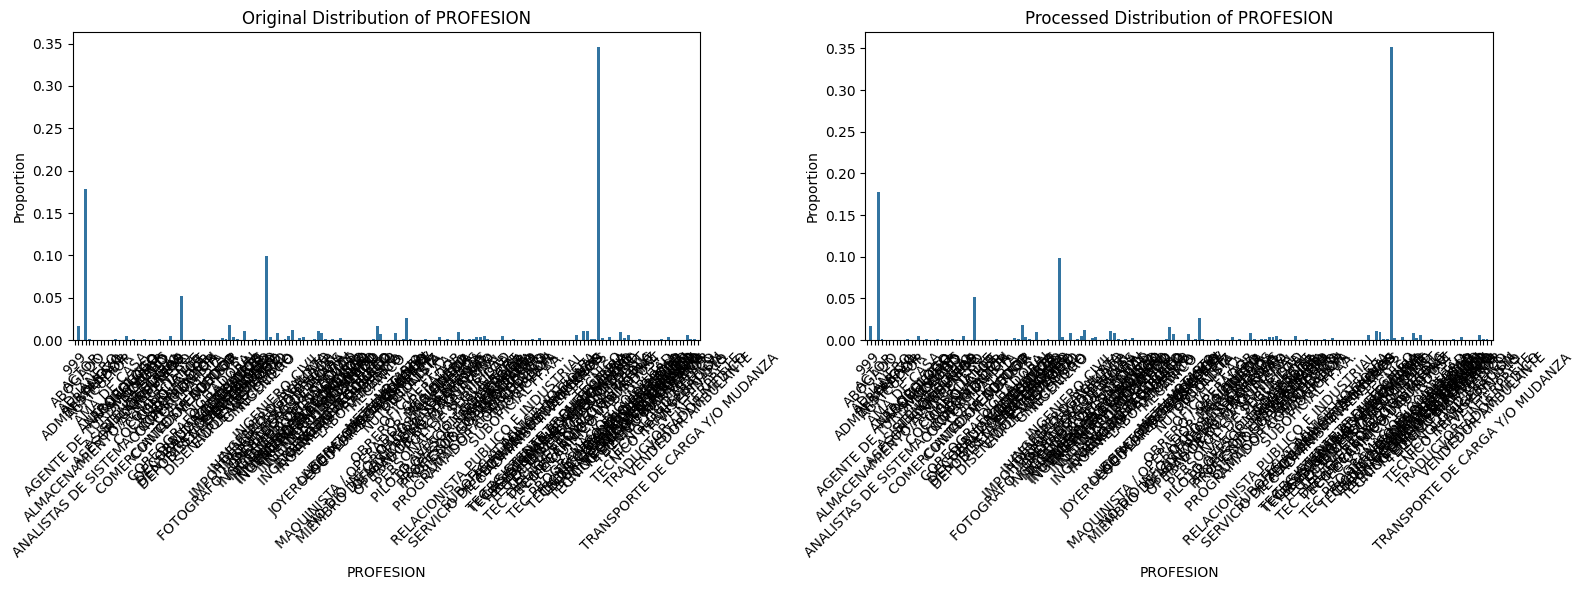


--- Comparando 'ZONA_DEL_DESEMBOLSO' ---
  Chi-squared Statistic: 14.5357
  P-value: 0.9883
  Interpretation: Distributions are not significantly different (p >= 0.05)


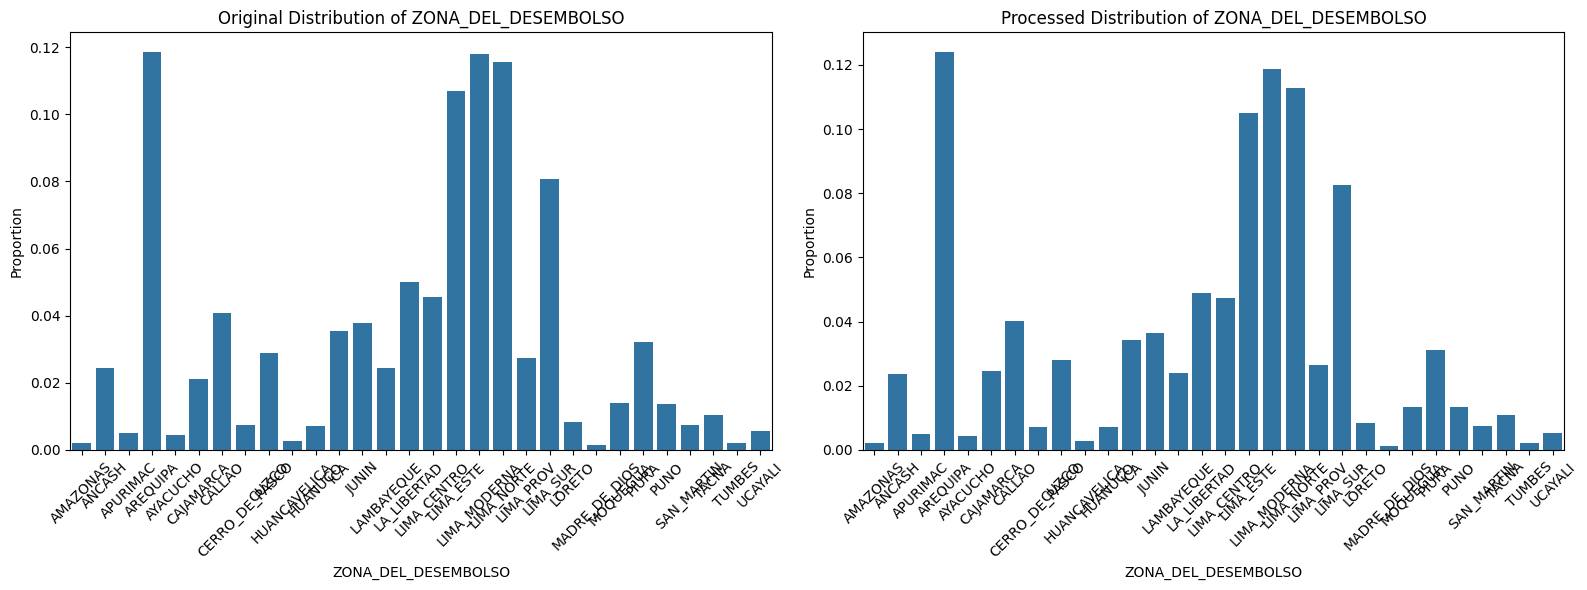


--- Comparando 'ESTADO_CIVIL' ---
  Chi-squared Statistic: 1.8265
  P-value: 0.8726
  Interpretation: Distributions are not significantly different (p >= 0.05)


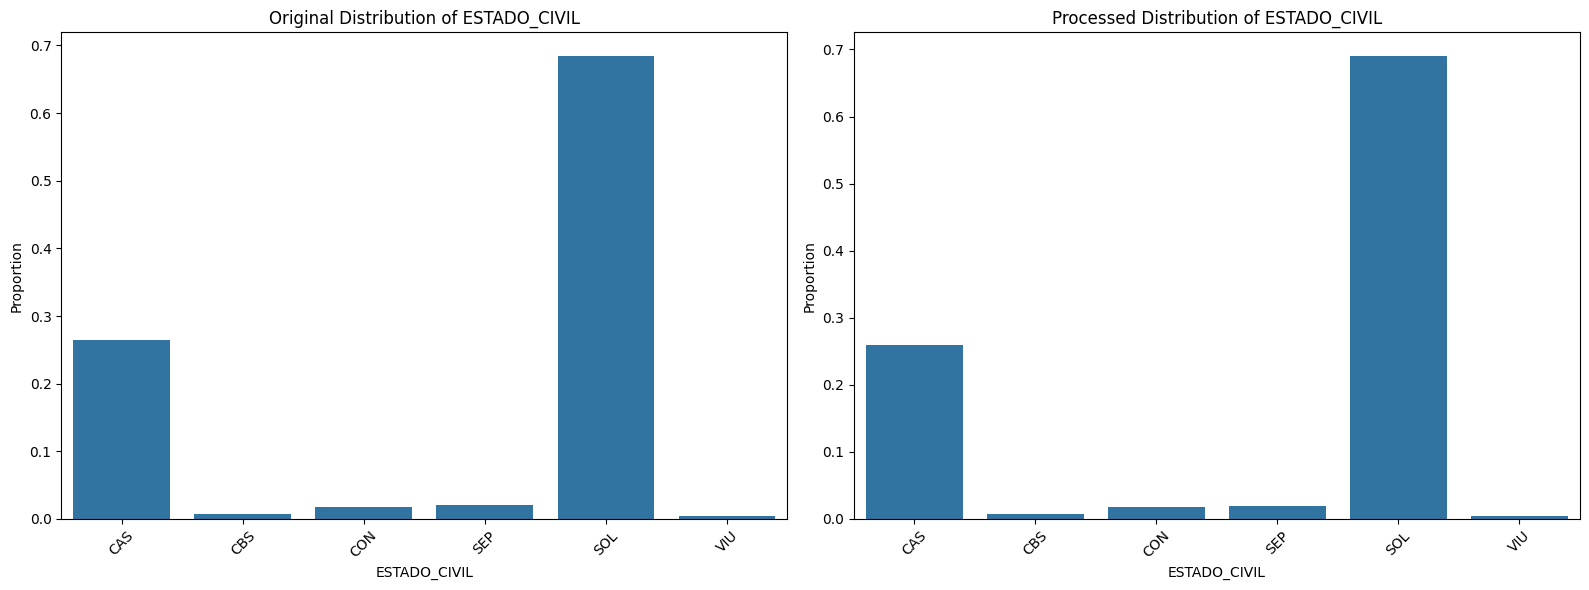


--- Comparando 'FLG_TC_VISA' ---
  Chi-squared Statistic: 0.1553
  P-value: 0.6935
  Interpretation: Distributions are not significantly different (p >= 0.05)


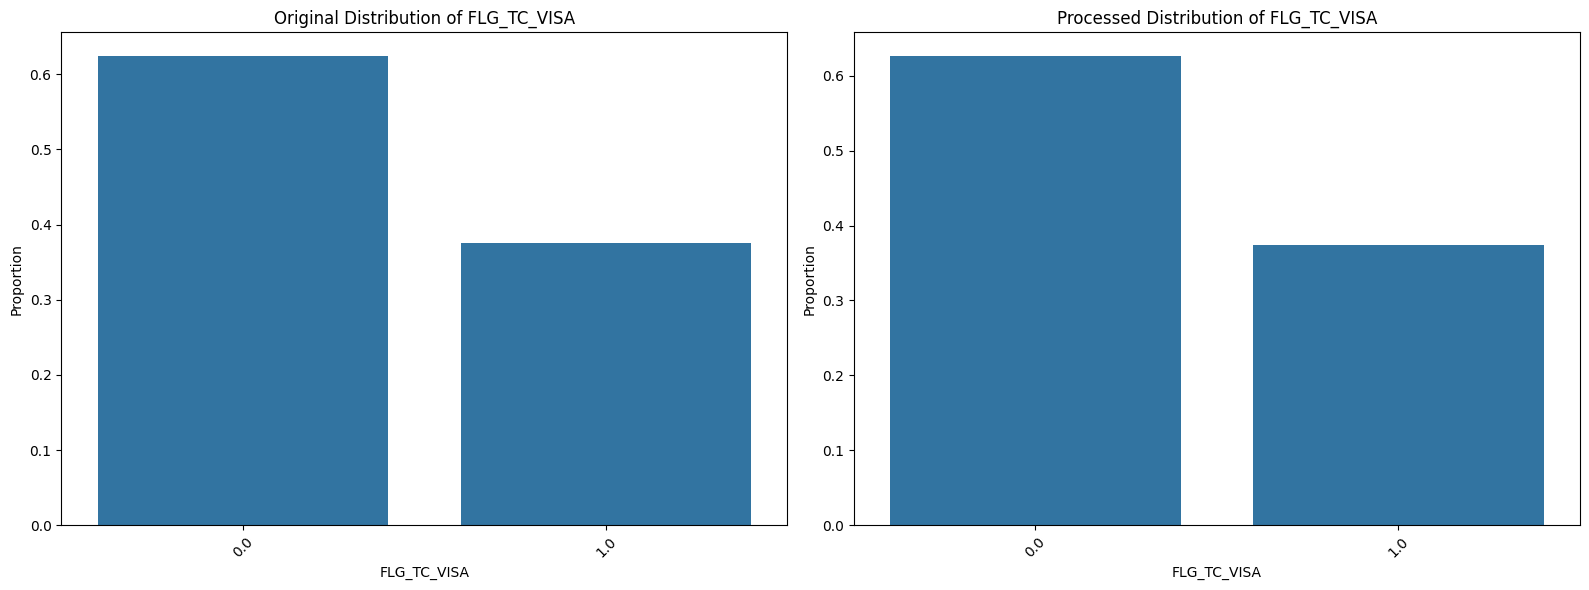


--- Comparando 'FLG_TC_MC' ---
  Chi-squared Statistic: 0.1799
  P-value: 0.6715
  Interpretation: Distributions are not significantly different (p >= 0.05)


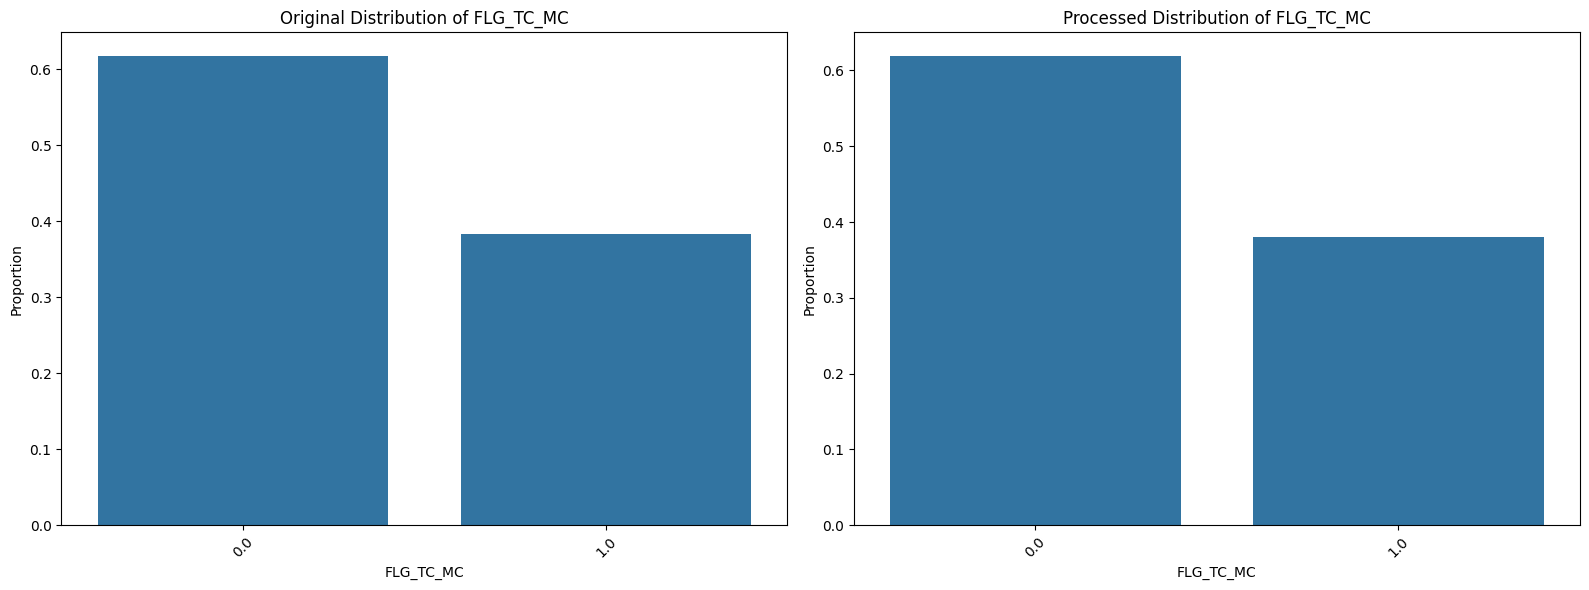


--- Comparando 'CLASIF_SISTEMA_ULT_12M' ---
  Chi-squared Statistic: 6.5289
  P-value: 0.1630
  Interpretation: Distributions are not significantly different (p >= 0.05)


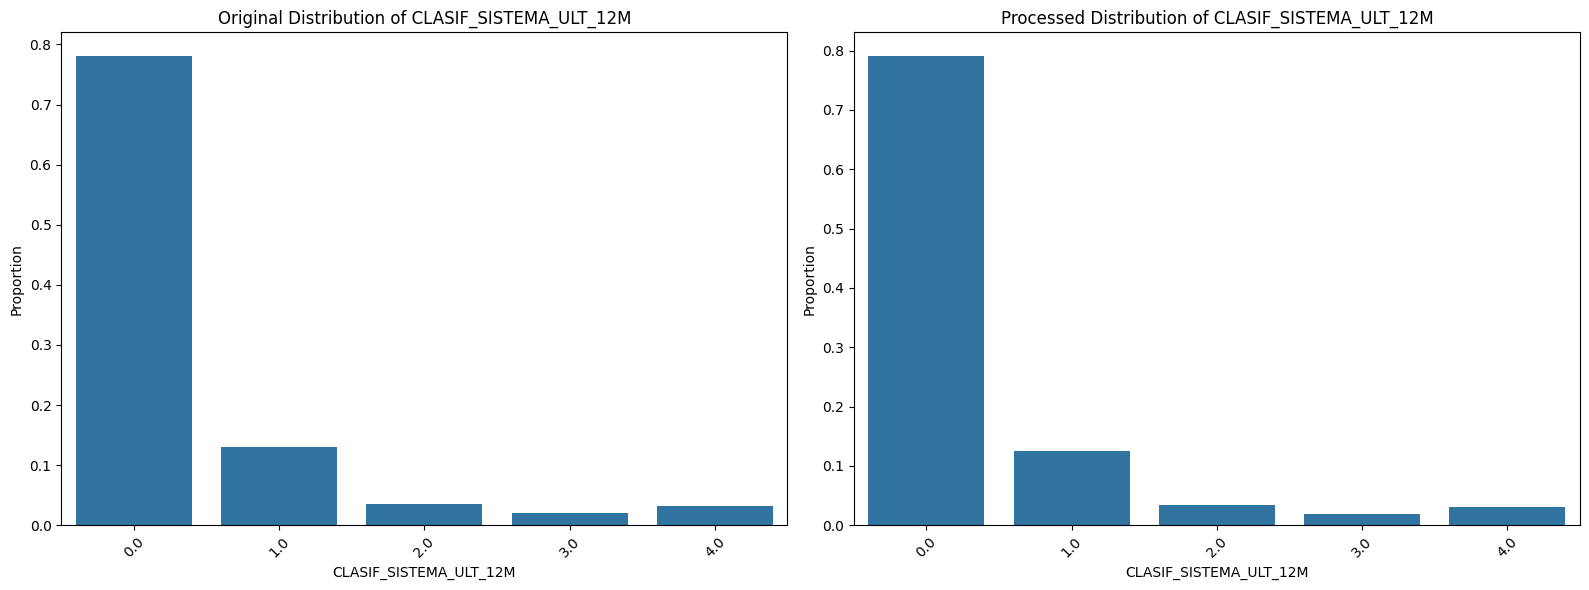


--- Summary of Categorical Comparison (Chi-squared Test) ---


Variable         Test  Statistic   P-value  \
0               PROFESION  Chi-squared   1.569006  1.000000   
1     ZONA_DEL_DESEMBOLSO  Chi-squared  14.535652  0.988310   
2            ESTADO_CIVIL  Chi-squared   1.826508  0.872592   
3             FLG_TC_VISA  Chi-squared   0.155277  0.693542   
4               FLG_TC_MC  Chi-squared   0.179896  0.671462   
5  CLASIF_SISTEMA_ULT_12M  Chi-squared   6.528908  0.162978   

                                      Interpretation  
0  Distributions are not significantly different ...  
1  Distributions are not significantly different ...  
2  Distributions are not significantly different ...  
3  Distributions are not significantly different ...  
4  Distributions are not significantly different ...  
5  Distributions are not significantly different ...

In [333]:
comparison_results_cat_2 = []
for col in cat_cols_for_imputation:
     print(f"\n--- Comparando '{col}' ---")
     original_counts = original_categorical_data[col].value_counts().sort_index()
     processed_counts = processed_categorical_data[col].value_counts().sort_index()
     all_indices = original_counts.index.union(processed_counts.index)
     original_counts_aligned = original_counts.reindex(all_indices, fill_value=0)
     processed_counts_aligned = processed_counts.reindex(all_indices, fill_value=0)
     contingency_table = pd.DataFrame({
         'Original': original_counts_aligned,
         'Processed': processed_counts_aligned
     })
     contingency_table = contingency_table[(contingency_table['Original'] > 0) | (contingency_table['Processed'] > 0)]
     if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1 and (contingency_table.sum(axis=1) > 0).all():
         try:
             chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
             print(f"  Chi-squared Statistic: {chi2_stat:.4f}")
             print(f"  P-value: {p_value:.4f}")
             interpretation = 'Distributions are significantly different (p < 0.05)' if p_value < 0.05 else 'Distributions are not significantly different (p >= 0.05)'
             print(f"  Interpretation: {interpretation}")
             comparison_results_cat_2.append({
                 'Variable': col,
                 'Test': 'Chi-squared',
                 'Statistic': chi2_stat,
                 'P-value': p_value,
                 'Interpretation': interpretation
             })
         except ValueError as e:
             print(f"  Could not perform Chi-squared test due to: {e}")
             comparison_results_cat_2.append({
                 'Variable': col,
                 'Test': 'Chi-squared',
                 'Statistic': 'N/A',
                 'P-value': 'N/A',
                 'Interpretation': f"Could not perform test: {e}"
             })
     else:
         print("  Not enough valid data in contingency table for Chi-squared test.")
         comparison_results_cat_2.append({
             'Variable': col,
             'Test': 'Chi-squared',
             'Statistic': 'N/A',
             'P-value': 'N/A',
             'Interpretation': 'Not enough valid data for Chi-squared test'
         })

     fig, axes = plt.subplots(1, 2, figsize=(16, 6))

     original_plot_data = original_categorical_data[col].value_counts(normalize=True).sort_index()
     sns.barplot(x=original_plot_data.index, y=original_plot_data.values, ax=axes[0])
     axes[0].set_title(f'Original Distribution of {col}')
     axes[0].set_xlabel(col)
     axes[0].set_ylabel('Proportion')
     axes[0].tick_params(axis='x', rotation=45)

     processed_plot_data = processed_categorical_data[col].value_counts(normalize=True).sort_index()
     sns.barplot(x=processed_plot_data.index, y=processed_plot_data.values, ax=axes[1])
     axes[1].set_title(f'Processed Distribution of {col}')
     axes[1].set_xlabel(col)
     axes[1].set_ylabel('Proportion')
     axes[1].tick_params(axis='x', rotation=45)
     plt.tight_layout()
     plt.show()

print("\n--- Summary of Categorical Comparison (Chi-squared Test) ---")
comparison_df_cat_2 = pd.DataFrame(comparison_results_cat_2)
display(comparison_df_cat_2)

In [334]:
comparison_cat_df_1_renamed = comparison_df_cat[['Variable', 'Interpretation']].rename(columns={'Interpretation': 'Interpretation_Imputer_1'})
comparison_cat_df_2_renamed = comparison_df_cat_2[['Variable', 'Interpretation']].rename(columns={'Interpretation': 'Interpretation_Imputer_2'})
combined_interpretations = pd.merge(comparison_cat_df_1_renamed, comparison_cat_df_2_renamed, on='Variable', how='outer')
print("Tabla combinada de interpretaciones:")
display(combined_interpretations)

Tabla combinada de interpretaciones:


Variable                           Interpretation_Imputer_1  \
0  CLASIF_SISTEMA_ULT_12M  Distributions are not significantly different ...   
1            ESTADO_CIVIL  Distributions are not significantly different ...   
2               FLG_TC_MC  Distributions are not significantly different ...   
3             FLG_TC_VISA  Distributions are not significantly different ...   
4               PROFESION  Distributions are not significantly different ...   
5     ZONA_DEL_DESEMBOLSO  Distributions are significantly different (p <...   

                            Interpretation_Imputer_2  
0  Distributions are not significantly different ...  
1  Distributions are not significantly different ...  
2  Distributions are not significantly different ...  
3  Distributions are not significantly different ...  
4  Distributions are not significantly different ...  
5  Distributions are not significantly different ...

###### Con ello podemos decidir mantenernos con una imputación simple como es la moda para todas las variables, excepto en ZONA_DEL_DESEMBOLSO en la que optaremos por usar el método multivariado para esta variable

##### **Cerremos entonces este sección dejando estas instrucciones en un pipeline, que luego iremos alimentando con los siguientes pasos del entrenamiento**

In [335]:
num_cols_for_imputation=['ATRASO_MAXIMO_ULT_12M','ATRASO_MAXIMO_ULT_24M',
                          'MESES_AHORROS_ULT_6M','MEDIANA_AHORROS_ULT_6M',
                          'DEUDA_TOTAL_SISTEMA','INGRESO_CLIENTE','EDAD_T',
                          'CUOTA','LINEA_DE_TC', 'MONTO_TC_MEMBRESIA']
cat_cols_for_imputation=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','CLASIF_SISTEMA_ULT_12M','FLG_TC_VISA','FLG_TC_MC']
num_cols_median = [col for col in num_cols_for_imputation if col not in ['DEUDA_TOTAL_SISTEMA', 'EDAD_T']]
num_cols_knn = ['DEUDA_TOTAL_SISTEMA', 'EDAD_T']
cat_cols_mode = [col for col in cat_cols_for_imputation if col != 'ZONA_DEL_DESEMBOLSO']
cat_cols_rf = ['ZONA_DEL_DESEMBOLSO']

In [336]:
class CategoricalImputerWithDecoding(BaseEstimator, TransformerMixin):
    def __init__(self, random_state=42, max_iter=10):
        self.random_state = random_state
        self.max_iter = max_iter
        self.ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        self.imputer = IterativeImputer(
            estimator=RandomForestClassifier(random_state=self.random_state),
            max_iter=self.max_iter,
            random_state=self.random_state,
            add_indicator=False
        )
        self.columns_ = None

    def set_output(self, *, transform=None):
        return self

    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        self.columns_ = X.columns.tolist()
        X_encoded = self.ordinal_encoder.fit_transform(X)
        self.imputer.fit(X_encoded)
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.columns_)
        X_encoded = self.ordinal_encoder.transform(X)
        X_imputed_encoded = self.imputer.transform(X_encoded)
        X_imputed_decoded = self.ordinal_encoder.inverse_transform(X_imputed_encoded)
        return pd.DataFrame(X_imputed_decoded, columns=self.columns_, index=X.index)

In [337]:
pipe_imputer = Pipeline(
    [
        ('imputer',
         ColumnTransformer(transformers=[
             ('num_median', SimpleImputer(strategy='median'), num_cols_median),
             ('num_knn', KNNImputer(n_neighbors=5), num_cols_knn),
             ('cat_mode', SimpleImputer(strategy='most_frequent'), cat_cols_mode),
             ('cat_rf', CategoricalImputerWithDecoding(random_state=42, max_iter=10), cat_cols_rf)
             ],remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')
            )
        ]
    )

In [338]:
pipe_imputer.fit(X_train)

Pipeline(steps=[('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_median',
                                                  SimpleImputer(strategy='median'),
                                                  ['ATRASO_MAXIMO_ULT_12M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'INGRESO_CLIENTE', 'CUOTA',
                                                   'LINEA_DE_TC',
                                                   'MONTO_TC_MEMBRESIA']),
                                                 ('num_knn', KNNImputer(),
                                                  ['DEUDA_TOTAL_SISTEMA',
                                                   'EDAD_T']),
                                                 ('cat_mode',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['PROFESION', 'ESTADO_CIVIL',
                                                   'CLASIF_SISTEMA_ULT_12M',
                                                   'FLG_TC_VISA',
                                                   'FLG_TC_MC']),
                                                 ('cat_rf',
                                                  CategoricalImputerWithDecoding(),
                                                  ['ZONA_DEL_DESEMBOLSO'])],
                                   verbose_feature_names_out=False))])

In [339]:
X_train_imputed = pipe_imputer.transform(X_train)
X_test_imputed = pipe_imputer.transform(X_test)

In [340]:
# Revisión de la proporción de nulos por variable
null_values = pd.concat([X_train_imputed.isnull().sum(), X_train_imputed.isnull().sum() / len(X_train_imputed)], axis = 1)
null_values.rename(columns = {0: 'number_null_values',1: 'ratio_null_values'}, inplace = True)
null_values[null_values['ratio_null_values'] > 0]

Empty DataFrame
Columns: [number_null_values, ratio_null_values]
Index: []

### **3.2 Tratamiento de Outliers:**

###### Iniciemos con un descriptivo, es importante reconocer que la prioridad siempre será el conocimiento de los datos que nos lleven a diagnosticar y tratar adecuadamente

In [341]:
X_train_imputed.describe().T.style.format("{:.2f}")

##### **Revisemos el primer método basado en IQR**

In [342]:
X_train_imputed_aux=X_train_imputed.copy()

In [343]:
numerical_cols_imputed = X_train_imputed_aux.select_dtypes(include=np.number).columns
outlier_data_iqr_imputed = []

for col in numerical_cols_imputed:
    Q1 = X_train_imputed_aux[col].quantile(0.25)
    Q3 = X_train_imputed_aux[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    X_train_imputed_aux[f'is_outlier_iqr_{col}'] = (
        (X_train_imputed_aux[col] < lower_bound) | (X_train_imputed_aux[col] > upper_bound)
    )

    n_outliers_inf = len(X_train_imputed_aux[X_train_imputed_aux[col] < lower_bound])
    n_outliers_sup = len(X_train_imputed_aux[X_train_imputed_aux[col] > upper_bound])
    total_count = len(X_train_imputed_aux[col])

    pct_outliers_inf = (n_outliers_inf / total_count) * 100
    pct_outliers_sup = (n_outliers_sup / total_count) * 100

    outlier_data_iqr_imputed.append({
        'Variable': col,
        'Outliers < Lim Inf': n_outliers_inf,
        'Pct < Lim Inf': f'{pct_outliers_inf:.2f}%',
        'Outliers > Lim Sup': n_outliers_sup,
        'Pct > Lim Sup': f'{pct_outliers_sup:.2f}%'
    })

outlier_df_iqr_imputed = pd.DataFrame(outlier_data_iqr_imputed)
outlier_df_iqr_imputed['Pct < Lim Inf Numeric'] = outlier_df_iqr_imputed['Pct < Lim Inf'].str.replace('%', '').astype(float)
outlier_df_iqr_imputed['Pct > Lim Sup Numeric'] = outlier_df_iqr_imputed['Pct > Lim Sup'].str.replace('%', '').astype(float)
filtered_outliers_imputed = outlier_df_iqr_imputed[(
    outlier_df_iqr_imputed['Pct < Lim Inf Numeric'] > 0) |
    (outlier_df_iqr_imputed['Pct > Lim Sup Numeric'] > 0
)]

print("--- Outliers usando IQR ---")
display(filtered_outliers_imputed.drop(columns=['Pct < Lim Inf Numeric', 'Pct > Lim Sup Numeric']))

--- Outliers usando IQR ---


Variable  Outliers < Lim Inf Pct < Lim Inf  \
0    ATRASO_MAXIMO_ULT_12M                   0         0.00%   
1    ATRASO_MAXIMO_ULT_24M                   0         0.00%   
2     MESES_AHORROS_ULT_6M                3240        14.49%   
3   MEDIANA_AHORROS_ULT_6M                   0         0.00%   
4          INGRESO_CLIENTE                   0         0.00%   
5                    CUOTA                   0         0.00%   
6              LINEA_DE_TC                   0         0.00%   
7       MONTO_TC_MEMBRESIA                   0         0.00%   
8      DEUDA_TOTAL_SISTEMA                   0         0.00%   
9                   EDAD_T                   0         0.00%   
10                   DEUDA                   0         0.00%   
12    ATRASO_MAXIMO_ULT_6M                   0         0.00%   
14        MONTO_TC_SISTEMA                   0         0.00%   

    Outliers > Lim Sup Pct > Lim Sup  
0                 2903        12.98%  
1                 4614        20.64%  
2                    0         0.00%  
3                 2284        10.21%  
4                 2229         9.97%  
5                 2304        10.30%  
6                  917         4.10%  
7                 1427         6.38%  
8                 2369        10.59%  
9                  512         2.29%  
10                1459         6.53%  
12                1409         6.30%  
14                3110        13.91%

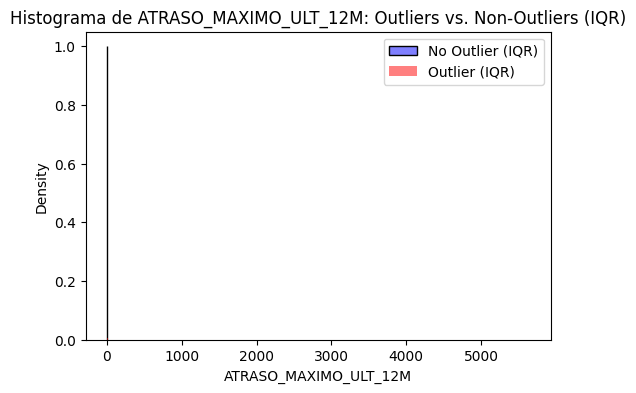

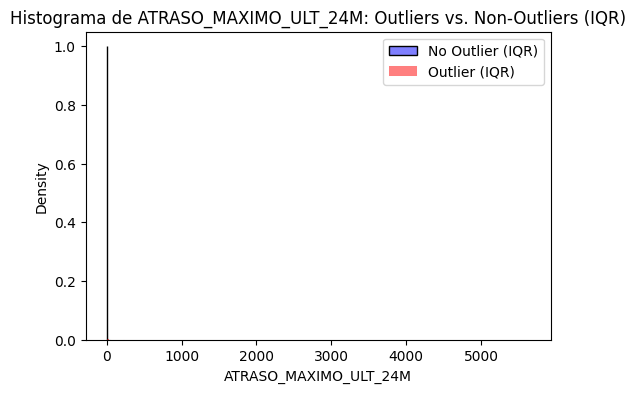

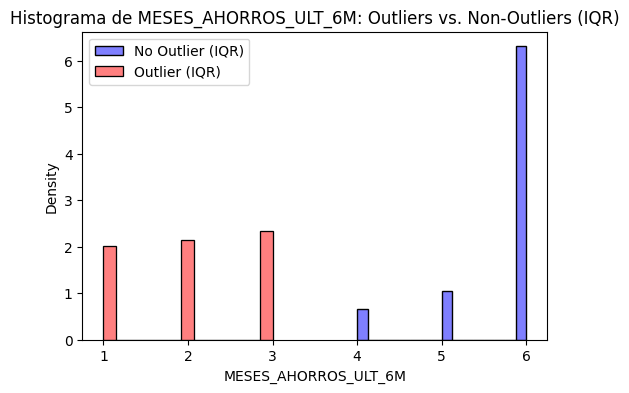

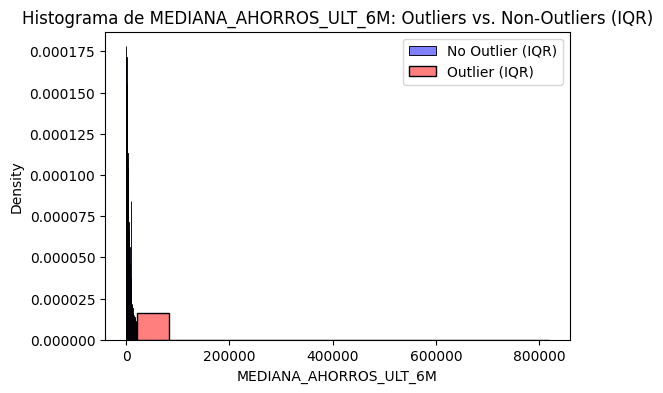

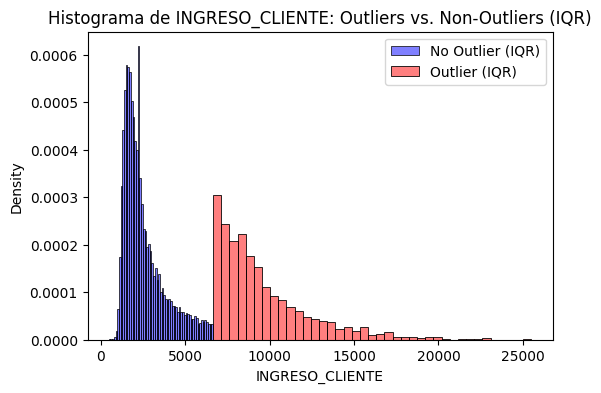

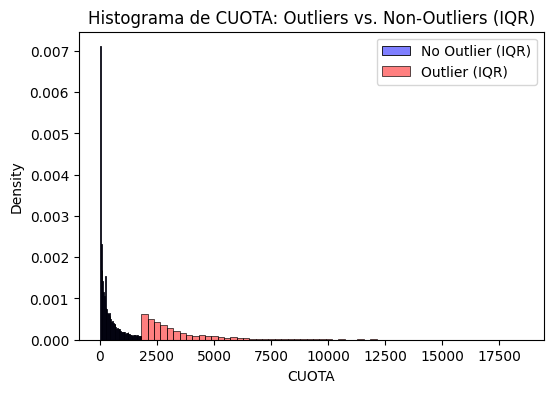

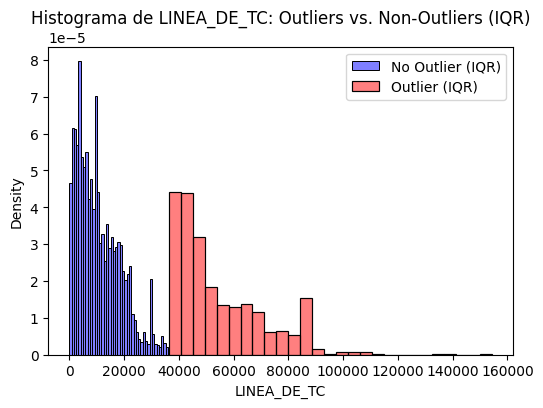

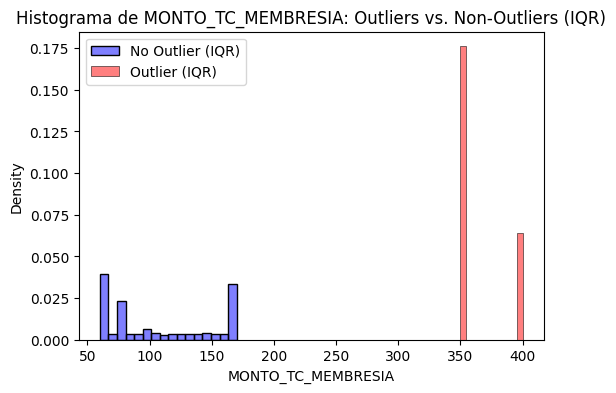

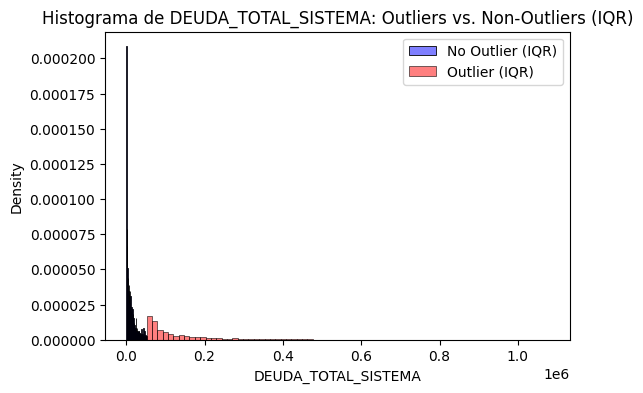

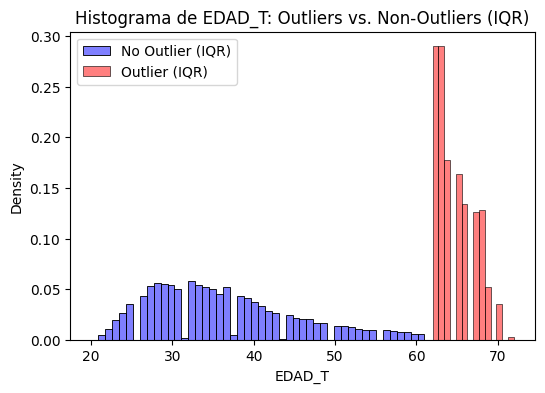

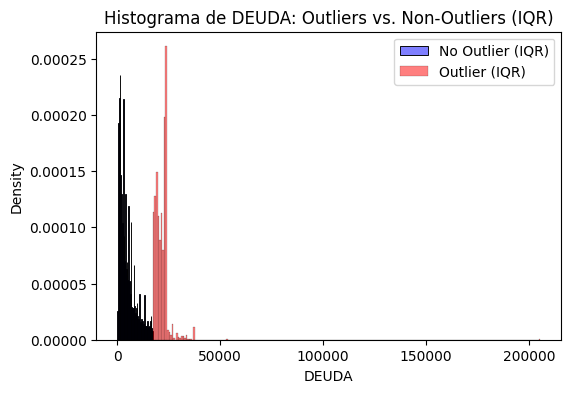

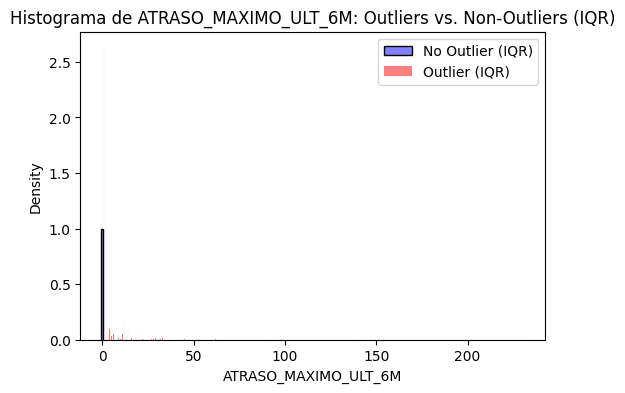

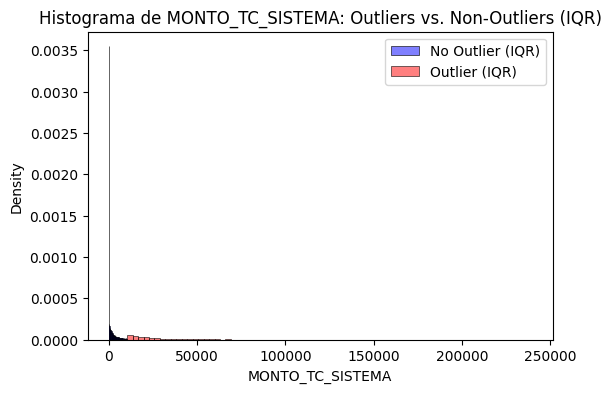

In [344]:
numerical_cols_with_iqr_outliers = filtered_outliers_imputed['Variable'].tolist()

for col in numerical_cols_with_iqr_outliers:
    iqr_flag_col = f'is_outlier_iqr_{col}'
    plt.figure(figsize=(6, 4))
    sns.histplot(X_train_imputed_aux[~X_train_imputed_aux[iqr_flag_col]][col],
                 label='No Outlier (IQR)', color='blue', alpha=0.5, stat='density', kde=False)
    sns.histplot(X_train_imputed_aux[X_train_imputed_aux[iqr_flag_col]][col],
                 label='Outlier (IQR)', color='red', alpha=0.5, stat='density', kde=False)

    plt.title(f'Histograma de {col}: Outliers vs. Non-Outliers (IQR)')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [345]:
import re
outlier_iqr_cols = [col for col in X_train_imputed_aux.columns if re.match(r'is_outlier_iqr_.*', col)]
X_train_imputed_aux['is_outlier_iqr_any'] = X_train_imputed_aux[outlier_iqr_cols].any(axis=1)

##### **Revisemos el segundo método basado en IF**

In [346]:
numerical_cols_imputed_if = X_train_imputed_aux.select_dtypes(include=np.number).columns
numerical_cols_imputed_if = [col for col in numerical_cols_imputed_if if not (col.startswith('is_outlier_iqr_'))]
df_numerical_for_if_imputed = X_train_imputed_aux[numerical_cols_imputed_if].copy()
iso_forest_imputed = IsolationForest(random_state=42, contamination='auto')
iso_forest_imputed.fit(df_numerical_for_if_imputed)
anomaly_labels_imputed = iso_forest_imputed.predict(df_numerical_for_if_imputed)
is_outlier_if_imputed = pd.Series(False, index=X_train_imputed_aux.index, name='is_outlier_if')
is_outlier_if_imputed.loc[df_numerical_for_if_imputed.index] = (anomaly_labels_imputed == -1)
X_train_imputed_aux['is_outlier_if'] = is_outlier_if_imputed
n_outliers_if = list(anomaly_labels_imputed).count(-1)
total_samples_if = len(df_numerical_for_if_imputed)
pct_outliers_if = (n_outliers_if / total_samples_if) * 100

print("--- Outlier usando Isolation Forest ---")
print(f"Total: {total_samples_if}")
print(f"Número de outliers: {n_outliers_if}")
print(f"Porcentaje de outliers: {pct_outliers_if:.2f}%")

--- Outlier usando Isolation Forest ---
Total: 22360
Número de outliers: 2498
Porcentaje de outliers: 11.17%


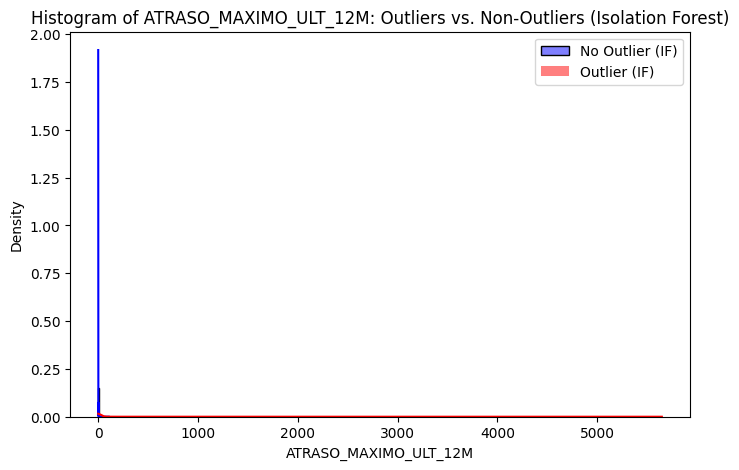

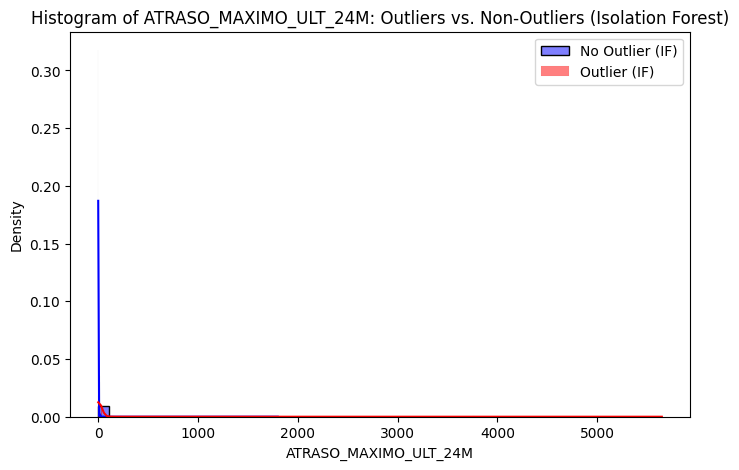

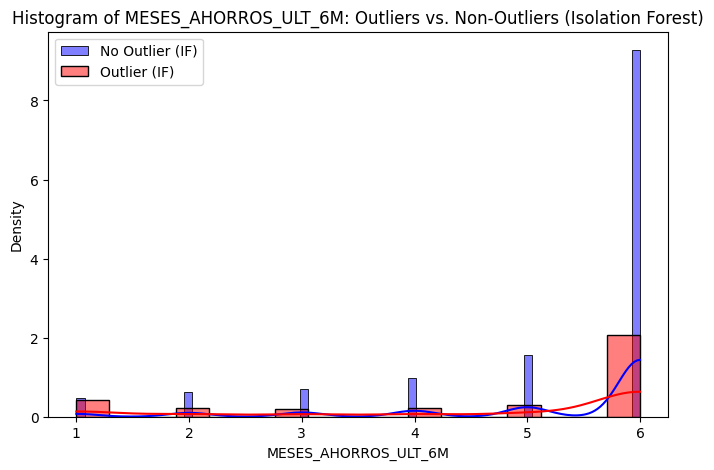

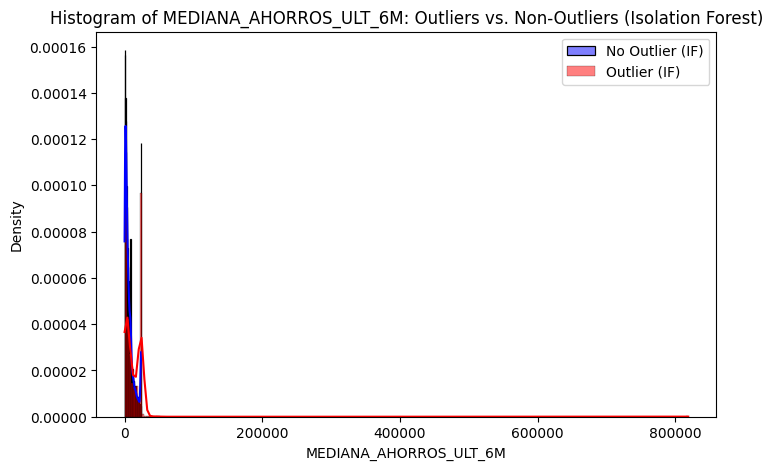

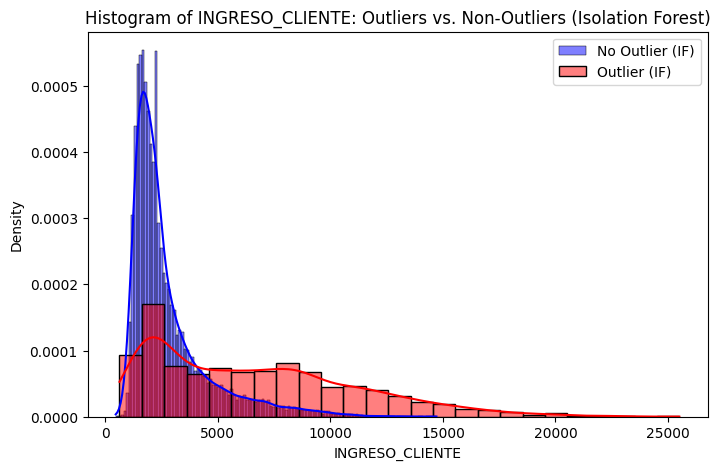

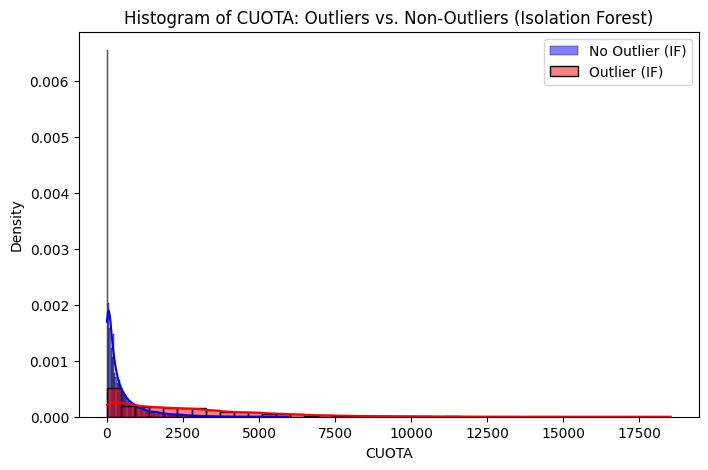

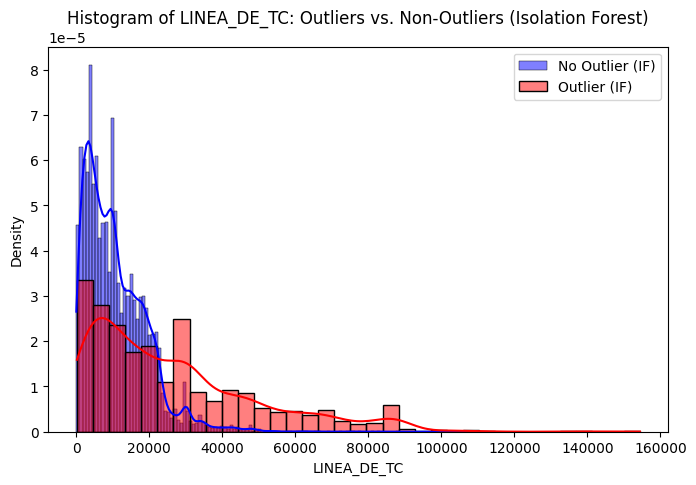

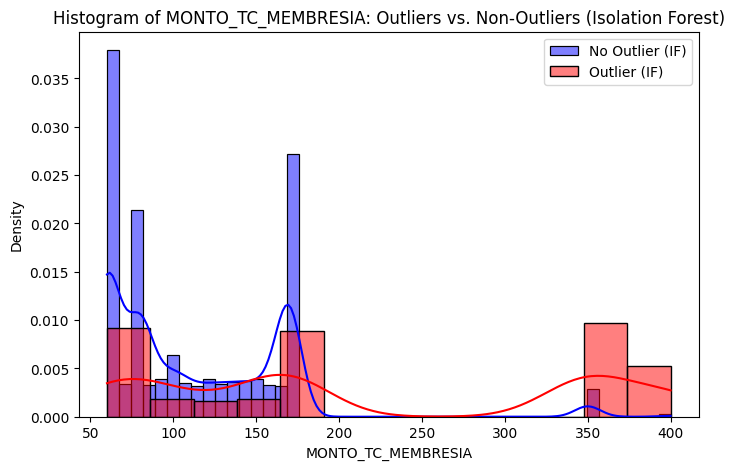

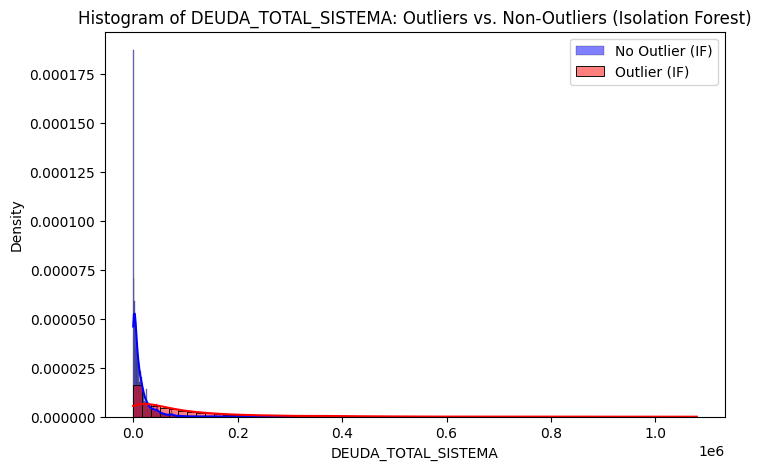

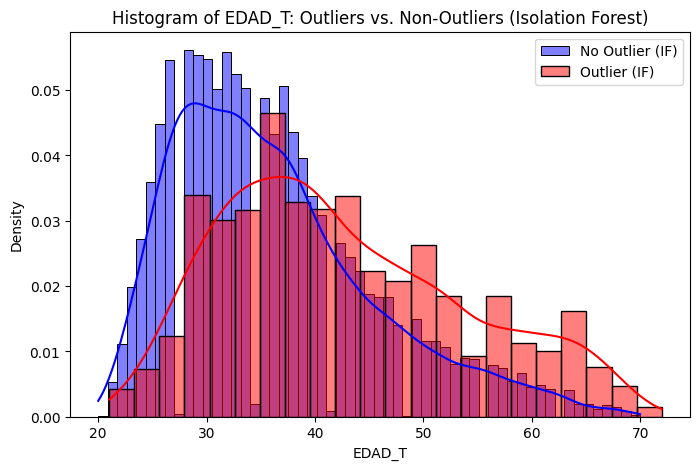

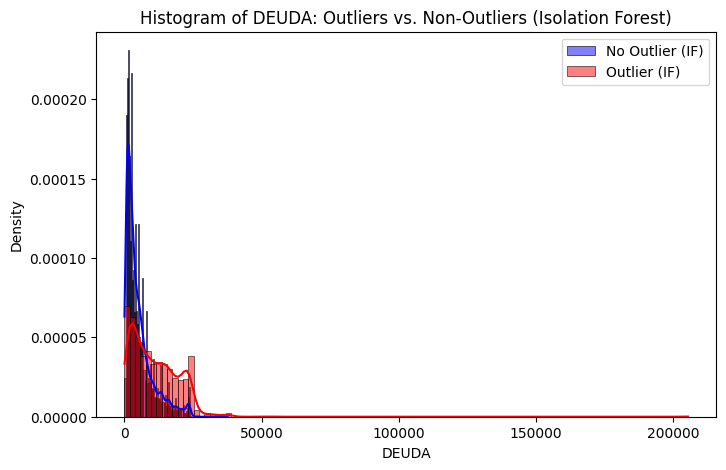

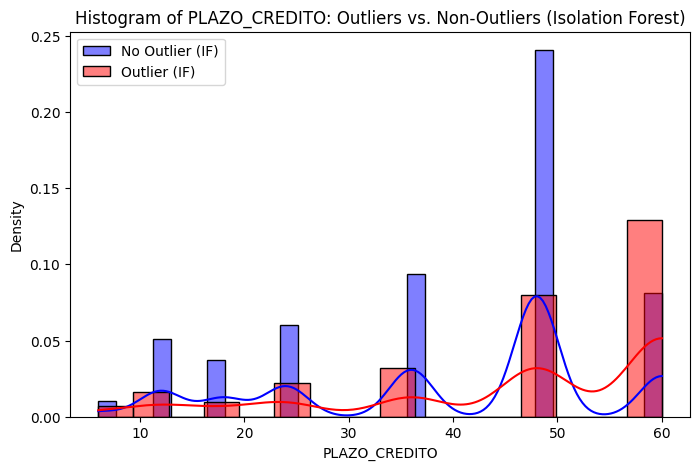

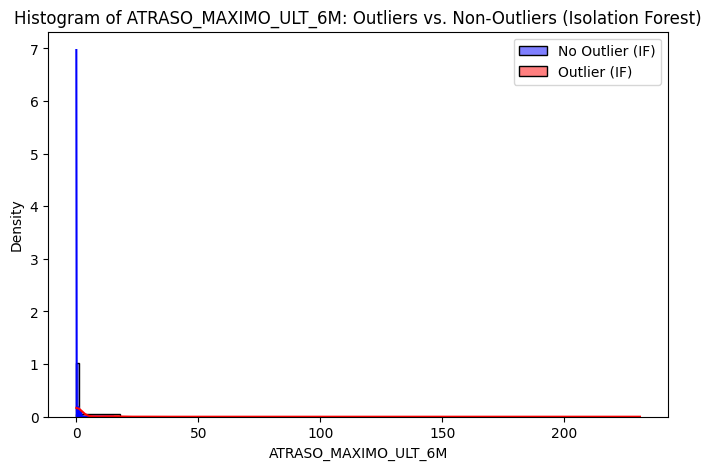

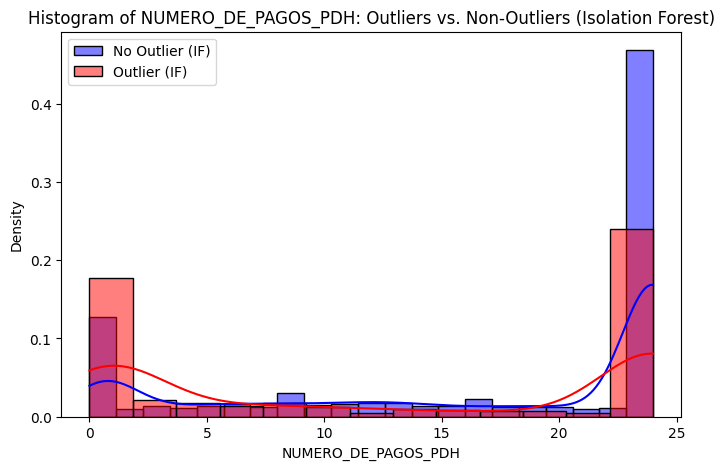

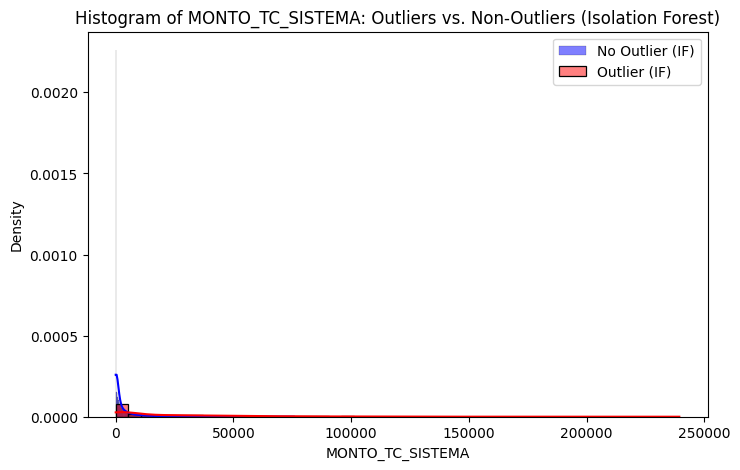

In [347]:
for col in df_numerical_for_if_imputed.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_numerical_for_if_imputed[X_train_imputed_aux['is_outlier_if'] == False][col],
                 label='No Outlier (IF)', color='blue', alpha=0.5, stat='density', kde=True)
    sns.histplot(df_numerical_for_if_imputed[X_train_imputed_aux['is_outlier_if'] == True][col],
                 label='Outlier (IF)', color='red', alpha=0.5, stat='density', kde=True)
    plt.title(f'Histogram of {col}: Outliers vs. Non-Outliers (Isolation Forest)')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

##### **Comparemos ambos métodos (IQR vs IF)**

In [348]:
overall_outlier_flags = ['is_outlier_iqr_any','is_outlier_if']

In [349]:
total_samples = len(X_train_imputed_aux)
for flag_col in overall_outlier_flags:
    n_outliers = X_train_imputed_aux[flag_col].sum()
    pct_outliers = (n_outliers / total_samples) * 100
    print(f"{flag_col.replace('is_outlier_', '').replace('_any', '').upper():<25}: {n_outliers:>6} outliers ({pct_outliers:>6.2f}%)")

IQR                      :  11746 outliers ( 52.53%)
IF                       :   2498 outliers ( 11.17%)


In [350]:
for i in range(len(overall_outlier_flags)):
    for j in range(i + 1, len(overall_outlier_flags)):
        col1 = overall_outlier_flags[i]
        col2 = overall_outlier_flags[j]
        contingency_table = pd.crosstab(X_train_imputed_aux[col1], X_train_imputed_aux[col2])
        print(f"\nContingency Table: {col1.replace('is_outlier_', '').replace('_any', '').upper()} vs. {col2.replace('is_outlier_', '').replace('_any', '').upper()}\n")
        display(contingency_table)


Contingency Table: IQR vs. IF



is_outlier_if       False  True 
is_outlier_iqr_any              
False               10614      0
True                 9248   2498

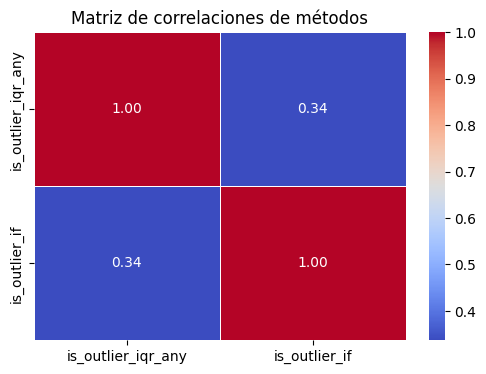

In [351]:
outlier_flags_df = X_train_imputed_aux[overall_outlier_flags].astype(int)
correlation_matrix_outliers = outlier_flags_df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_outliers, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de correlaciones de métodos')
plt.show()

##### **En este punto, vamos a realizar una transformación de las variables para ayudar a refinar el diagnóstico de outliers**

In [352]:
from sklearn.preprocessing import PowerTransformer

In [353]:
X_train_imputed_aux_2=X_train_imputed.copy()

In [354]:
numerical_cols = X_train_imputed_aux_2.select_dtypes(include=np.number).columns
pt = PowerTransformer(method='yeo-johnson', standardize=True)
X_train_numerical_transformed = pt.fit_transform(X_train_imputed_aux_2[numerical_cols])
X_train_numerical_transformed_df = pd.DataFrame(X_train_numerical_transformed, columns=numerical_cols, index=X_train_imputed_aux_2.index)
non_numerical_cols = X_train_imputed_aux_2.select_dtypes(exclude=np.number).columns
X_train_imputed_aux_2_transformed = pd.concat([X_train_numerical_transformed_df,X_train_imputed[non_numerical_cols]], axis=1)

##### **Revisemos nuevamente el primer método basado en IQR**

In [355]:
numerical_cols_transformed = X_train_imputed_aux_2_transformed.select_dtypes(include=np.number).columns
outlier_data_iqr_transformed = []

for col in numerical_cols_transformed:
    Q1 = X_train_imputed_aux_2_transformed[col].quantile(0.25)
    Q3 = X_train_imputed_aux_2_transformed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X_train_imputed_aux_2_transformed[f'is_outlier_iqr_transformed_{col}'] = (
        (X_train_imputed_aux_2_transformed[col] < lower_bound) | (X_train_imputed_aux_2_transformed[col] > upper_bound)
    )

    n_outliers_inf = len(X_train_imputed_aux_2_transformed[X_train_imputed_aux_2_transformed[col] < lower_bound])
    n_outliers_sup = len(X_train_imputed_aux_2_transformed[X_train_imputed_aux_2_transformed[col] > upper_bound])
    total_count = len(X_train_imputed_aux_2_transformed[col])

    pct_outliers_inf = (n_outliers_inf / total_count) * 100
    pct_outliers_sup = (n_outliers_sup / total_count) * 100

    outlier_data_iqr_transformed.append({
        'Variable': col,
        'Outliers < Lim Inf': n_outliers_inf,
        'Pct < Lim Inf': f'{pct_outliers_inf:.2f}%',
        'Outliers > Lim Sup': n_outliers_sup,
        'Pct > Lim Sup': f'{pct_outliers_sup:.2f}%'
    })

outlier_df_iqr_transformed = pd.DataFrame(outlier_data_iqr_transformed)
outlier_df_iqr_transformed['Pct < Lim Inf Numeric'] = outlier_df_iqr_transformed['Pct < Lim Inf'].str.replace('%', '').astype(float)
outlier_df_iqr_transformed['Pct > Lim Sup Numeric'] = outlier_df_iqr_transformed['Pct > Lim Sup'].str.replace('%', '').astype(float)
filtered_outliers_transformed_iqr = outlier_df_iqr_transformed[(
    outlier_df_iqr_transformed['Pct < Lim Inf Numeric'] > 0) |
    (outlier_df_iqr_transformed['Pct > Lim Sup Numeric'] > 0
)]

print("--- Outliers usando IQR en datos transformados ---")
display(filtered_outliers_transformed_iqr.drop(columns=['Pct < Lim Inf Numeric', 'Pct > Lim Sup Numeric']))

--- Outliers usando IQR en datos transformados ---


Variable  Outliers < Lim Inf Pct < Lim Inf  \
0    ATRASO_MAXIMO_ULT_12M                   0         0.00%   
1    ATRASO_MAXIMO_ULT_24M                   0         0.00%   
3   MEDIANA_AHORROS_ULT_6M                  49         0.22%   
4          INGRESO_CLIENTE                  14         0.06%   
5                    CUOTA                   0         0.00%   
6              LINEA_DE_TC                   7         0.03%   
8      DEUDA_TOTAL_SISTEMA                   0         0.00%   
10                   DEUDA                  17         0.08%   
12    ATRASO_MAXIMO_ULT_6M                   0         0.00%   

    Outliers > Lim Sup Pct > Lim Sup  
0                 2903        12.98%  
1                 4614        20.64%  
3                    1         0.00%  
4                    0         0.00%  
5                   11         0.05%  
6                  125         0.56%  
8                  337         1.51%  
10                   1         0.00%  
12                1409         6.30%

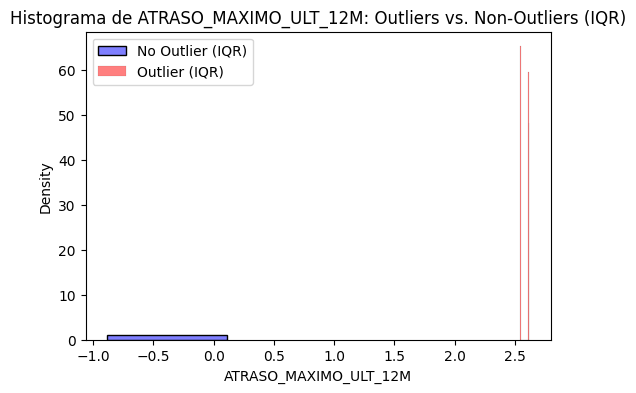

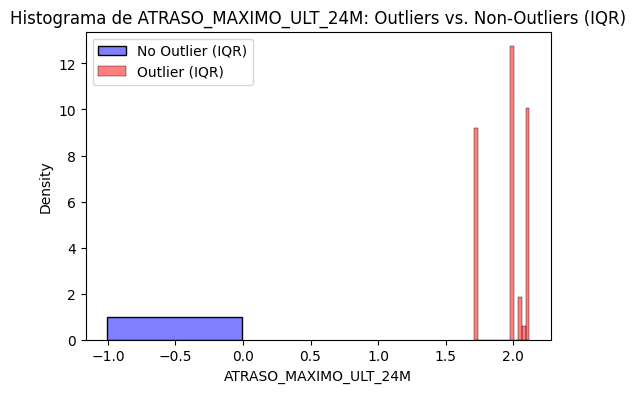

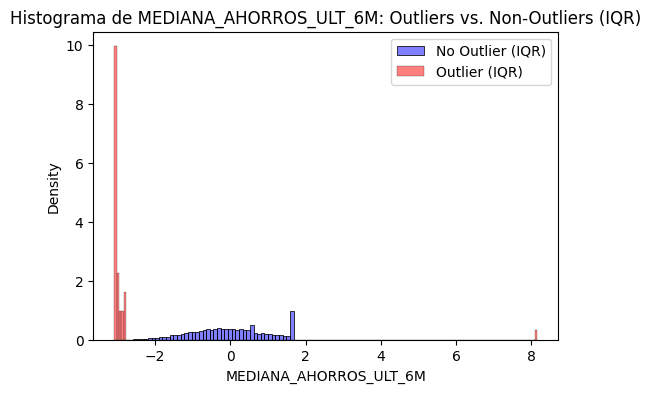

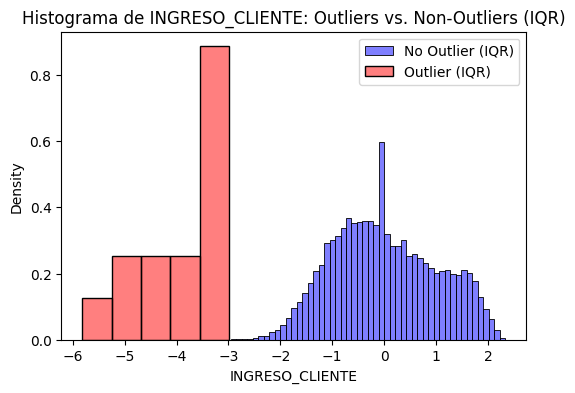

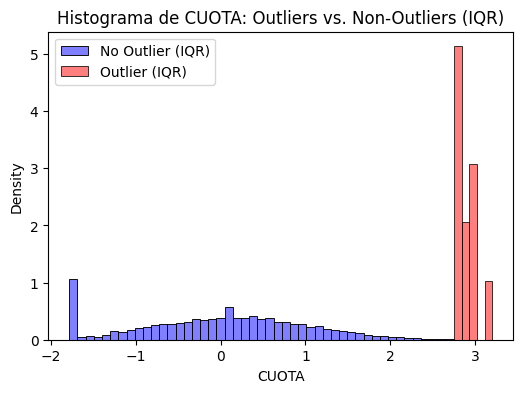

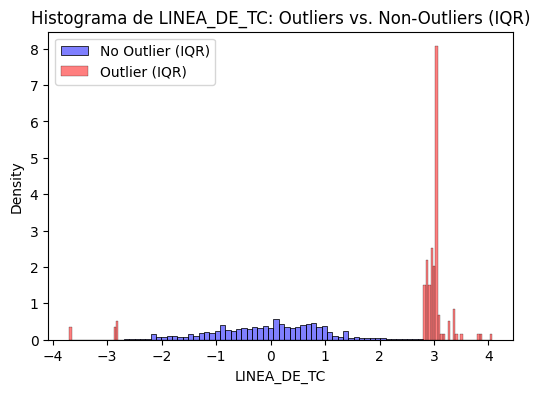

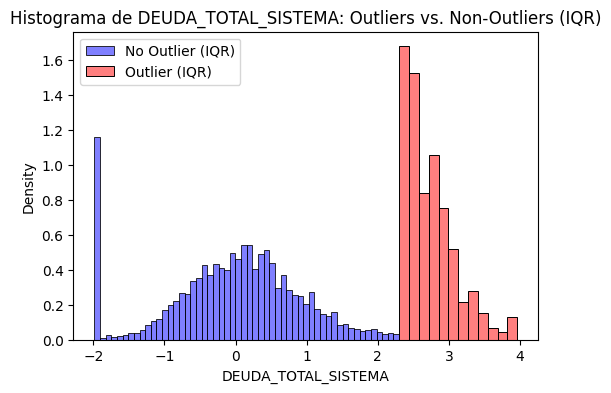

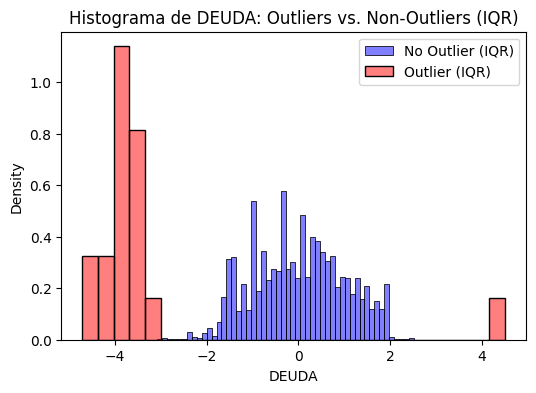

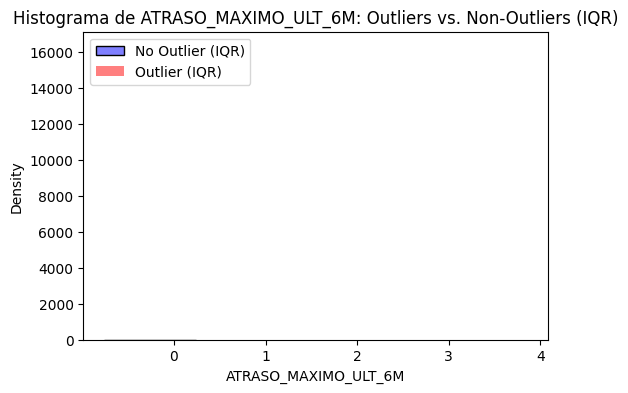

In [356]:
numerical_cols_transformed_with_iqr_outliers = filtered_outliers_transformed_iqr['Variable'].tolist()

for col in numerical_cols_transformed_with_iqr_outliers:
    iqr_flag_col = f'is_outlier_iqr_transformed_{col}'
    plt.figure(figsize=(6, 4))
    sns.histplot(X_train_imputed_aux_2_transformed[~X_train_imputed_aux_2_transformed[iqr_flag_col]][col],
                 label='No Outlier (IQR)', color='blue', alpha=0.5, stat='density', kde=False)
    sns.histplot(X_train_imputed_aux_2_transformed[X_train_imputed_aux_2_transformed[iqr_flag_col]][col],
                 label='Outlier (IQR)', color='red', alpha=0.5, stat='density', kde=False)
    plt.title(f'Histograma de {col}: Outliers vs. Non-Outliers (IQR)')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [357]:
import re
outlier_iqr_transformed_cols = [col for col in X_train_imputed_aux_2_transformed.columns if re.match(r'is_outlier_iqr_transformed_.*', col)]
X_train_imputed_aux_2_transformed['is_outlier_iqr_transformed_any'] = X_train_imputed_aux_2_transformed[outlier_iqr_transformed_cols].any(axis=1)

##### **Revisemos nuevamente el segundo método basado en IF**

In [358]:
numerical_cols_transformed_if = X_train_imputed_aux_2_transformed.select_dtypes(include=np.number).columns
df_numerical_for_if_transformed = X_train_imputed_aux_2_transformed[numerical_cols_transformed_if].copy()

iso_forest_transformed = IsolationForest(random_state=42, contamination='auto')
iso_forest_transformed.fit(df_numerical_for_if_transformed)
anomaly_labels_transformed = iso_forest_transformed.predict(df_numerical_for_if_transformed)

is_outlier_if_transformed = pd.Series(False, index=X_train_imputed_aux_2_transformed.index, name='is_outlier_if_transformed')
is_outlier_if_transformed.loc[df_numerical_for_if_transformed.index] = (anomaly_labels_transformed == -1)
X_train_imputed_aux_2_transformed['is_outlier_if_transformed'] = is_outlier_if_transformed
n_outliers_if_transformed = list(anomaly_labels_transformed).count(-1)
total_samples_if_transformed = len(df_numerical_for_if_transformed)
pct_outliers_if_transformed = (n_outliers_if_transformed / total_samples_if_transformed) * 100

print("--- Outlier usando Isolation Forest en datos transformados ---")
print(f"Total: {total_samples_if_transformed}")
print(f"Número de outliers: {n_outliers_if_transformed}")
print(f"Porcentaje de outliers: {pct_outliers_if_transformed:.2f}%")

--- Outlier usando Isolation Forest en datos transformados ---
Total: 22360
Número de outliers: 6757
Porcentaje de outliers: 30.22%


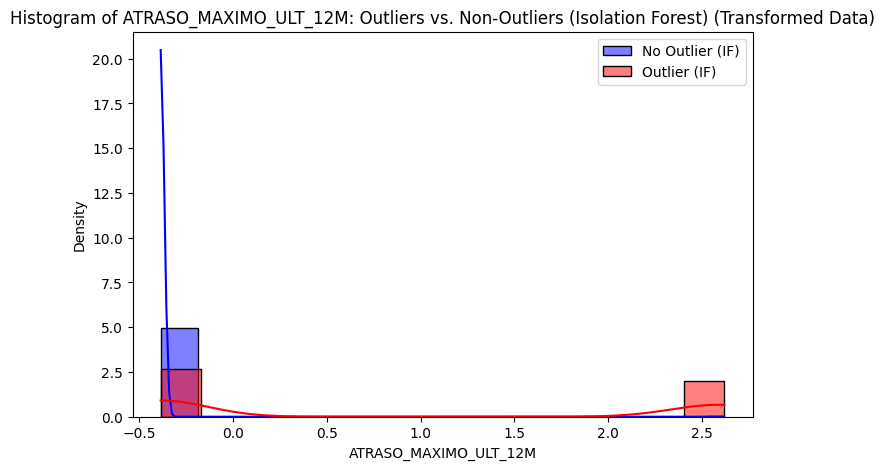

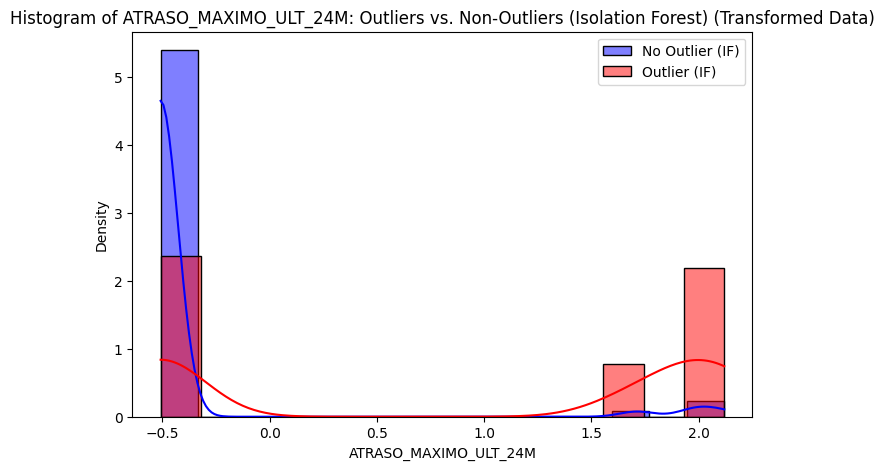

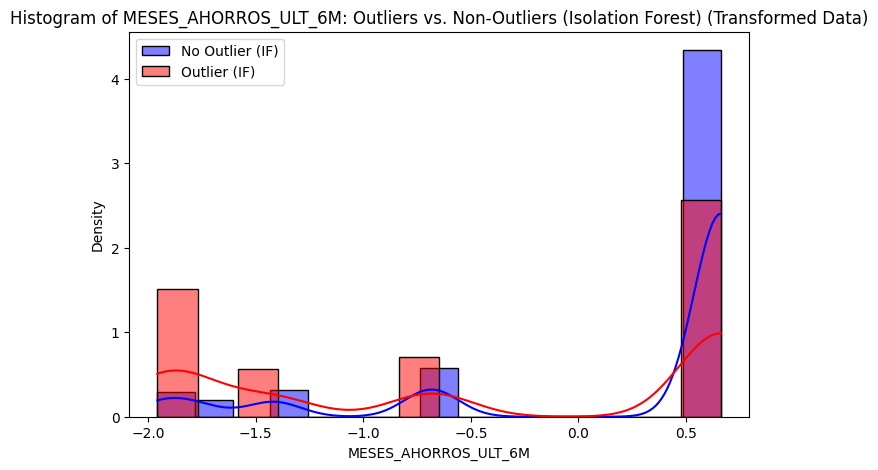

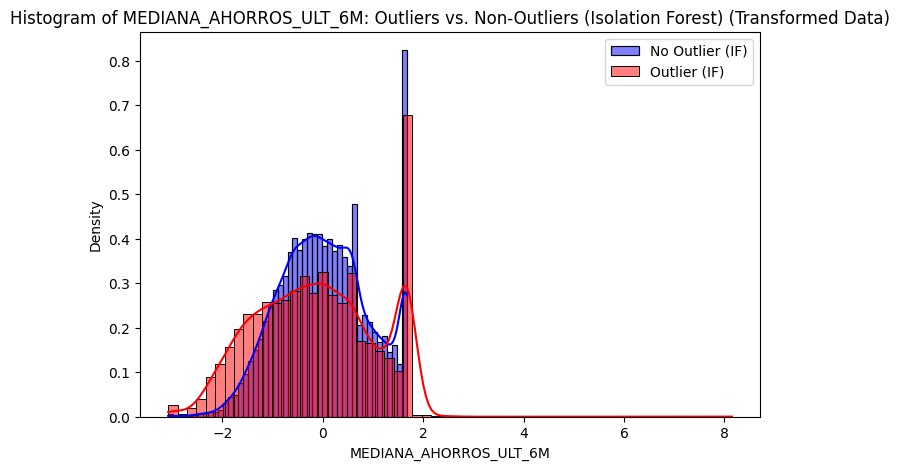

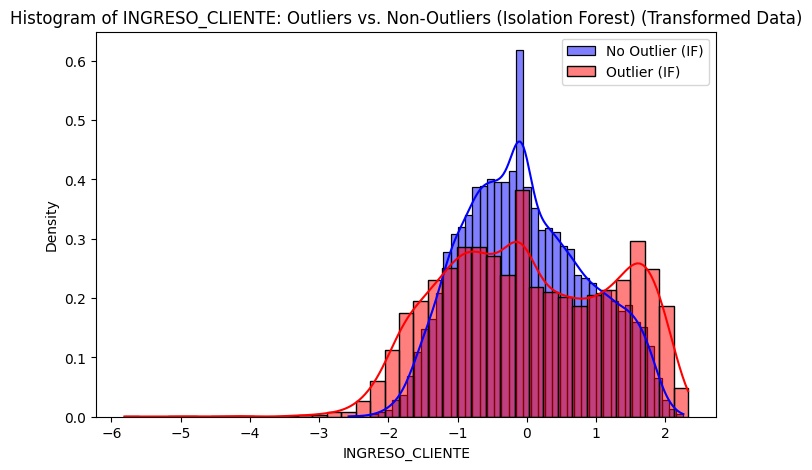

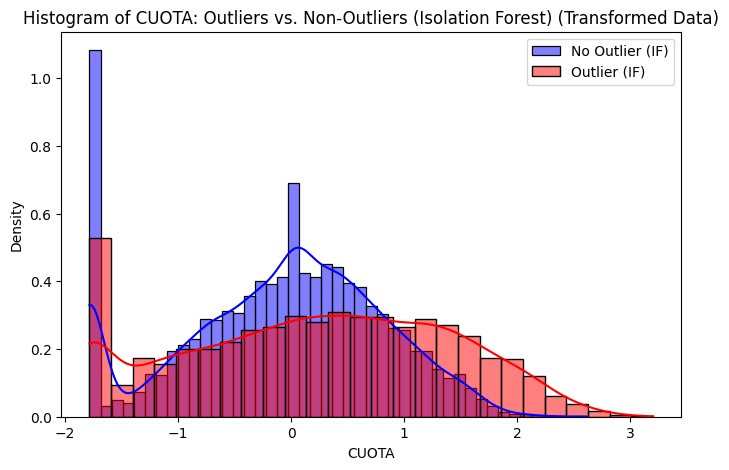

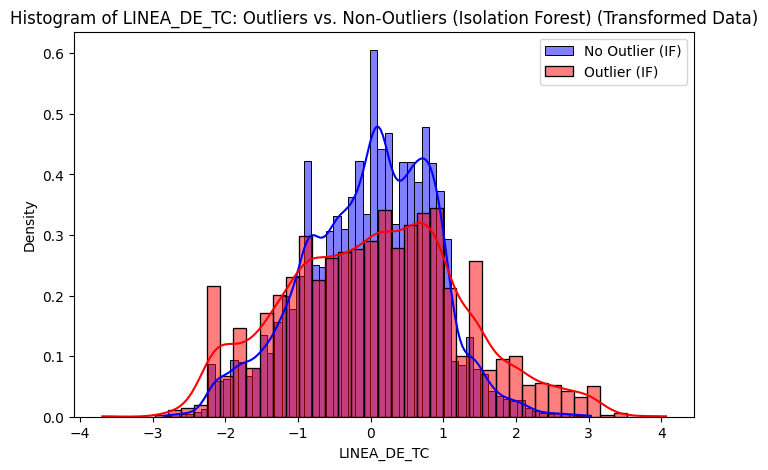

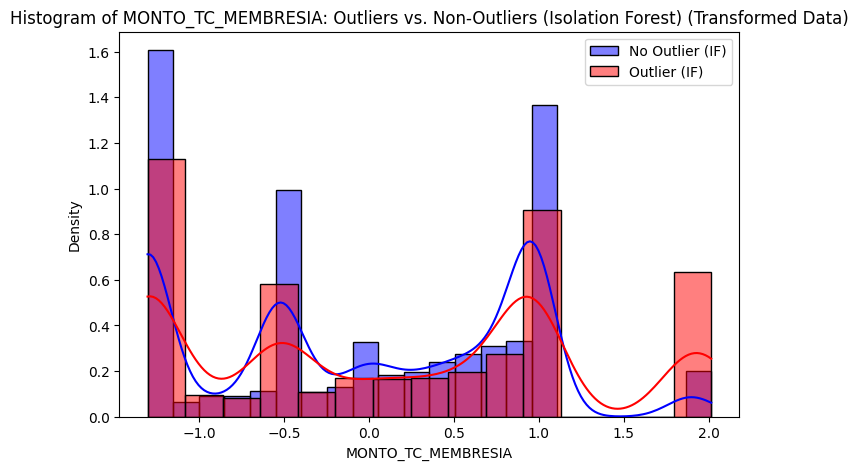

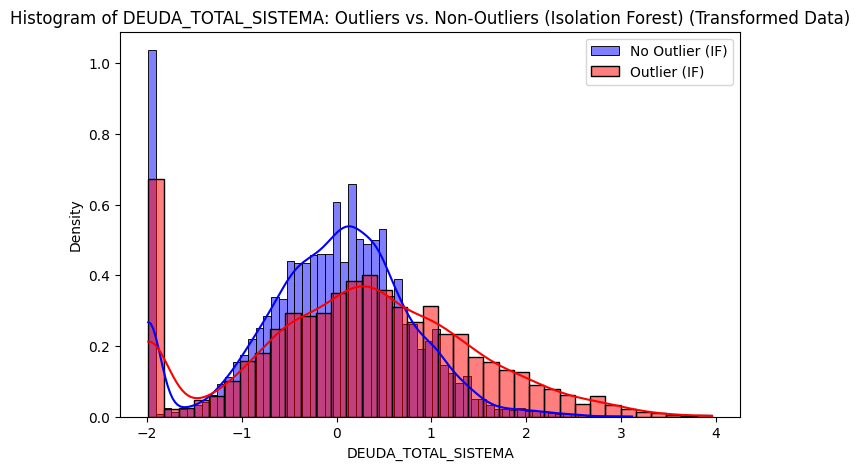

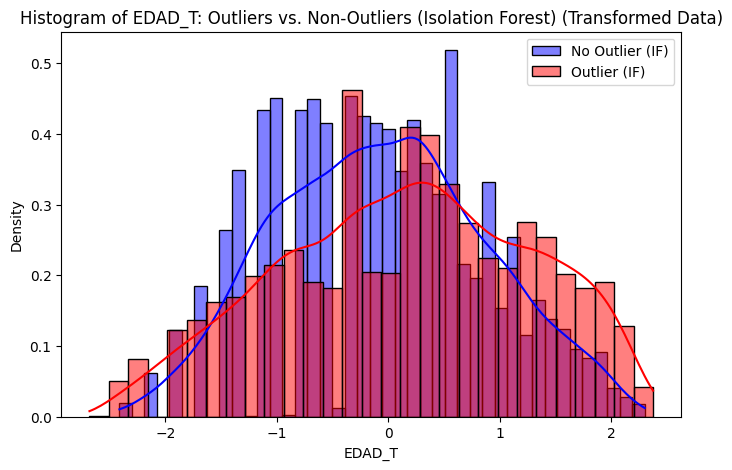

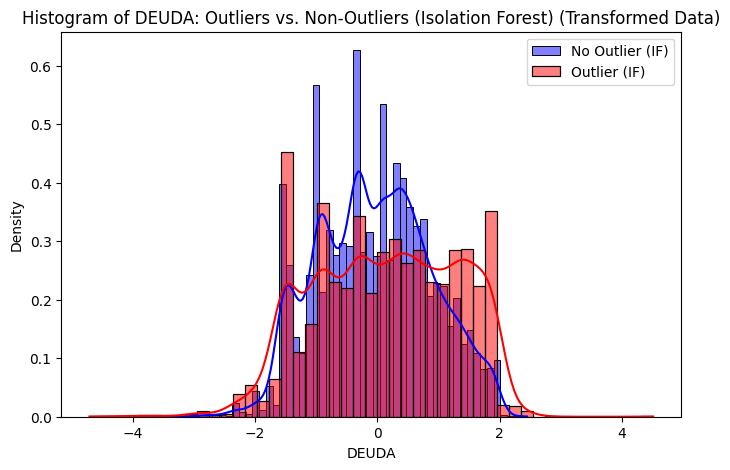

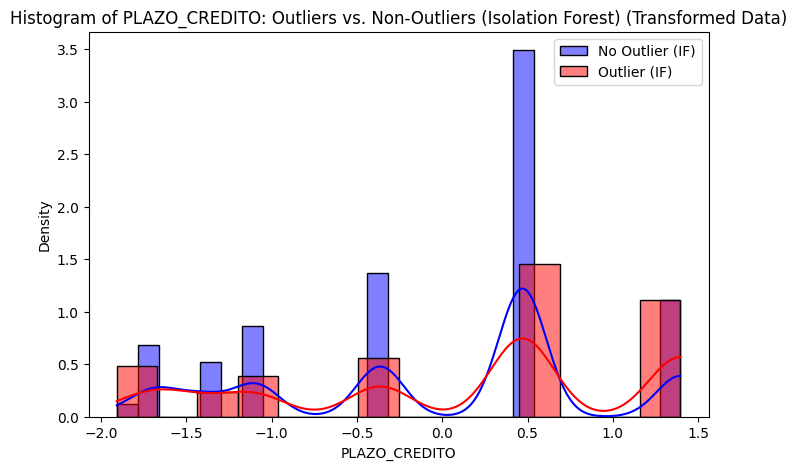

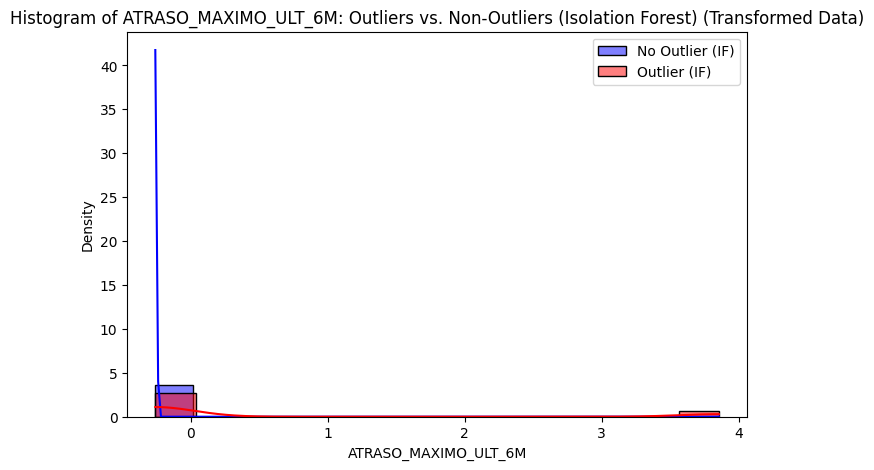

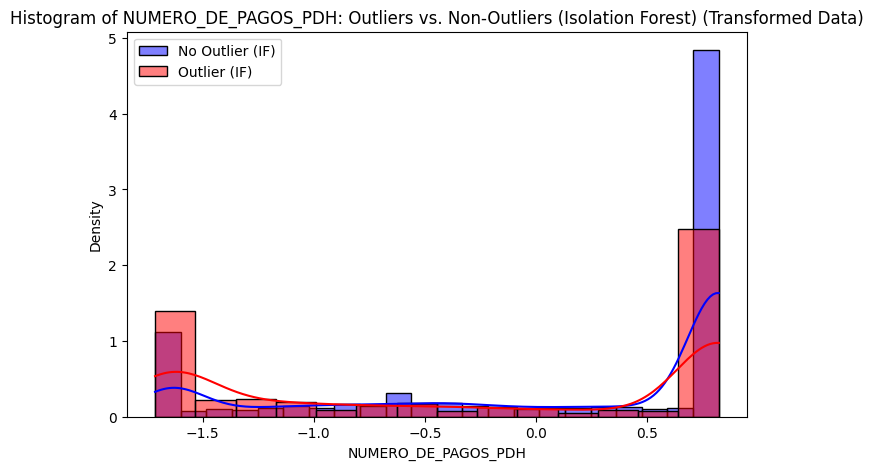

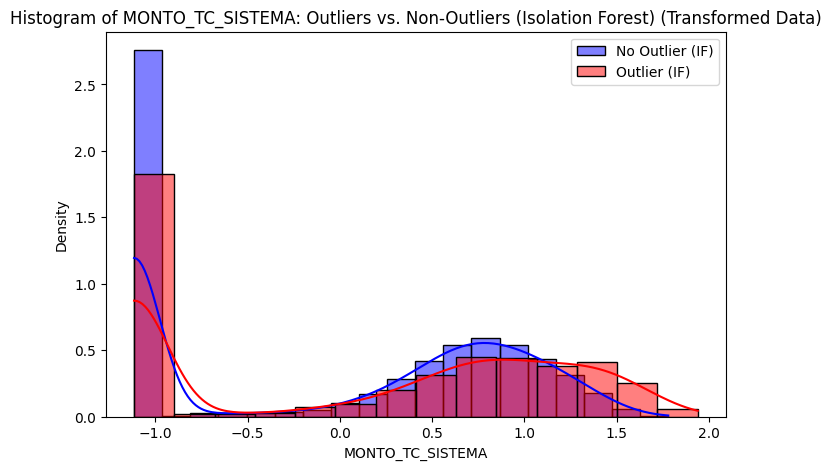

In [359]:
numerical_cols_transformed_with_if_outliers = [col for col in numerical_cols_transformed_if if not (col.startswith('is_outlier_iqr_'))]

for col in numerical_cols_transformed_with_if_outliers:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_numerical_for_if_transformed[X_train_imputed_aux_2_transformed['is_outlier_if_transformed'] == False][col],
                 label='No Outlier (IF)', color='blue', alpha=0.5, stat='density', kde=True)
    sns.histplot(df_numerical_for_if_transformed[X_train_imputed_aux_2_transformed['is_outlier_if_transformed'] == True][col],
                 label='Outlier (IF)', color='red', alpha=0.5, stat='density', kde=True)
    plt.title(f'Histogram of {col}: Outliers vs. Non-Outliers (Isolation Forest) (Transformed Data)')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

##### **Comparemos nuevamente ambos métodos (IQR vs IF)**

In [360]:
overall_outlier_flags = ['is_outlier_iqr_transformed_any','is_outlier_if_transformed']

In [361]:
total_samples = len(X_train_imputed_aux_2_transformed)
for flag_col in overall_outlier_flags:
    n_outliers = X_train_imputed_aux_2_transformed[flag_col].sum()
    pct_outliers = (n_outliers / total_samples) * 100
    print(f"{flag_col.replace('is_outlier_', '').replace('_any', '').upper():<25}: {n_outliers:>6} outliers ({pct_outliers:>6.2f}%)")

IQR_TRANSFORMED          :   5069 outliers ( 22.67%)
IF_TRANSFORMED           :   6757 outliers ( 30.22%)


In [362]:
for i in range(len(overall_outlier_flags)):
    for j in range(i + 1, len(overall_outlier_flags)):
        col1 = overall_outlier_flags[i]
        col2 = overall_outlier_flags[j]
        contingency_table = pd.crosstab(X_train_imputed_aux_2_transformed[col1], X_train_imputed_aux_2_transformed[col2])
        print(f"\nContingency Table: {col1.replace('is_outlier_', '').replace('_any', '').upper()} vs. {col2.replace('is_outlier_', '').replace('_any', '').upper()}\n")
        display(contingency_table)


Contingency Table: IQR_TRANSFORMED vs. IF_TRANSFORMED



is_outlier_if_transformed       False  True 
is_outlier_iqr_transformed_any              
False                           14671   2620
True                              932   4137

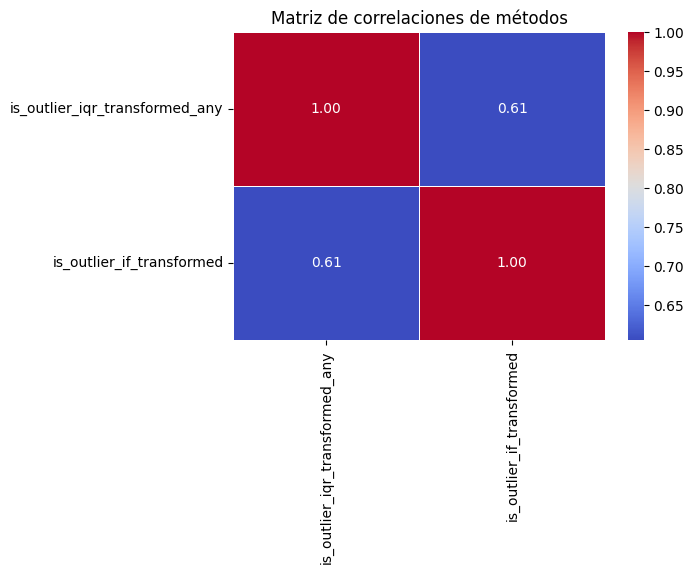

In [363]:
outlier_flags_df = X_train_imputed_aux_2_transformed[overall_outlier_flags].astype(int)
correlation_matrix_outliers = outlier_flags_df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_outliers, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de correlaciones de métodos')
plt.show()

###### **Con todo lo anterior, salvo las variables de atraso, con la transformación logramos refinar la determinación de outliers, con lo cual, el siguiente paso será capear las variables que presentaban estos casos, y luego regresarlos a su escala original**

##### **Cerremos entonces este sección dejando estas instrucciones en un pipeline, que luego iremos alimentando con los siguientes pasos del entrenamiento**

In [364]:
class PowerWinsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, capping_method='both', lower_percentile=0.01, upper_percentile=0.99):
        self.capping_method = capping_method
        self.lower_percentile = lower_percentile
        self.upper_percentile = upper_percentile
        self.pt = PowerTransformer(method='yeo-johnson', standardize=True)
        self.columns_ = None
        self.capping_values_ = {}
        self.original_dtypes_ = None

    def fit(self, X, y=None):
        if isinstance(X, pd.Series):
            X = pd.DataFrame(X)
        elif not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=[f'col_{i}' for i in range(X.shape[1])])
        self.columns_ = X.columns.tolist()
        self.original_dtypes_ = X.dtypes
        self.pt.fit(X)
        X_transformed = self.pt.transform(X)

        for i, col in enumerate(self.columns_):
            lower_cap = np.percentile(X_transformed[:, i], self.lower_percentile * 100)
            upper_cap = np.percentile(X_transformed[:, i], self.upper_percentile * 100)
            self.capping_values_[col] = {'lower_cap': lower_cap, 'upper_cap': upper_cap}

        return self

    def transform(self, X):
        if isinstance(X, pd.Series):
            X = pd.DataFrame(X, columns=self.columns_)
        elif not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.columns_)
        original_index = X.index
        X_transformed = self.pt.transform(X)
        X_capped_transformed = X_transformed.copy()
        for i, col in enumerate(self.columns_):
            lower_cap = self.capping_values_[col]['lower_cap']
            upper_cap = self.capping_values_[col]['upper_cap']
            if self.capping_method == 'right' or self.capping_method == 'both':
                X_capped_transformed[:, i][X_capped_transformed[:, i] > upper_cap] = upper_cap
            if self.capping_method == 'left' or self.capping_method == 'both':
                X_capped_transformed[:, i][X_capped_transformed[:, i] < lower_cap] = lower_cap

        X_final = self.pt.inverse_transform(X_capped_transformed)
        X_final_df = pd.DataFrame(X_final, columns=self.columns_, index=original_index)
        for col in X_final_df.columns:
            if col in self.original_dtypes_.index:
                X_final_df[col] = X_final_df[col].astype(self.original_dtypes_[col])

        return X_final_df

    def set_output(self, *, transform=None):
        return self

In [365]:
right_capping_cols = ['ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M', 'ATRASO_MAXIMO_ULT_6M', 'DEUDA_TOTAL_SISTEMA', 'CUOTA']
left_capping_cols = ['MEDIANA_AHORROS_ULT_6M','INGRESO_CLIENTE','DEUDA']
both_capping_cols = ['LINEA_DE_TC']
all_assigned_numerical_cols = set(right_capping_cols + left_capping_cols + both_capping_cols)
# numerical_cols_all = X_train_imputed.select_dtypes(include=np.number).columns.tolist()
# both_capping_cols= [col for col in numerical_cols_all if col not in right_capping_cols + left_capping_cols]
# missing_numerical_cols = [col for col in numerical_cols_all if col not in all_assigned_numerical_cols]

In [366]:
pipe_outlier_treatment = Pipeline([
    ('fe_outlier_treatment', ColumnTransformer(
        transformers=[
            ('right_capper_fe', PowerWinsorizer(capping_method='right', lower_percentile=0.01, upper_percentile=0.99), right_capping_cols),
            ('left_capper_fe', PowerWinsorizer(capping_method='left', lower_percentile=0.01, upper_percentile=0.99), left_capping_cols),
            ('both_capper_fe', PowerWinsorizer(capping_method='both', lower_percentile=0.01, upper_percentile=0.99), both_capping_cols)
            ],
        remainder='passthrough',
        verbose_feature_names_out=False
        ).set_output(transform='pandas'))
    ])

In [367]:
pipe_outlier_treatment.fit(X_train_imputed)
X_train_imp_ot = pipe_outlier_treatment.transform(X_train_imputed)
X_test_imp_ot = pipe_outlier_treatment.transform(X_test_imputed)

In [368]:
X_train_imputed[list(all_assigned_numerical_cols)].describe().T.style.format("{:.2f}")

In [369]:
X_train_imp_ot[list(all_assigned_numerical_cols)].describe().T.style.format("{:.2f}")

### **3.3 Tratamiento de Valores Raros o Poco frecuentes**
######En este punto, nos detenemos para revisar problemas de cardinalidad y si existen valores raros o poco frecuentes en nuestras variables categóricas

In [372]:
cat_cols=['FLG_GARANTIA','SEGMENTOCLIENTE','TARJETA_RELACIONADA','VEHICULAR_RELACIONADA','HIPOTECARIO_RELACIONADA','CLASIF_SISTEMA_ULT_12M',
          'FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','FLG_TC_VISA','FLG_TC_MC']

In [374]:
# Examinemos esto en la muestra de train
for col in cat_cols:
    print('variable: ', col, ' nro de categorias: ', X_train_imp_ot[col].nunique())

variable:  FLG_GARANTIA  nro de categorias:  2
variable:  SEGMENTOCLIENTE  nro de categorias:  7
variable:  TARJETA_RELACIONADA  nro de categorias:  2
variable:  VEHICULAR_RELACIONADA  nro de categorias:  2
variable:  HIPOTECARIO_RELACIONADA  nro de categorias:  2
variable:  CLASIF_SISTEMA_ULT_12M  nro de categorias:  5
variable:  FLG_PDH  nro de categorias:  2
variable:  PROFESION  nro de categorias:  170
variable:  ZONA_DEL_DESEMBOLSO  nro de categorias:  30
variable:  ESTADO_CIVIL  nro de categorias:  6
variable:  FLG_TC_VISA  nro de categorias:  2
variable:  FLG_TC_MC  nro de categorias:  2


In [375]:
#Examinemos esto en la muestra de test
for col in cat_cols:
    print('variable: ', col, ' nro de categorias: ', X_test_imp_ot[col].nunique())

variable:  FLG_GARANTIA  nro de categorias:  2
variable:  SEGMENTOCLIENTE  nro de categorias:  5
variable:  TARJETA_RELACIONADA  nro de categorias:  2
variable:  VEHICULAR_RELACIONADA  nro de categorias:  2
variable:  HIPOTECARIO_RELACIONADA  nro de categorias:  2
variable:  CLASIF_SISTEMA_ULT_12M  nro de categorias:  5
variable:  FLG_PDH  nro de categorias:  2
variable:  PROFESION  nro de categorias:  138
variable:  ZONA_DEL_DESEMBOLSO  nro de categorias:  30
variable:  ESTADO_CIVIL  nro de categorias:  6
variable:  FLG_TC_VISA  nro de categorias:  2
variable:  FLG_TC_MC  nro de categorias:  2


In [382]:
# Analicemos la variable Profesión
unique_to_train_set = [x for x in X_train_imp_ot.PROFESION.unique() if x not in X_test_imp_ot.PROFESION.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_imp_ot.PROFESION.unique() if x not in X_train_imp_ot.PROFESION.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

if unique_to_test_set:
    cases_in_test_not_in_train = X_test_imp_ot[X_test_imp_ot.PROFESION.isin(unique_to_test_set)]
    count_cases = len(cases_in_test_not_in_train)
    percentage_cases = (count_cases / (len(X_test_imp_ot)+len(X_train_imp_ot))) * 100

    print(f'\nCategorías de PROFESION que aparecen en el test pero no en el train: {unique_to_test_set}')
    print(f'Número de casos con estas categorías en el test: {count_cases}')
    print(f'Porcentaje de casos con estas categorías en el total del test: {percentage_cases:.2f}%')
else:
    print('\nNo hay categorías de PROFESION en el test que no estén en el train.')

El nro de categorias que aparecen en el train y no en el test es 37
El nro de categorias que aparecen en el test y no en el train es 5

Categorías de PROFESION que aparecen en el test pero no en el train: ['CAPATAZ', 'MUSICO', 'ARTESANO', 'OTROS MEDICINA', 'INTERPRETE']
Número de casos con estas categorías en el test: 6
Porcentaje de casos con estas categorías en el total del test: 0.02%


In [377]:
# Analicemos la variable ZONA_DEL_DESEMBOLSO
unique_to_train_set = [x for x in X_train_imp_ot.ZONA_DEL_DESEMBOLSO.unique() if x not in X_test_imp_ot.ZONA_DEL_DESEMBOLSO.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_imp_ot.ZONA_DEL_DESEMBOLSO.unique() if x not in X_train_imp_ot.ZONA_DEL_DESEMBOLSO.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [378]:
# Analicemos la variable SEGMENTOCLIENTE
unique_to_train_set = [x for x in X_train_imp_ot.SEGMENTOCLIENTE.unique() if x not in X_test_imp_ot.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_imp_ot.SEGMENTOCLIENTE.unique() if x not in X_train_imp_ot.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 2
El nro de categorias que aparecen en el test y no en el train es 0


In [398]:
from feature_engine.encoding import RareLabelEncoder
pipe_vr = Pipeline([("rare_encoder", RareLabelEncoder(tol=0.005,n_categories=5,variables=['PROFESION','SEGMENTOCLIENTE']))])

In [399]:
pipe_vr.fit(X_train_imp_ot)
X_train_imp_ot_vr = pipe_vr.transform(X_train_imp_ot)
X_test_imp_ot_vr = pipe_vr.transform(X_test_imp_ot)

In [400]:
# Analicemos la variable Profesión
unique_to_train_set = [x for x in X_train_imp_ot_vr.PROFESION.unique() if x not in X_test_imp_ot_vr.PROFESION.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_imp_ot_vr.PROFESION.unique() if x not in X_train_imp_ot_vr.PROFESION.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))


El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [402]:
X_train_imp_ot_vr.PROFESION.value_counts()

PROFESION
TECNICO                          7888
ADMINISTRADOR                    3955
Rare                             2589
INGENIERO                        2202
CONTADOR                         1151
OBRERO / OPERADOR                 583
ECONOMISTA                        393
ABOGADO                           376
MECANICO                          362
INGENIERO DE SISTEMAS             276
INGENIERO INDUSTRIAL              248
TEC MECANICO AUTOMOTRIZ           238
ENFERMERO                         229
TEC MECANICO INDUSTRIAL           229
TECNICO EN COMPUTACION            202
PROFESOR                          199
INGENIERO MECANICO                194
INGENIERO CIVIL                   192
NO DIO INFORMACION SOLICITADA     175
MEDICO                            161
TEC ELECTRICIDAD INDUST           140
VARIOS                            135
TECNICO EN ELECTRONICA            127
CONDUCTOR                         116
Name: count, dtype: int64

In [401]:
X_train_imp_ot_vr.SEGMENTOCLIENTE.value_counts()

SEGMENTOCLIENTE
CLIENTES ORO                15423
CLIENTES PLATINUM SEGM 2     6646
CLIENTES SIGNATURE            201
Rare                           90
Name: count, dtype: int64

### **3.4 Escalamiento**
###### En este punto, realizaremos el escalado de las variables numéricas

In [407]:
X_train_imp_ot_vr.describe().T.style.format("{:.2f}")

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler().set_output(transform="pandas")
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)
#scaler = RobustScaler().set_output(transform="pandas")
#scaler.fit(X_train_imp_ot_vr[num_cols])
#X_train_imp_ot_vr_scal = scaler.transform(X_train_imp_ot_vr[num_cols])
#X_test_imp_ot_vr_scal = scaler.transform(X_test_imp_ot_vr[num_cols])

In [409]:
num_cols=['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA']

In [410]:
from sklearn.preprocessing import RobustScaler
pipe_scaler = Pipeline([("scaler",
                         ColumnTransformer(transformers=[('e', RobustScaler(), num_cols)], remainder='passthrough', verbose_feature_names_out=False).set_output(transform="pandas")
                         )])

In [411]:
pipe_scaler.fit(X_train_imp_ot_vr)
X_train_imp_ot_vr_scal = pipe_scaler.transform(X_train_imp_ot_vr)
X_test_imp_ot_vr_scal = pipe_scaler.transform(X_test_imp_ot_vr)

In [412]:
X_train_imp_ot_vr_scal.describe().T.style.format("{:.2f}")

## **4. Feature Selection**

#### Planteemos algunos filtros básicos inicialmente

##### **Constantes**

In [413]:
constant_features_num = [feat for feat in X_train_imp_ot_vr_scal[num_cols].columns if X_train_imp_ot_vr_scal[feat].std() == 0]
len(constant_features_num)

0

In [414]:
constant_features_cat = [feat for feat in X_train_imp_ot_vr_scal[cat_cols].columns if X_train_imp_ot_vr_scal[feat].nunique() == 1]
len(constant_features_cat)

0

##### **Cuasi Constantes**

In [415]:
from sklearn.feature_selection import VarianceThreshold

In [419]:
sel = VarianceThreshold(threshold=0.01)
sel.fit(X_train_imp_ot_vr_scal[num_cols])

VarianceThreshold(threshold=0.01)

In [420]:
quasi_constant = X_train_imp_ot_vr_scal[num_cols].columns[~sel.get_support()]
len(quasi_constant)

0

In [421]:
quasi_constant_feat = []
for feature in X_train_imp_ot_vr_scal[cat_cols].columns:
    predominant = X_train_imp_ot_vr_scal[feature].value_counts(
        normalize=True).sort_values(ascending=False).values[0]
    if predominant > 0.99:
        quasi_constant_feat.append(feature)
len(quasi_constant_feat)

0

##### **Empecemos a filtrar en función de su grado de aporte predictivo: Podemos determinar cuanto aportan estas variables? para esto calculemos su IV**

###### Empecemos con las categóricas

In [422]:
tot_train_t=pd.concat([X_train_imp_ot_vr_scal[cat_cols], y_train], axis=1)
tot_train_t.head()

FLG_GARANTIA           SEGMENTOCLIENTE TARJETA_RELACIONADA  \
1517             0  CLIENTES PLATINUM SEGM 2                   1   
27337            1  CLIENTES PLATINUM SEGM 2                   0   
573              0              CLIENTES ORO                   0   
31740            0              CLIENTES ORO                   0   
25079            0  CLIENTES PLATINUM SEGM 2                   1   

      VEHICULAR_RELACIONADA HIPOTECARIO_RELACIONADA CLASIF_SISTEMA_ULT_12M  \
1517                      0                       0                    0.0   
27337                     0                       1                    0.0   
573                       0                       0                    0.0   
31740                     0                       0                    0.0   
25079                     0                       1                    1.0   

      FLG_PDH      PROFESION ZONA_DEL_DESEMBOLSO ESTADO_CIVIL FLG_TC_VISA  \
1517        1  ADMINISTRADOR              CALLAO          SOL         0.0   
27337       0       CONTADOR          SAN_MARTIN          SOL         1.0   
573         1           Rare          LIMA_NORTE          SEP         1.0   
31740       1        TECNICO            AREQUIPA          CAS         1.0   
25079       1      INGENIERO           LIMA_ESTE          CAS         0.0   

      FLG_TC_MC  FLG_DEFAULT_12M  
1517        0.0                0  
27337       1.0                0  
573         1.0                0  
31740       1.0                0  
25079       0.0                0

In [423]:
def calculate_woe_iv(dataset, feature_cat, target):
    lst = []
    feature=feature_cat
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return iv, dset

In [424]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('WOE')
    plt.title(str('WOE por ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

###### Generemos un reporte con los IVs

In [425]:
def getFeatureIV_Importance(df,features,target):
    featureIV_Importance=list()
    for v in features:
      iv, rep=calculate_woe_iv(df,v,target)
      featureIV_Importance.append(iv)
    display(pd.DataFrame({"Feature":features, "IV":featureIV_Importance}).sort_values("IV",ascending=False))

In [426]:
getFeatureIV_Importance(tot_train_t,cat_cols,"FLG_DEFAULT_12M")

Feature        IV
5    CLASIF_SISTEMA_ULT_12M  0.126878
6                   FLG_PDH  0.107184
7                 PROFESION  0.106223
1           SEGMENTOCLIENTE  0.069090
8       ZONA_DEL_DESEMBOLSO  0.064632
9              ESTADO_CIVIL  0.055085
0              FLG_GARANTIA  0.042176
4   HIPOTECARIO_RELACIONADA  0.021914
2       TARJETA_RELACIONADA  0.008789
10              FLG_TC_VISA  0.008784
11                FLG_TC_MC  0.007300
3     VEHICULAR_RELACIONADA  0.000706

###### En este punto, quedémonos solo con las variables cuyo IV es mayor al 2% y menor a 50%

In [ ]:
cat_cols_2=['CLASIF_SISTEMA_ULT_12M','FLG_PDH','PROFESION','SEGMENTOCLIENTE','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','FLG_GARANTIA','HIPOTECARIO_RELACIONADA']

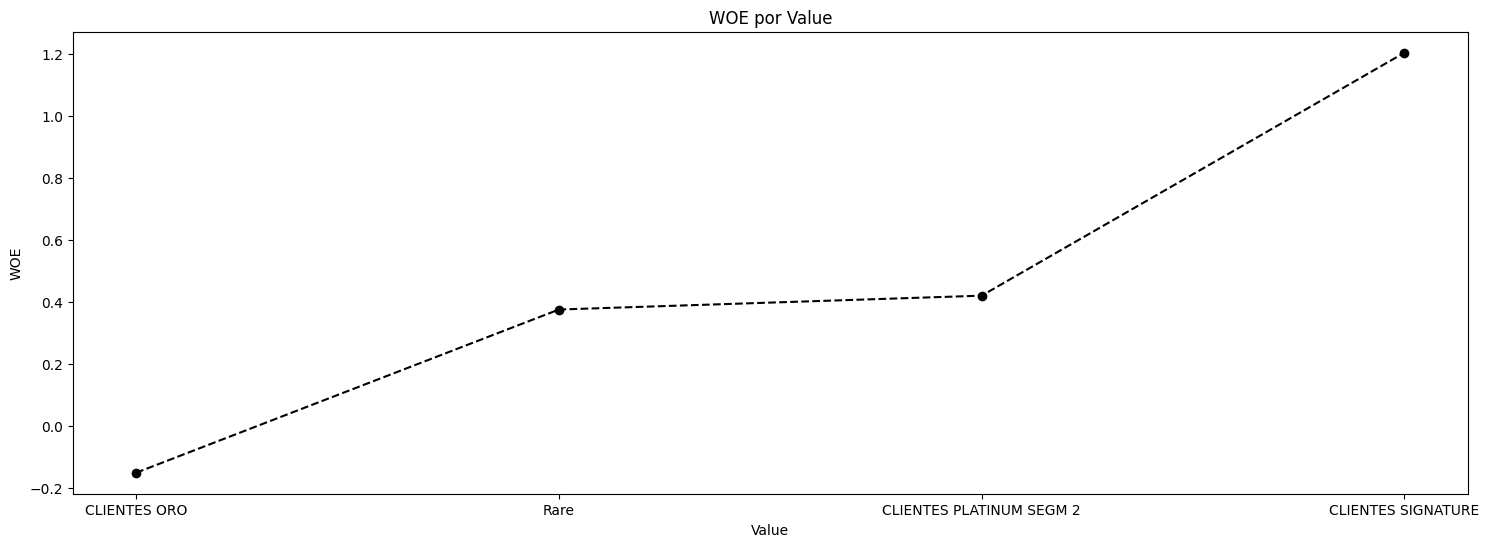

In [427]:
IV_v1, ReporteWoe_v1=calculate_woe_iv(tot_train_t, 'SEGMENTOCLIENTE', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v1)

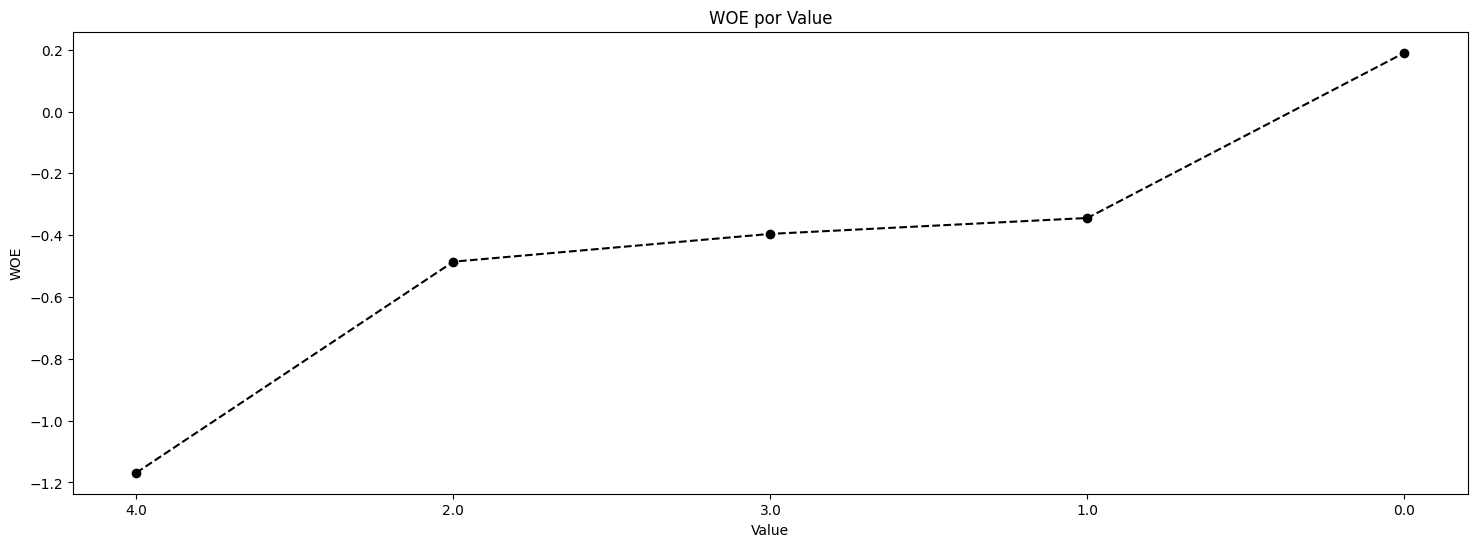

In [428]:
IV_v2, ReporteWoe_v2=calculate_woe_iv(tot_train_t, 'CLASIF_SISTEMA_ULT_12M', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v2)

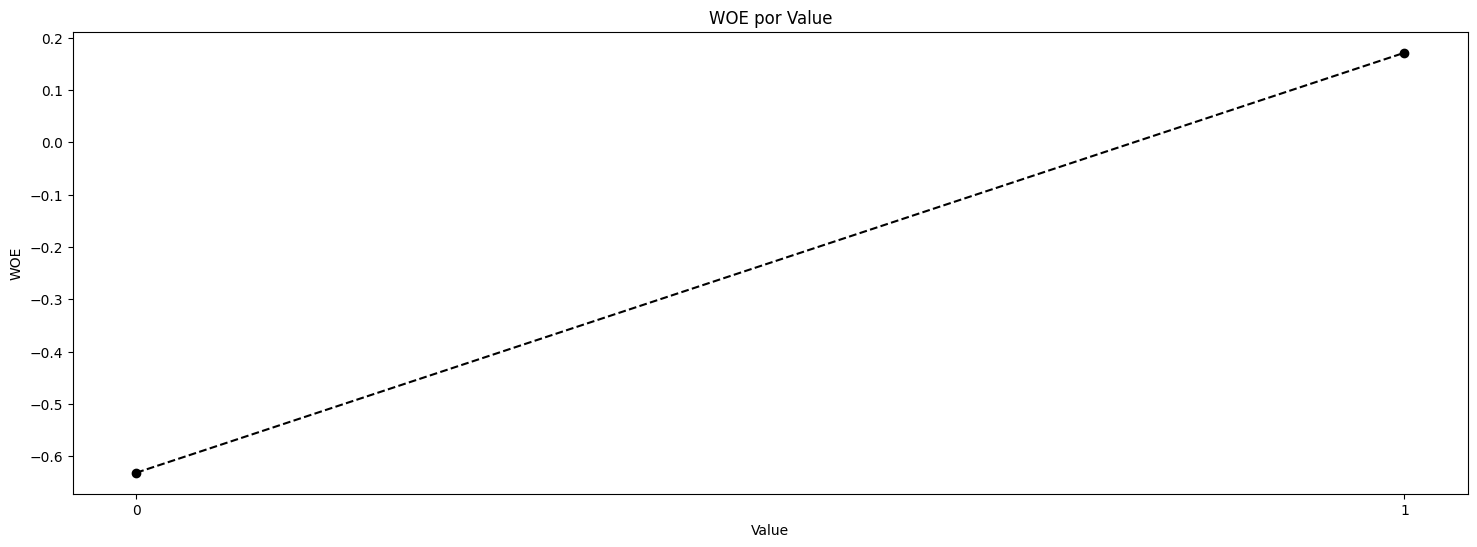

In [429]:
IV_v3, ReporteWoe_v3=calculate_woe_iv(tot_train_t, 'FLG_PDH', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v3)

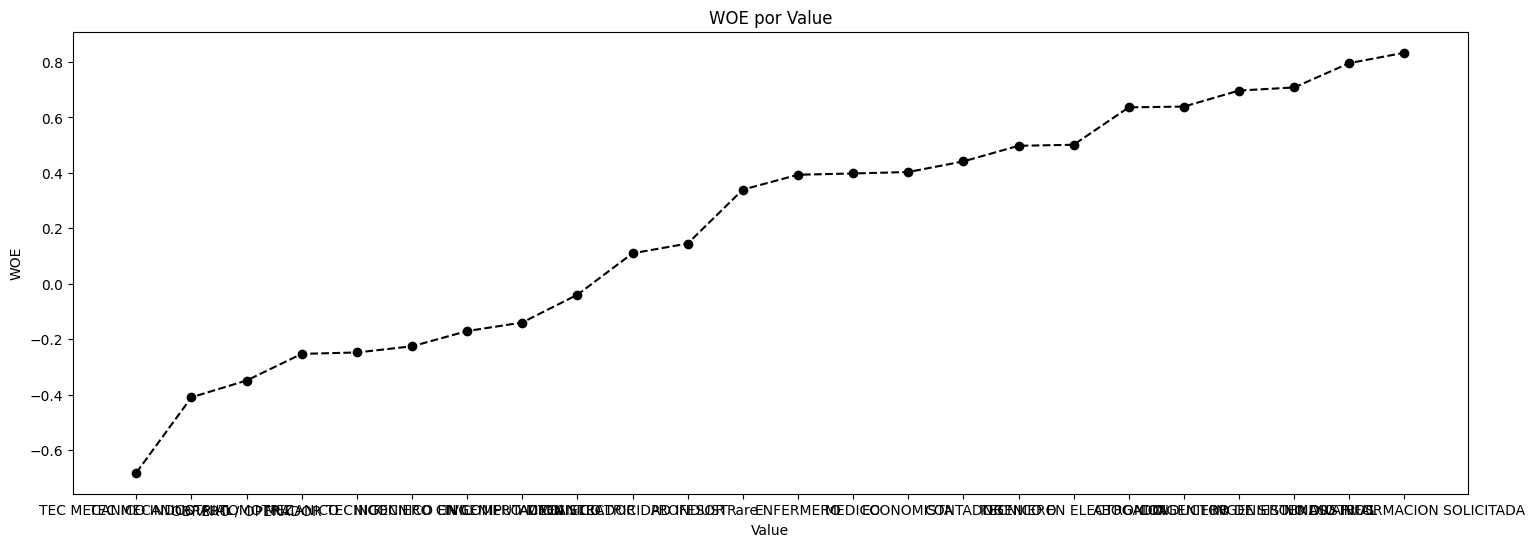

In [430]:
IV_v4, ReporteWoe_v4=calculate_woe_iv(tot_train_t, 'PROFESION', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v4)

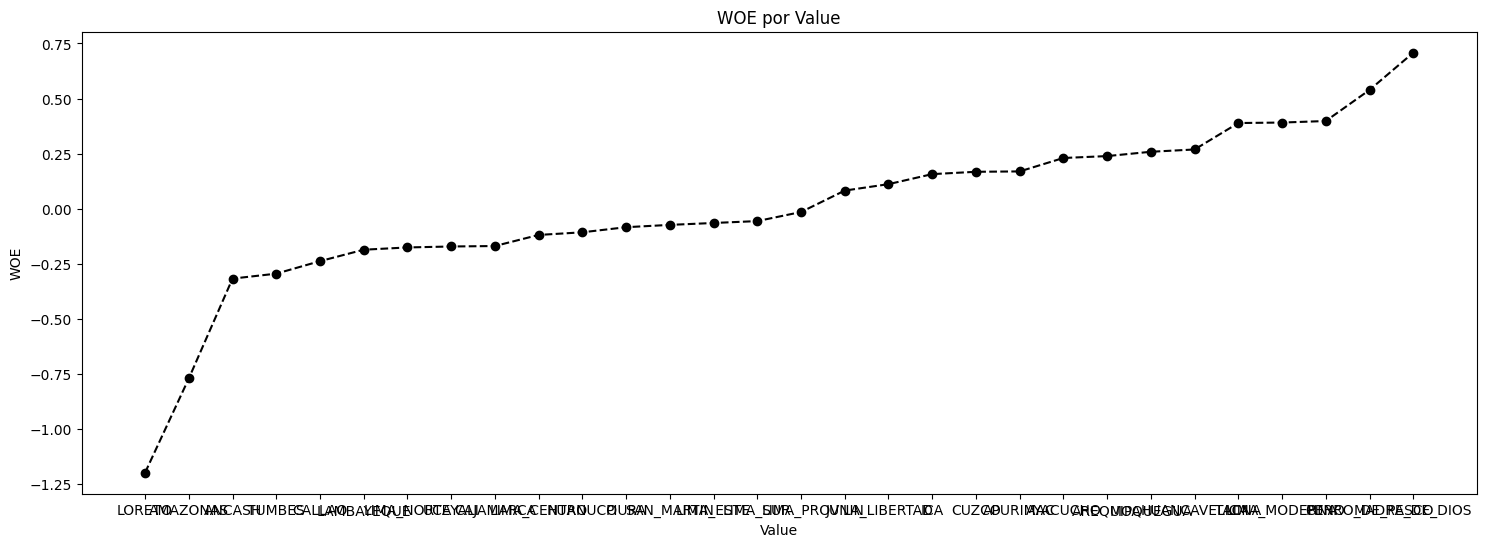

In [431]:
IV_v5, ReporteWoe_v5=calculate_woe_iv(tot_train_t, 'ZONA_DEL_DESEMBOLSO', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v5)

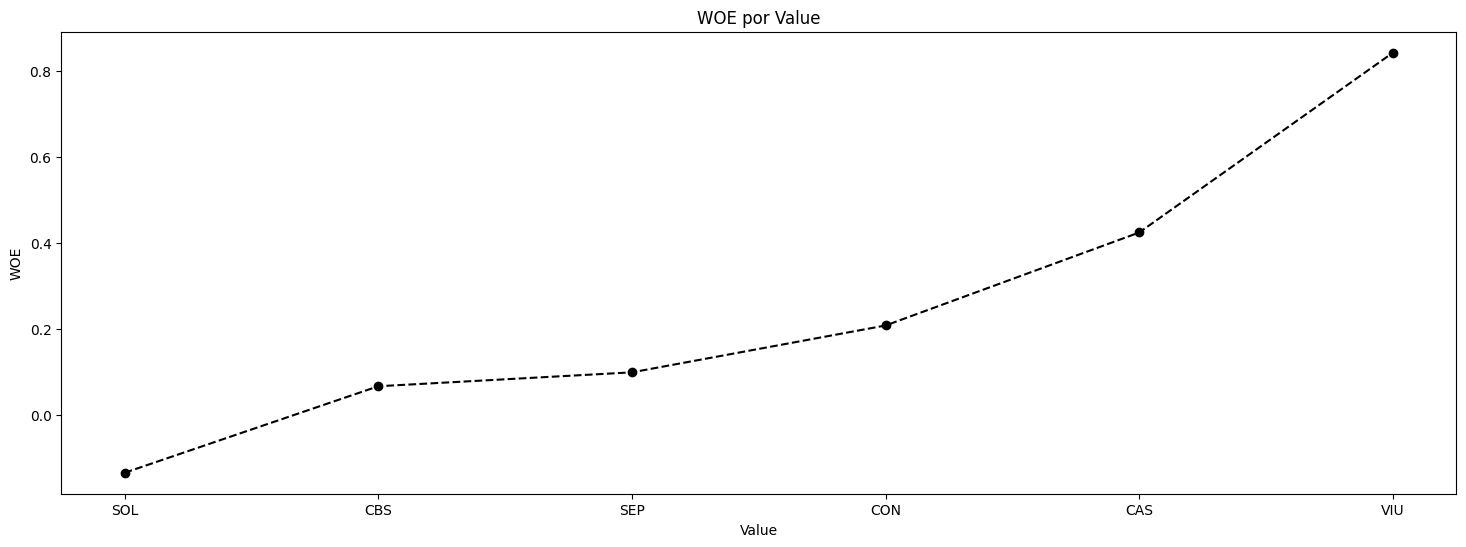

In [432]:
IV_v6, ReporteWoe_v6=calculate_woe_iv(tot_train_t, 'ESTADO_CIVIL', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v6)

###### Continuemos con las variables numéricas

In [433]:
from feature_engine.discretisation import EqualFrequencyDiscretiser
disc1 = EqualFrequencyDiscretiser(q=10, variables=num_cols, return_boundaries=True)

In [434]:
disc1.fit(X_train_imp_ot_vr_scal[num_cols])
X_train_imp_ot_vr_scal_numdisc=disc1.transform(X_train_imp_ot_vr_scal[num_cols])
X_test_imp_ot_vr_scal_numdisc=disc1.transform(X_test_imp_ot_vr_scal[num_cols])

In [435]:
X_train_imp_ot_vr_scal_numdisc.head()

DEUDA PLAZO_CREDITO ATRASO_MAXIMO_ULT_6M  \
1517       (1.705, inf]    (0.0, inf]          (-inf, inf]   
27337     (-0.172, 0.0]   (-0.5, 0.0]          (-inf, inf]   
573        (0.0, 0.212]   (-0.5, 0.0]          (-inf, inf]   
31740  (-0.473, -0.387]   (-0.5, 0.0]          (-inf, inf]   
25079  (-0.286, -0.172]  (-1.5, -1.0]          (-inf, inf]   

      ATRASO_MAXIMO_ULT_12M ATRASO_MAXIMO_ULT_24M MESES_AHORROS_ULT_6M  \
1517            (-inf, 1.0]           (-inf, 1.0]          (-1.0, inf]   
27337           (-inf, 1.0]           (-inf, 1.0]          (-1.0, inf]   
573             (-inf, 1.0]           (-inf, 1.0]          (-1.0, inf]   
31740           (-inf, 1.0]           (-inf, 1.0]          (-1.0, inf]   
25079           (-inf, 1.0]           (-inf, 1.0]          (-1.0, inf]   

      MEDIANA_AHORROS_ULT_6M DEUDA_TOTAL_SISTEMA NUMERO_DE_PAGOS_PDH  \
1517          (0.996, 2.205]      (-inf, -0.389]       (-0.471, inf]   
27337         (0.218, 0.524]        (2.334, inf]      (-inf, -1.353]   
573             (0.0, 0.218]      (0.479, 1.021]       (-0.471, inf]   
31740         (0.218, 0.524]      (0.479, 1.021]       (-0.471, inf]   
25079          (-0.162, 0.0]        (2.334, inf]       (-0.471, inf]   

      MONTO_TC_SISTEMA INGRESO_CLIENTE            EDAD_T             CUOTA  \
1517       (-inf, 0.0]    (2.201, inf]     (-0.154, 0.0]  (-0.296, -0.232]   
27337     (0.0, 0.216]  (0.481, 1.033]  (-0.692, -0.538]     (1.05, 2.291]   
573        (-inf, 0.0]    (0.0, 0.173]    (0.385, 0.692]     (0.497, 1.05]   
31740      (-inf, 0.0]  (0.173, 0.481]    (0.692, 1.231]     (0.497, 1.05]   
25079      (3.63, inf]    (2.201, inf]    (0.692, 1.231]      (2.291, inf]   

            LINEA_DE_TC MONTO_TC_MEMBRESIA  
1517      (0.179, 0.43]     (0.543, 0.667]  
27337     (0.43, 0.722]       (-0.19, 0.0]  
573    (-0.337, -0.169]      (-inf, -0.19]  
31740    (0.722, 1.113]      (-inf, -0.19]  
25079     (0.179, 0.43]       (0.667, inf]

In [436]:
tot_train_t2=pd.concat([X_train_imp_ot_vr_scal_numdisc, y_train], axis=1)
tot_train_t2.head()

DEUDA PLAZO_CREDITO ATRASO_MAXIMO_ULT_6M  \
1517       (1.705, inf]    (0.0, inf]          (-inf, inf]   
27337     (-0.172, 0.0]   (-0.5, 0.0]          (-inf, inf]   
573        (0.0, 0.212]   (-0.5, 0.0]          (-inf, inf]   
31740  (-0.473, -0.387]   (-0.5, 0.0]          (-inf, inf]   
25079  (-0.286, -0.172]  (-1.5, -1.0]          (-inf, inf]   

      ATRASO_MAXIMO_ULT_12M ATRASO_MAXIMO_ULT_24M MESES_AHORROS_ULT_6M  \
1517            (-inf, 1.0]           (-inf, 1.0]          (-1.0, inf]   
27337           (-inf, 1.0]           (-inf, 1.0]          (-1.0, inf]   
573             (-inf, 1.0]           (-inf, 1.0]          (-1.0, inf]   
31740           (-inf, 1.0]           (-inf, 1.0]          (-1.0, inf]   
25079           (-inf, 1.0]           (-inf, 1.0]          (-1.0, inf]   

      MEDIANA_AHORROS_ULT_6M DEUDA_TOTAL_SISTEMA NUMERO_DE_PAGOS_PDH  \
1517          (0.996, 2.205]      (-inf, -0.389]       (-0.471, inf]   
27337         (0.218, 0.524]        (2.334, inf]      (-inf, -1.353]   
573             (0.0, 0.218]      (0.479, 1.021]       (-0.471, inf]   
31740         (0.218, 0.524]      (0.479, 1.021]       (-0.471, inf]   
25079          (-0.162, 0.0]        (2.334, inf]       (-0.471, inf]   

      MONTO_TC_SISTEMA INGRESO_CLIENTE            EDAD_T             CUOTA  \
1517       (-inf, 0.0]    (2.201, inf]     (-0.154, 0.0]  (-0.296, -0.232]   
27337     (0.0, 0.216]  (0.481, 1.033]  (-0.692, -0.538]     (1.05, 2.291]   
573        (-inf, 0.0]    (0.0, 0.173]    (0.385, 0.692]     (0.497, 1.05]   
31740      (-inf, 0.0]  (0.173, 0.481]    (0.692, 1.231]     (0.497, 1.05]   
25079      (3.63, inf]    (2.201, inf]    (0.692, 1.231]      (2.291, inf]   

            LINEA_DE_TC MONTO_TC_MEMBRESIA  FLG_DEFAULT_12M  
1517      (0.179, 0.43]     (0.543, 0.667]                0  
27337     (0.43, 0.722]       (-0.19, 0.0]                0  
573    (-0.337, -0.169]      (-inf, -0.19]                0  
31740    (0.722, 1.113]      (-inf, -0.19]                0  
25079     (0.179, 0.43]       (0.667, inf]                0

In [437]:
getFeatureIV_Importance(tot_train_t2,num_cols,"FLG_DEFAULT_12M")

Feature        IV
6   MEDIANA_AHORROS_ULT_6M  0.358326
10         INGRESO_CLIENTE  0.337741
8      NUMERO_DE_PAGOS_PDH  0.183294
1            PLAZO_CREDITO  0.173877
5     MESES_AHORROS_ULT_6M  0.170816
13             LINEA_DE_TC  0.082388
11                  EDAD_T  0.080354
14      MONTO_TC_MEMBRESIA  0.052187
7      DEUDA_TOTAL_SISTEMA  0.048812
0                    DEUDA  0.046217
4    ATRASO_MAXIMO_ULT_24M  0.034082
3    ATRASO_MAXIMO_ULT_12M  0.029170
12                   CUOTA  0.023794
9         MONTO_TC_SISTEMA  0.015132
2     ATRASO_MAXIMO_ULT_6M  0.000000

In [438]:
num_cols_2=['MEDIANA_AHORROS_ULT_6M','INGRESO_CLIENTE','NUMERO_DE_PAGOS_PDH','PLAZO_CREDITO','MESES_AHORROS_ULT_6M','LINEA_DE_TC','EDAD_T',
            'MONTO_TC_MEMBRESIA','DEUDA_TOTAL_SISTEMA','DEUDA','ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','CUOTA']

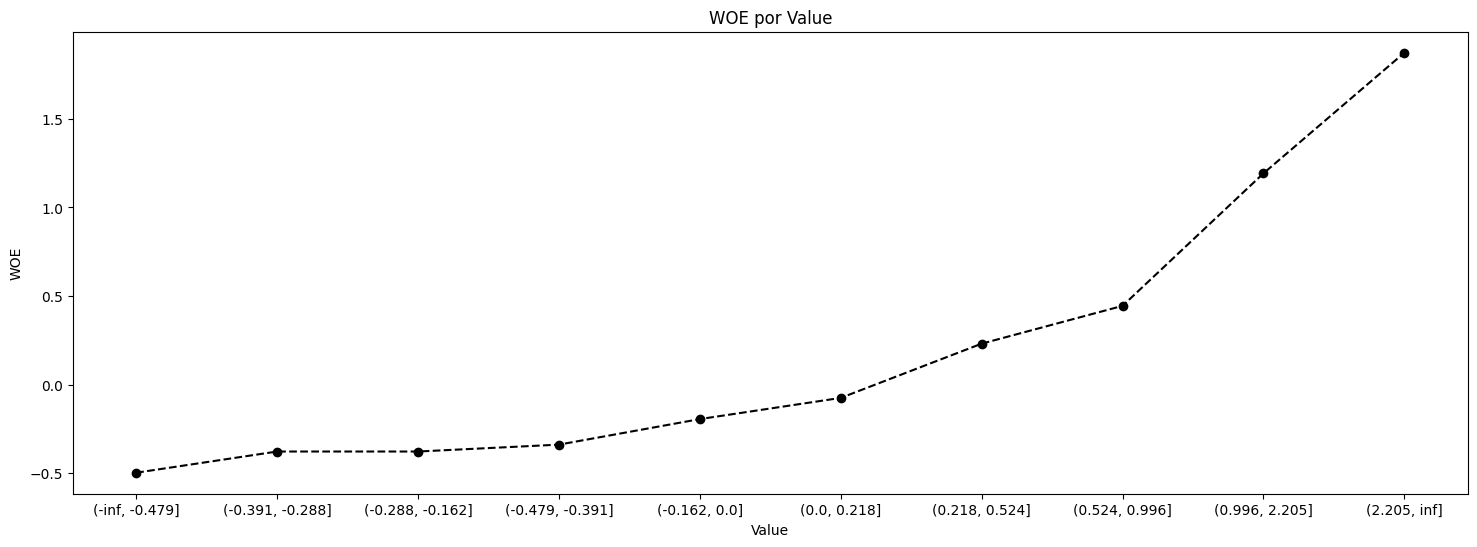

In [445]:
IV_v1, ReporteWoe_v1=calculate_woe_iv(tot_train_t2, 'MEDIANA_AHORROS_ULT_6M', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v1)

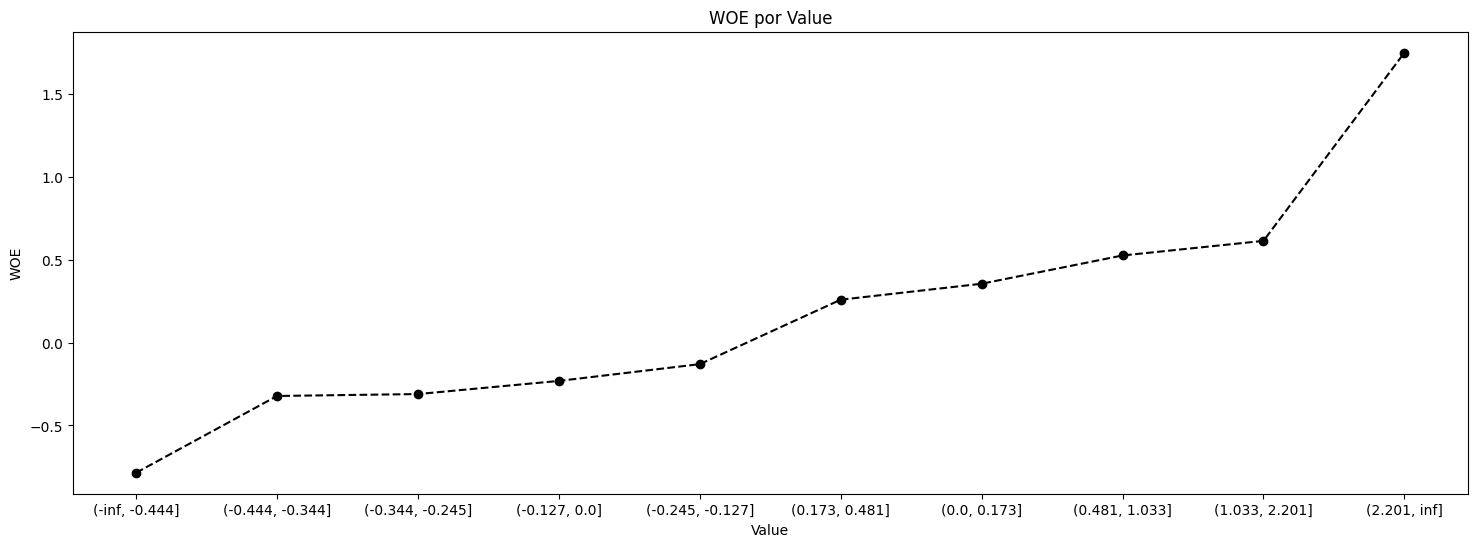

In [440]:
IV_v2, ReporteWoe_v2=calculate_woe_iv(tot_train_t2, 'INGRESO_CLIENTE', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v2)

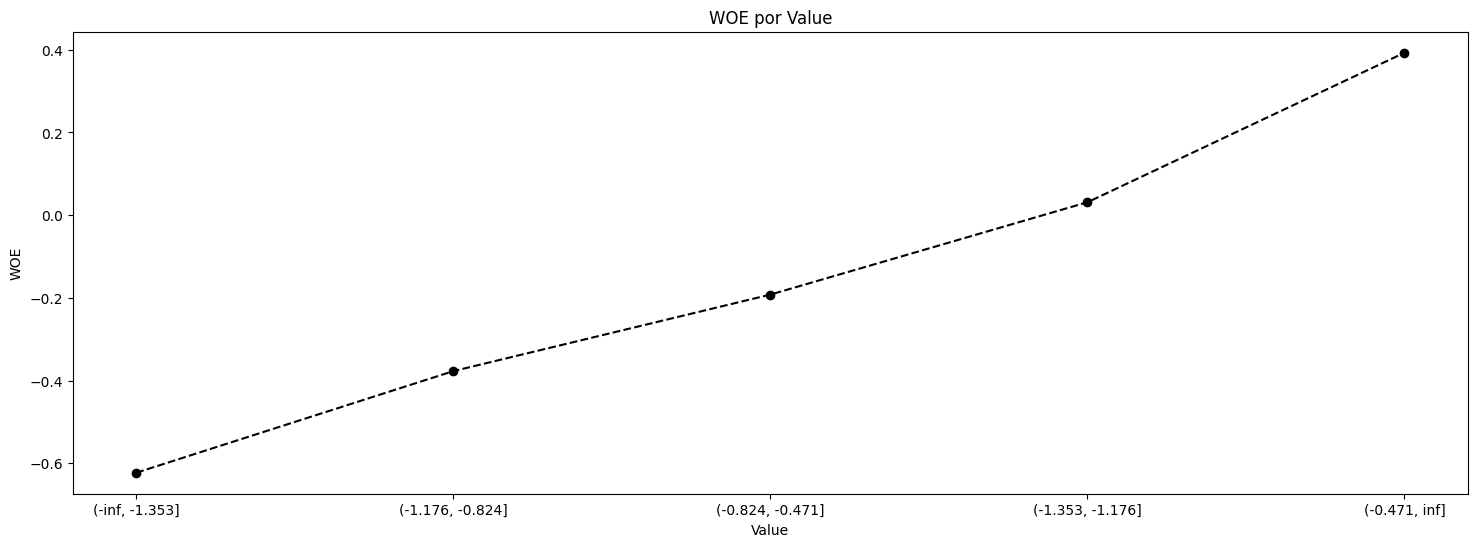

In [442]:
IV_v3, ReporteWoe_v3=calculate_woe_iv(tot_train_t2, 'NUMERO_DE_PAGOS_PDH', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v3)

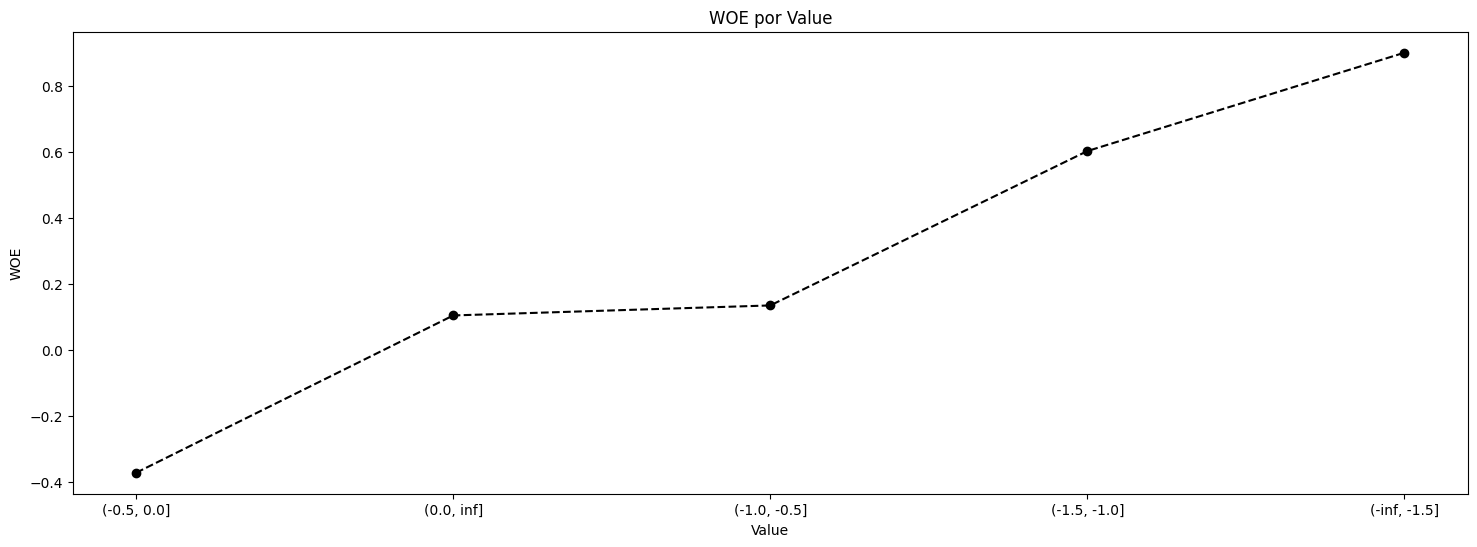

In [443]:
IV_v4, ReporteWoe_v4=calculate_woe_iv(tot_train_t2, 'PLAZO_CREDITO', 'FLG_DEFAULT_12M')
plot_by_woe(ReporteWoe_v4)